# DS 7331 Data Mining

### Lab 3
* Tahir Ahmad<br>
* Christopher Ballenger<br>
* Grant Bourzikas<br>
* Vitaly Briker<br>

### Grading Rubric<a id=Top></a>
* **[Business Understanding](#Business_Understanding)**
    * **[10 points]** Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). How will you measure the effectiveness of a good algorithm? Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?   
* **[Data Understanding 1](#Data_Understanding_1)**
    * **[10 points]** Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. Verify data quality: Are there missing values? Duplicate data? Outliers? Are those mistakes? How do you deal with these problems?
* **[Data Understanding 2](#Data_Understanding_2)**
    * **[10 points]** Visualize any important attributes appropriately. Important: Provide an interpretation for any charts or graphs.
* **[Modeling and Evaluation 1](#ME_1)**
    * **[10 points]** Train and adjust parameters. K-modes. 
* **[Modeling and Evaluation 2](#ME_2)**
    * **[10 points]** Evaluate and Compare using Silhoutte score
* **[Modeling and Evaluation 3](#ME_3)**
    * **[10 points]** Visualize Results. Visualize important features
* **[Modeling and Evaluation 4](#ME_4)**
    * **[20 points]** Summarize the Ramification    
* **[Deployment](#Deployment)**
    *  **[10 points]** Be critical of your performance and tell the reader how you current model might be usable by other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling? How useful is your model for interested parties (i.e., the companies or organizations that might want to use it)? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?
* **[Exceptional Work](#Exceptional_Work)**
    * **[10 points]** You have free reign to provide additional analyses or combine analyses.

### Business Understanding <a id="Business_Understanding"></a>

If we look back at the last 15-20 years, Cybersecurity has become a very important topic across every person in the world regardless of their age and every business.  This point is illustrated by two growth factor- Market Capital and Jobs. The capital market has more than doubled in spend in the US since 2010 and it will triple from 2019 until 2022 reaching to a total market capital of 180 billion.  Additionally, because of the growth, there is a need for cybersecurity professionals.  The job market is exraordinary hot because the number of jobs has doubled since 2010 and there will be a total of 6 million jobs in 2019 with a 2 million gap in open positions, or what the industry calls the talent shortage. This appears to reflect a healthy growth market and the cybersecurity industry is booming.

| Spend in Cybersecurity | Demand for Security Professionals | Breaches Over Years
| --- | --- | --- |
| 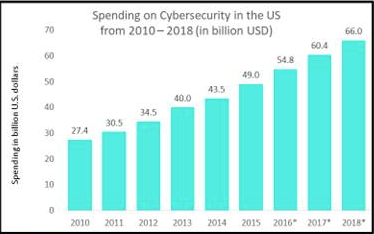 | 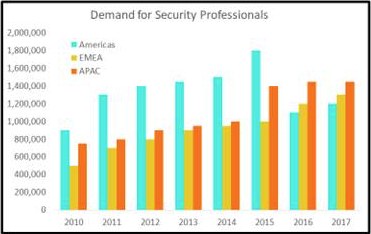 | 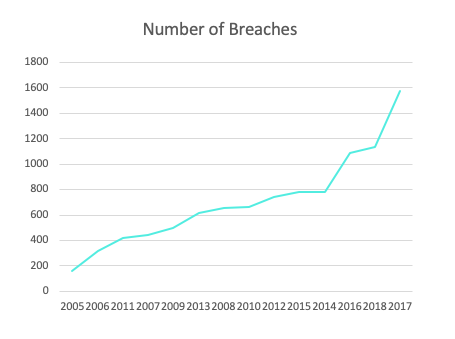 |
| Source: Statista 2019|Source: Frost and Sullivan | Source: Identity Threat Resource Center |  

However, the reality of cybersecurity is that since 2005, the world has seen a growth in the number of annual breaches in companies by 9x. We have seen OPM, JP Morgan, Anthem, Sony, Equifax, Home Depot, Adult Friend Finder, Yahoo!, Target and recently Marriott was just breached resulting in a compromise of 500 million records. While the world has spent hundreds of Billions of dollars and hired over 6 million cybersecurity professionals, the attackers are winning and have been winning as long as the Internet has been around. The cybersecurity attackers are very organized, well-funded, and in some cases, nation state backed. Unlike many industries, attackers or criminals are making millions of dollars attacking companies, like CryptoWall, which made a reported amount of 325 million dollars. 

One answer to address the attacker problem is to integrate Data Science into cybersecurity in order to predict the outcomes of attackers utilizing rich data sets.  This is a new capability that cybersecurity is starting to use and could hold the key for the future.  Many industry pundits believe that data science, machine learning, deep learning, and Artificial intelligence will be the keys to successfully to stop attackers.  Over the last few years, companies like McAfee, Symantec, Cylance, and Crowd Strike have developed Machine Learning Behavioral Products, but these are still not 100% effective because the attackers are writing malware that can bypass these algorithms or feature sets. In order to secure the future, the cybersecurity industry must evolve and develop more advanced algorithms to prevent and stop attackers. 

The dataset that will be used is part of a current __[Microsoft Kaggle competition](https://www.kaggle.com/c/microsoft-malware-prediction/data)__ and was captured by Microsoft in order to help them predict if Kagglers could determine whether machines would be breached.  Within the dataset, telemetry containing various properties and the machine infections was generated by combining heartbeat and threat reports collected by Microsoft's endpoint protection solution, Windows Defender.

In order to solve this problem, Team 4 explores various clustering techniques (**K-mode, PCA with K-means, and Gower Distance with K-Medoid**): <br><br>
1) **K-mode**, the team explores the clustering on defender version and OS version. K-mode is used for this effort because 100% of the data is categorical. The team uses silhoutte score and cost score from the K-mode to determine the optimum number of cluster. To validate the clusters created, the comparison to the ground truth (feature "HasDectection") will be performed. This validation technique will provide insight to the user if a certain defender version or OS version is more prone to be attacked or better protected.<br>
<br>
2) **PCA with K-means**, the team explores in feature reduction by using PCA and K-means. The new features are then used in Random Forest classification. The team compares if this technique can improve the area under curve. <br>
<br>
3) **Gower Distance with K-Medoid**, the team explores the possibility of improving Random Forest classification from Lab 2 by clustering "Large Category" that is not used in the model creation for Lab 2. The team compares if the new feature created from clustering can improve the area under curve. <br>

Lastly, the team will discuss the Ramification of clustering methodology in modeling the Malware data.


[Top](#Top)
[Business Understanding](#Business_Understanding)
[Data Understanding 1](#Data_Understanding_1)
[Data Understanding 2](#Data_Understanding_2)<br>
[Modeling and Evaluation 1](#ME_1)
[Modeling and Evaluation 2](#ME_2)
[Modeling and Evaluation 3](#ME_3)
[Modeling and Evaluation 4](#ME_4)<br>
[Deployment](#Deployment)
[Exceptional Work](#Exceptional_Work)

# Data Understanding 1<a id="Data_Understanding_1"></a>

In this section, we explore and prepare the data set to be ready for clustering. We describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. We explore data quality by addressing missing values, duplicate data, and outliers. The methodology for data understanding is as below.

### [Data Preparation Part 1a (Pre Processing)](#Pre_Processing)
1. Set appropiate data types
2. Removed columns that may be problematic
    * Columns with same value in all rows
    * Columns with a unique value in all rows
    * Empty Columns
3. Remove columns with low fill rate or high frequency of same value
4. Missing values
    * Update Census Continous values
    * Update Census Categorical values
    * Update remaining values
5. Remove Duplicate Rows
6. Data Quality Clean-up
7. Create new features

### [Data Preparation Part 1b (Feature Selection Modeling Building)](#Feature_Selection_Modeling_Building)
1. Create One-Hot encoding on variables used for modeling
2. Remove columns with similar characteristics or a correlation more than .95

### [Data Preparation Part 2 (Final Dataset)](#Data_Definitions)

In [2]:
import pandas as pd
import numpy as np

%run -i ColumnArrays.py

%time malware = pd.read_csv("data/final.csv")
%time data_glossary = pd.read_csv("data/data_glossary.csv", index_col=0)

<string>:2: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 4.82 s, sys: 540 ms, total: 5.36 s
Wall time: 4.21 s
CPU times: user 2.56 ms, sys: 544 µs, total: 3.1 ms
Wall time: 16.3 ms


In [2]:
def load_column_array(cols):
    cols_booleans = [
        "IsBeta",
        "IsSxsPassiveMode",
        "HasTpm",
        "IsProtected",
        "AutoSampleOptIn",
        "PuaMode",
        "SMode",
        "Firewall",
        "UacLuaenable",
        "Census_HasOpticalDiskDrive",
        "Census_IsPortableOperatingSystem",
        "Census_IsFlightingInternal",
        "Census_IsFlightsDisabled",
        "Census_ThresholdOptIn",
        "Census_IsSecureBootEnabled",
        "Census_IsWIMBootEnabled",
        "Census_IsVirtualDevice",
        "Census_IsTouchEnabled",
        "Census_IsPenCapable",
        "Census_IsAlwaysOnAlwaysConnectedCapable",
        "Wdft_IsGamer"
    ]

    cols_categorical = [
        "ProductName",
        "EngineVersion",
        "AppVersion",
        "AvSigVersion_x_x",
        "RtpStateBitfield",
        "AVProductsInstalled",
        "AVProductsEnabled",
        "CountryIdentifier",
        "OrganizationIdentifier",
        "Platform",
        "Processor",
        "OsVer",
        "OsBuild",
        "OsSuite",
        "OsPlatformSubRelease",
        "SkuEdition",
        "SmartScreen",
        "Census_MDC2FormFactor",
        "Census_DeviceFamily",
        "Census_ProcessorManufacturerIdentifier",
        "Census_ProcessorClass",
        "Census_PrimaryDiskTypeName",
        "Census_ChassisTypeName",
        "Census_PowerPlatformRoleName",
        "Census_InternalBatteryType",
        "Census_OSArchitecture",
        "Census_OSBranch",
        "Census_OSBuildNumber",
        "Census_OSEdition",
        "Census_OSSkuName",
        "Census_OSInstallTypeName",
        "Census_OSInstallLanguageIdentifier",
        "Census_OSUILocaleIdentifier",
        "Census_OSWUAutoUpdateOptionsName",
        "Census_GenuineStateName",
        "Census_ActivationChannel",
        "Census_FlightRing",
        "Wdft_RegionIdentifier"
    ]

    cols_categorical_large = [
 #       "AvSigVersion",
        "DefaultBrowsersIdentifier",
        "AVProductStatesIdentifier",
        "CityIdentifier",
        "GeoNameIdentifier",
        "OsBuildLab",
        "IeVerIdentifier",
        "Census_OEMNameIdentifier",
        "Census_OEMModelIdentifier",
        "Census_ProcessorModelIdentifier",
        "Census_OSVersion",
        "Census_OSBuildRevision",
        "Census_FirmwareManufacturerIdentifier",
        "Census_FirmwareVersionIdentifier",
        "LocaleEnglishNameIdentifier"
    ]

    cols_numerical = [
        "Census_ProcessorCoreCount",
        "Census_PrimaryDiskTotalCapacity",
        "Census_SystemVolumeTotalCapacity",
        "Census_TotalPhysicalRAM",
        "Census_InternalPrimaryDiagonalDisplaySizeInInches",
        #"Census_InternalPrimaryDisplayResolutionHorizontal",
        #"Census_InternalPrimaryDisplayResolutionVertical",
        "Census_InternalBatteryNumberOfCharges",
        "TotalDisplayResolution"
    ]
    
    # Update our column arrays
    cols_categorical = [x for x in cols_categorical if x in cols]
    cols_numerical = [x for x in cols_numerical if x in cols]
    cols_booleans = [x for x in cols_booleans if x in cols]
    cols_categorical_large = [x for x in cols_categorical_large if x in cols]
    
    return cols_categorical, cols_numerical, cols_booleans, cols_categorical_large

[Go back to Data Preperation](#Data_Preperation)
## Data Preparation Part 1 (Pre-Processing)<a id="Pre_Processing"></a>
### 1. Mapping appropriate data types
In order to understand the quality of the data, we did an extensive review of the data and determined which fields should be considered categorical, continous, or boolean.  We converted 23 id and category fields to object as well as removed outliers to make values boolean.  

In order to help provide easier development, we created 4 array of column names: cols_booleans, cols_numerical, cols_categorical, and cols_categorical_large. The values with over 100 possible values were moved to its own bucket, cols_categorical_large, requiring special care to review in order to determine if we could cluster values together.

The remaining code are steps we took to clean our data.

In [4]:
cols_categorical, cols_numerical, cols_booleans, cols_categorical_large = load_column_array(malware.columns)

print( "cols_booleans" ) 
display( cols_booleans )
print( "cols_numerical" )
display( cols_numerical )
print( "cols_categorical" )
display( cols_categorical )
print( "cols_categorical_large" )
display( cols_categorical_large )

#Convert features to right data type
malware[cols_categorical] = malware[cols_categorical].astype(object)
malware[cols_categorical_large] = malware[cols_categorical_large].astype(object)

cols_booleans


['IsBeta',
 'IsSxsPassiveMode',
 'HasTpm',
 'IsProtected',
 'AutoSampleOptIn',
 'PuaMode',
 'SMode',
 'Firewall',
 'UacLuaenable',
 'Census_HasOpticalDiskDrive',
 'Census_IsPortableOperatingSystem',
 'Census_IsFlightingInternal',
 'Census_IsFlightsDisabled',
 'Census_ThresholdOptIn',
 'Census_IsSecureBootEnabled',
 'Census_IsWIMBootEnabled',
 'Census_IsVirtualDevice',
 'Census_IsTouchEnabled',
 'Census_IsPenCapable',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'Wdft_IsGamer']

cols_numerical


['Census_ProcessorCoreCount',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalBatteryNumberOfCharges']

cols_categorical


['ProductName',
 'EngineVersion',
 'AppVersion',
 'RtpStateBitfield',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'CountryIdentifier',
 'OrganizationIdentifier',
 'Platform',
 'Processor',
 'OsVer',
 'OsBuild',
 'OsSuite',
 'OsPlatformSubRelease',
 'SkuEdition',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorClass',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSBuildNumber',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSInstallLanguageIdentifier',
 'Census_OSUILocaleIdentifier',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FlightRing',
 'Wdft_RegionIdentifier']

cols_categorical_large


['DefaultBrowsersIdentifier',
 'AVProductStatesIdentifier',
 'CityIdentifier',
 'GeoNameIdentifier',
 'OsBuildLab',
 'IeVerIdentifier',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_OSVersion',
 'Census_OSBuildRevision',
 'Census_FirmwareManufacturerIdentifier',
 'Census_FirmwareVersionIdentifier',
 'LocaleEnglishNameIdentifier']

### 2. Remove problematic columns
* Columns with same value in all rows
* Columns with a unique value in all rows
* Empty Columns

In [5]:
#Reference: https://github.com/jakemdrew/EducationDataNC/blob/master/2017/Machine%20Learning%20Datasets/Source%20Code/PublicElementarySchools2017_ML.ipynb

UniqueValueCounts = malware.nunique(dropna=False)
SingleValueCols = UniqueValueCounts[UniqueValueCounts == 1].index
malware = malware.drop(SingleValueCols, axis=1)

#Review dataset contents after drops
print( "Removing the following columns\n", SingleValueCols )
print( "\r\nAfter: Removing columns with the same value in every row" )
malware.info(verbose=False)
print('\r\nColumns Deleted: ', len(SingleValueCols) )

#Remove any fields that have unique values in every row
malwareRecordCt = malware.shape[0]
UniqueValueCounts = malware.apply(pd.Series.nunique)
AllUniqueValueCols = UniqueValueCounts[UniqueValueCounts == malwareRecordCt].index
malware = malware.drop(AllUniqueValueCols, axis=1)

#Review dataset contents after drops
print( "Removing the following columns\n", AllUniqueValueCols )
print( "\r\nAfter: Removing columns with unique values in every row" )
malware.info(verbose=False)
print( "\r\nColumns Deleted: ", len(AllUniqueValueCols) )

#Remove any empty fields (null values in every row)
malwareRecordCt = malware.shape[0]
NullValueCounts = malware.isnull().sum()
NullValueCols = NullValueCounts[NullValueCounts == malwareRecordCt].index
malware = malware.drop(NullValueCols, axis=1)

#Review dataset contents after empty field drops
print( "Removing the following columns\n", NullValueCols )
print( "\r\nAfter: Removing columns with null / blank values in every row." )
malware.info(verbose=False)
print( "\r\nColumns Deleted: ", len(NullValueCols) )

Removing the following columns
 Index(['IsBeta', 'CountryIdentifier'], dtype='object')

After: Removing columns with the same value in every row
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333411 entries, 0 to 333410
Columns: 81 entries, MachineIdentifier to HasDetections
dtypes: float64(19), int64(9), object(53)
memory usage: 206.0+ MB

Columns Deleted:  2
Removing the following columns
 Index(['MachineIdentifier'], dtype='object')

After: Removing columns with unique values in every row
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333411 entries, 0 to 333410
Columns: 80 entries, ProductName to HasDetections
dtypes: float64(19), int64(9), object(52)
memory usage: 203.5+ MB

Columns Deleted:  1
Removing the following columns
 Index([], dtype='object')

After: Removing columns with null / blank values in every row.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333411 entries, 0 to 333410
Columns: 80 entries, ProductName to HasDetections
dtypes: float64(19), int64(9), obje

### 3. Columns with low fill-rate or high frequency of same value

* Remove columns with 60% of values are NA or NULL
* Remove columsn with 80% of high frequency of same value

In [6]:
#Eliminate columns with 80% of missing values
malwareRecordCt = malware.shape[0]
missingValueLimit = malwareRecordCt * .6
NullValueCounts = malware.isnull().sum()
NullValueCols = NullValueCounts[NullValueCounts >= missingValueLimit].index
malware = malware.drop(NullValueCols, axis=1)

#Review dataset contents after empty field drops
print( "Removing the following columns\n", NullValueCols )
print( "\r\nAfter: Removing columns with >= .6 % of missing values" )
malware.info(verbose=False)
print ("\r\nColumns Deleted: ", len(NullValueCols) )

#Eliminate values with 80% of the value is the same
malwareRecordCt = malware.shape[0]
sameValueLimit = malwareRecordCt * .8
MaxColumnFreq = malware.apply(lambda x: x.value_counts().values[0])
HighFreqCols = MaxColumnFreq[MaxColumnFreq >= sameValueLimit].index
malware = malware.drop(HighFreqCols, axis=1)

#Review dataset contents after high frequency delete
print( "Removing the following columns\n", HighFreqCols )
print( "\r\nAfter: Removing columns with >= .8 % of missing values" )
malware.info(verbose=False)
print ("\r\nColumns Deleted: ", len(HighFreqCols) )


Removing the following columns
 Index(['DefaultBrowsersIdentifier', 'PuaMode', 'Census_ProcessorClass',
       'Census_InternalBatteryType', 'Census_IsFlightingInternal',
       'Census_ThresholdOptIn', 'Census_IsWIMBootEnabled'],
      dtype='object')

After: Removing columns with >= .6 % of missing values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333411 entries, 0 to 333410
Columns: 73 entries, ProductName to HasDetections
dtypes: float64(16), int64(9), object(48)
memory usage: 185.7+ MB

Columns Deleted:  7
Removing the following columns
 Index(['ProductName', 'RtpStateBitfield', 'IsSxsPassiveMode',
       'AVProductsEnabled', 'HasTpm', 'GeoNameIdentifier',
       'LocaleEnglishNameIdentifier', 'Platform', 'Processor', 'OsVer',
       'IsProtected', 'AutoSampleOptIn', 'SMode', 'Firewall', 'UacLuaenable',
       'Census_DeviceFamily', 'Census_HasOpticalDiskDrive',
       'Census_OSArchitecture', 'Census_IsPortableOperatingSystem',
       'Census_GenuineStateName', 'Census_IsF

In [7]:
# Update our column arrays
cols_categorical = [x for x in cols_categorical if x in malware.columns]
cols_numerical = [x for x in cols_numerical if x in malware.columns]
cols_booleans = [x for x in cols_booleans if x in malware.columns]
cols_categorical_large = [x for x in cols_categorical_large if x in malware.columns]

### 4. Impute Missing Values
#### Census Hardware Configurations
The continuous values represent all of hardware configurations on a machine, for example memory and hard drive capacity.  In order to assign the right value, we will use the median value grouped by **Census_MDC2FormFactor**.

In [8]:
#get the median value for each field
rowsBefore = malware[cols_numerical].isnull().T.any().T.sum()

#Removing values less then 0
malware[cols_numerical] = malware[cols_numerical].replace(-1, np.nan)

malware[cols_numerical] = malware.groupby("Census_MDC2FormFactor")[cols_numerical]\
    .transform(lambda x: x.fillna(x.median()))

#Review dataset contents after Census_MDC2FormFactor Census hardware Imputation
print("After: Updating Missing Continous Values")   
rowsAfter = malware[cols_numerical].isnull().T.any().T.sum()
rowsUpdated = rowsBefore - rowsAfter
print('Rows Updated / Imputed: ', rowsUpdated )
print('\r\nTotal Rows Missing Census Hardware by Census_MDC2FormFactor') 
malware['Census_MDC2FormFactor'][malware[cols_numerical].isnull().T.any().T].value_counts()

After: Updating Missing Continous Values
Rows Updated / Imputed:  14431

Total Rows Missing Census Hardware by Census_MDC2FormFactor


Series([], Name: Census_MDC2FormFactor, dtype: int64)

#### Census Categorial Configurations
Assign remaining missing values associated to Census details based on the mode of **Census_MDC2FormFactor**

In [9]:
#Get all census fields
CensusFields = malware.filter(regex='Census').columns
NullValueCounts = malware[CensusFields].isnull().sum()
NullValueCols = NullValueCounts[NullValueCounts > 0 ].index

rowsBefore = malware[NullValueCols].isnull().T.any().T.sum()

#Group by FormFactor and OSSkuName
malware[NullValueCols] = malware.groupby(["Census_MDC2FormFactor"])[NullValueCols]\
    .transform(lambda x: x.fillna(x.mode()[0]))

#Review dataset contents after Census Mode Imputations
print("After: Updating Missing Continous Values")   
rowsAfter = malware[NullValueCols].isnull().T.any().T.sum()
rowsUpdated = rowsBefore - rowsAfter
print('Rows Updated / Imputed: ', rowsUpdated )
print('\r\nTotal Rows Missing for Census Fields: ',malware[CensusFields].isnull().T.any().T.sum() )

After: Updating Missing Continous Values
Rows Updated / Imputed:  10893

Total Rows Missing for Census Fields:  0


#### Remaining Features
Set the remaining features as 0, to indicate not turned on (boolean) or feature available (categorical).

In [10]:
NullValueCounts = malware.isnull().sum()
NullValueCols = NullValueCounts[NullValueCounts > 0 ].index

rowsBefore = malware[NullValueCols].isnull().T.any().T.sum()

malware[NullValueCols] = malware[NullValueCols].fillna(0)

#Review dataset contents after Census Mode Imputations
print("After: Updating Missing Values")   
rowsAfter = malware[NullValueCols].isnull().T.any().T.sum()
rowsUpdated = rowsBefore - rowsAfter
print('Rows Updated / Imputed: ', rowsUpdated )
print('\r\nTotal Rows Missing values: ',malware.isnull().T.any().T.sum() )

After: Updating Missing Values
Rows Updated / Imputed:  120472

Total Rows Missing values:  0


### 5. Data Quality

In [11]:
# Smart Screen fill miising values and fix characters issue
malware.SmartScreen.replace({"off":"Off","00000000":"ExistsNotSet","&#x02;" :"ExistsNotSet",
                                 "&#x01;" :"ExistsNotSet",0:"ExistsNotSet"},inplace=True)
# currently renamed "Census_PrimaryDiskTypeName" unknown data into one category
malware.Census_PrimaryDiskTypeName.replace({"Unspecified":"Other"},inplace=True)

# currently renamed "Census_ChassisTypeName" unknown data into one category
malware.Census_ChassisTypeName.replace({"UNKNOWN":"Other","Unknown":"Other","0" :"Other",
                                "30" :"Other",
                                "35" :"Other",
                                "112" :"Other",
                                "76" :"Other",
                                "39" :"Other"},inplace=True)

# currently renamed "Census_PowerPlatformRoleName" unknown data into one category

malware.Census_PowerPlatformRoleName.fillna('Other', inplace=True)

malware.Census_PowerPlatformRoleName.replace({"UNKNOWN":"Other"},inplace=True)

### 6. Drop Duplicates

In [12]:
rowsBefore = len(malware)
malware = malware.drop_duplicates()


#Review dataset after deleting duplicates
print("After: Deleting rows")   
rowsAfter = len(malware)
rowsUpdated = rowsBefore - rowsAfter
print('Rows removed: ', rowsUpdated )

After: Deleting rows
Rows removed:  499


### 7. New Features & Data Transformation
**AvSigVersion** is a version number with its format of *1.217.1014.0*.  To reduce our columnes for One-Hot Encoding, we reduced the version to just Major.Minor.  or *1.217*.

In [13]:
AvSigUniqueValueCounts = malware["AvSigVersion"].nunique()

AvSigVersion_split = malware["AvSigVersion"].str.rsplit(pat=".",expand=True)
malware["AvSigVersion_x_x"] = AvSigVersion_split.loc[:,0]+"."+AvSigVersion_split.loc[:,1]

#Round the data
malware["AvSigVersion_x_x"] = malware["AvSigVersion_x_x"].astype(float)
malware["AvSigVersion_x_x"] = round(malware["AvSigVersion_x_x"],3)
malware["AvSigVersion_x_x"] = malware["AvSigVersion_x_x"].astype(object)

AvSigXXUniqueValueCounts = malware["AvSigVersion_x_x"].nunique()

print( "The unique values for AvSigVersion is ", AvSigUniqueValueCounts)
print( "After the transformation of Major.Minor, the unique features reudced to ", AvSigXXUniqueValueCounts)

# Add AvSigVersion_x_x to cols_categorical
cols_categorical.append("AvSigVersion_x_x")

# Add to data glossary
data_glossary = data_glossary.append(
    pd.DataFrame(
        data = ["New Feature: Reduced version of Defender state information e.g. 1.217"],
        index = ["AvSigVersion_x_x"],
        columns = ["description"]
    )
)

The unique values for AvSigVersion is  5704
After the transformation of Major.Minor, the unique features reudced to  36


**Census_InternalPrimaryDisplayResolutionHorizontal** and **Census_InternalPrimaryDisplayResolutionVertical** are both highly correlated values.  Instead of removing one of the features, we chose to create a new feature **TotalDisplayResolution** by multiple both values together.

In [14]:
#New Feature
malware["TotalDisplayResolution"] = malware.Census_InternalPrimaryDisplayResolutionHorizontal * malware.Census_InternalPrimaryDisplayResolutionVertical

# Add to data glossary
data_glossary = data_glossary.append(
    pd.DataFrame(
        data = ["New Feature: Total display resolution pixels (Horizotal * Vertical)"],
        index = ["TotalDisplayResolution"],
        columns = ["description"]
    )
)

print("Key Statistics on Total, Vertical, and Horizontal Resolution")
malware[["TotalDisplayResolution","Census_InternalPrimaryDisplayResolutionHorizontal","Census_InternalPrimaryDisplayResolutionVertical"]].describe()


Key Statistics on Total, Vertical, and Horizontal Resolution


TotalDisplayResolution  \
count            3.329120e+05   
mean             1.218806e+06   
std              5.335289e+05   
min              1.000000e+00   
25%              1.049088e+06   
50%              1.049088e+06   
75%              1.049088e+06   
max              2.035814e+07   

       Census_InternalPrimaryDisplayResolutionHorizontal  \
count                                      332912.000000   
mean                                         1435.903287   
std                                           250.158665   
min                                            -1.000000   
25%                                          1366.000000   
50%                                          1366.000000   
75%                                          1366.000000   
max                                          6016.000000   

       Census_InternalPrimaryDisplayResolutionVertical  
count                                    332912.000000  
mean                                        827.233891  
std                                         144.364711  
min                                          -1.000000  
25%                                         768.000000  
50%                                         768.000000  
75%                                         800.000000  
max                                        3840.000000

**SmartScreen** was converted to a response in order to provide further analysis on our predictions.  We reduced the possible values from 6 to 2.

In [15]:
# New Response Variable
malware['SmartScreenEnabled'] = malware.SmartScreen
malware.SmartScreenEnabled.replace({
    "Block":1,
    "ExistsNotSet":0,
    "Off" :0,
    "Prompt" :1,
    "RequireAdmin":1,
    "Warn":1
},inplace=True)

# Add to data glossary
data_glossary = data_glossary.append(
    pd.DataFrame(
        data = ["New Variable: Smart Screen Enabled 1/0, derived from SmartScreen"],
        index = ["SmartScreenEnabled"],
        columns = ["description"]
    )
)

print( "Number of values per class" )
display( malware.groupby(["SmartScreenEnabled"]).count()[["HasDetections"]] )

Number of values per class


HasDetections
SmartScreenEnabled               
0                          180535
1                          152377

Following fields has been logged transformed due to its extreme right skewness through visualizaiton.
* **Census_SystemVolumeTotalCapacity**
* **Census_TotalPhysicalRAM**
* **Census_PrimaryDiskTotalCapacity**

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,3,figsize=(15,7))
sns.set(font_scale=1)
s = sns.distplot(malware["Census_SystemVolumeTotalCapacity"], ax = ax[0] )
s.set_ylabel('')
s.set_yticks([])
t = sns.distplot(malware["Census_TotalPhysicalRAM"], ax = ax[1] )
t.set_ylabel('')
t.set_yticks([])
p = sns.distplot(malware["Census_PrimaryDiskTotalCapacity"], ax = ax[2] )
p.set_ylabel('')
p.set_yticks([])
fig.suptitle("Pre Transformation")
plt.show()

<Figure size 1500x700 with 3 Axes>

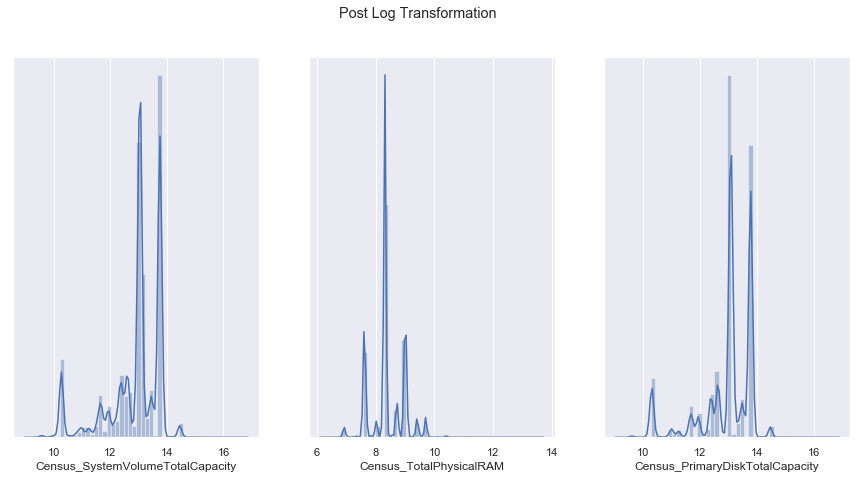

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

#Log values to remove outliers
malware["Census_SystemVolumeTotalCapacity"] = np.log(malware.Census_SystemVolumeTotalCapacity)
malware["Census_TotalPhysicalRAM"] = np.log(malware.Census_TotalPhysicalRAM)
malware["Census_PrimaryDiskTotalCapacity"] = np.log(malware.Census_PrimaryDiskTotalCapacity)

fig, ax = plt.subplots(1,3,figsize=(15,7))
sns.set(font_scale=1)
s = sns.distplot(malware["Census_SystemVolumeTotalCapacity"], ax = ax[0] )
s.set_ylabel('')
s.set_yticks([])
t = sns.distplot(malware["Census_TotalPhysicalRAM"], ax = ax[1] )
t.set_ylabel('')
t.set_yticks([])
p = sns.distplot(malware["Census_PrimaryDiskTotalCapacity"], ax = ax[2] )
p.set_ylabel('')
p.set_yticks([])
fig.suptitle("Post Log Transformation")
plt.show()

In [18]:
#Update Glossary
data_glossary.loc["Census_SystemVolumeTotalCapacity","description"] = data_glossary.loc["Census_SystemVolumeTotalCapacity","description"] + " (log transformation)"
data_glossary.loc["Census_TotalPhysicalRAM","description"] = data_glossary.loc["Census_TotalPhysicalRAM","description"] + " (log transformation)"
data_glossary.loc["Census_PrimaryDiskTotalCapacity","description"] = data_glossary.loc["Census_PrimaryDiskTotalCapacity","description"] + " (log transformation)"


In [19]:
# Save our dataset as malware.clean.csv
%time malware.to_csv("data/malware.clean.csv", index=False)
%time data_glossary.to_csv("data/data_glossary.new.features.csv",index=True)

CPU times: user 9.9 s, sys: 210 ms, total: 10.1 s
Wall time: 10.1 s
CPU times: user 1.52 ms, sys: 744 µs, total: 2.27 ms
Wall time: 10.5 ms


[Go Back to Data Preperation](#Data_Preperation)
## Data Preparation Part 1b (Feature Selection Modeling Building)<a id="Feature_Selection_Modeling_Building"></a>
Following functions are used during model building
* Create One-Hot Encoding
* Remove Highly Corrleated Features

In [20]:
def get_one_hot_encodings(df, cols):
    result = pd.DataFrame()
    i = 0
    for col in cols:
        dummies = pd.get_dummies(df[col],prefix=col)
        if( i == 0 ):
            result = dummies.copy()
        else:
            result = pd.concat((result, dummies), axis=1)
        i+=1
    return result

In [21]:
def reduce_features(df, verbose = False):
    # calculate the correlation matrix
    corr_matrix  = df.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find index of feature columns with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
    
    #Get all of the correlation values > 95%
    x = np.where(upper > 0.95)

    #Display all field combinations with > 95% correlation
    cf = pd.DataFrame()
    cf['Field1'] = upper.columns[x[1]]
    cf['Field2'] = upper.index[x[0]]

    #Get the correlation values for every field combination. (There must be a more pythonic way to do this!)
    corr = [0] * len(cf)
    for i in range(0, len(cf)):
        corr[i] =  upper[cf['Field1'][i]][cf['Field2'][i]] 

    cf['Correlation'] = corr

    if( verbose ):
        print('There are ', str(len(cf['Field1'])), ' field correlations > 95%.')
        display(cf)
        
        print('Dropping the following ', str(len(to_drop)), ' highly correlated fields.')
        to_drop
        
    #Check columns before drop 
    if( verbose ):
        print('\r\n*********Before: Dropping Highly Correlated Fields*************************************')
        display(df.info(verbose=False))

    # Drop the highly correlated features from our training data 
    df = df.drop(to_drop, axis=1)

    #Check columns after drop 
    if( verbose ):
        print('\r\n*********After: Dropping Highly Correlated Fields**************************************')
        df.info(verbose=False)
    
    return df

### Example of feature reductions on highly correlated values
1. Examine the columns
    * We will create dummy variables for all columns that have less then 100 unique values, which are classified in the cols_categorical array.
2. Remove highly correlated values
3. Remove low frequenct values from large categorical features

#### 1. Review unique column counts
Created 2 groups of categories, < 100 unique values and > 100 unique values

In [201]:
pd.options.display.max_rows = 999

malware = pd.read_csv("data/malware.clean.csv")
cols_categorical, cols_numerical, cols_booleans, cols_categorical_large = load_column_array(malware.columns)
malware[cols_categorical] = malware[cols_categorical].astype(object)
malware[cols_categorical_large] = malware[cols_categorical_large].astype(object)

oneHotUniqueValueCounts = malware[cols_categorical].apply(lambda x: x.nunique())
print( "Cateogiries that have less then 100 unique values" )
display(oneHotUniqueValueCounts)

oneHotUniqueValueCounts = malware[cols_categorical_large].apply(lambda x: x.nunique())
print( "Cateogiries that have more then 100 unique values" )
display(oneHotUniqueValueCounts)
pd.reset_option('max_row')

Cateogiries that have less then 100 unique values


EngineVersion                             49
AppVersion                                77
AvSigVersion_x_x                          36
AVProductsInstalled                        6
OrganizationIdentifier                    20
OsBuild                                   34
OsSuite                                    9
OsPlatformSubRelease                       9
SkuEdition                                 8
SmartScreen                                6
Census_MDC2FormFactor                     11
Census_ProcessorManufacturerIdentifier     4
Census_PrimaryDiskTypeName                 4
Census_ChassisTypeName                    23
Census_PowerPlatformRoleName               8
Census_OSBranch                           13
Census_OSBuildNumber                      42
Census_OSEdition                          23
Census_OSSkuName                          22
Census_OSInstallTypeName                   9
Census_OSInstallLanguageIdentifier        25
Census_OSUILocaleIdentifier               27
Census_OSW

Cateogiries that have more then 100 unique values


AVProductStatesIdentifier                 2961
CityIdentifier                            2798
OsBuildLab                                 395
IeVerIdentifier                            150
Census_OEMNameIdentifier                   402
Census_OEMModelIdentifier                11512
Census_ProcessorModelIdentifier           1767
Census_OSVersion                           263
Census_OSBuildRevision                     220
Census_FirmwareManufacturerIdentifier      101
Census_FirmwareVersionIdentifier          9343
dtype: int64

#### 2. Apply Feature Reduction

In [202]:
%%time 

# Load Data
import pandas as pd
import numpy as np

# Get data and create a model
malware = pd.read_csv("data/malware.clean.csv")

#Get all categories or cast
cols_categorical, cols_numerical, cols_booleans, cols_categorical_large = load_column_array(malware.columns)
malware[cols_categorical] = malware[cols_categorical].astype(object)
malware[cols_categorical_large] = malware[cols_categorical_large].astype(object)

# Shrink Data and Create Datasets in order to Run Basic Models 
model_data = pd.concat(
    (    
        malware[cols_booleans],
        malware[cols_numerical],
        get_one_hot_encodings(malware, cols_categorical)
    ), axis = 1)

model_data = reduce_features(model_data, verbose=True)
model_data.to_csv("data/model_data.csv",index=False)

There are  136  field correlations > 95%.


Field1  \
0                 Census_SystemVolumeTotalCapacity   
1                           AvSigVersion_x_x_1.199   
2                           AvSigVersion_x_x_1.203   
3                           AvSigVersion_x_x_1.207   
4                           AvSigVersion_x_x_1.213   
5                           AvSigVersion_x_x_1.217   
6                           AvSigVersion_x_x_1.219   
7                           AvSigVersion_x_x_1.225   
8                           AvSigVersion_x_x_1.227   
9                           AvSigVersion_x_x_1.229   
10             AvSigVersion_x_x_1.2309999999999999   
11             AvSigVersion_x_x_1.2329999999999999   
12                          AvSigVersion_x_x_1.235   
13                          AvSigVersion_x_x_1.237   
14                          AvSigVersion_x_x_1.239   
15             AvSigVersion_x_x_1.2409999999999999   
16             AvSigVersion_x_x_1.2429999999999999   
17                          AvSigVersion_x_x_1.245   
18                          AvSigVersion_x_x_1.247   
19                          AvSigVersion_x_x_1.249   
20                          AvSigVersion_x_x_1.251   
21                          AvSigVersion_x_x_1.253   
22                          AvSigVersion_x_x_1.255   
23             AvSigVersion_x_x_1.2570000000000001   
24             AvSigVersion_x_x_1.2590000000000001   
25                          AvSigVersion_x_x_1.261   
26                          AvSigVersion_x_x_1.263   
27                          AvSigVersion_x_x_1.265   
28             AvSigVersion_x_x_1.2670000000000001   
29             AvSigVersion_x_x_1.2690000000000001   
..                                             ...   
106                  Census_OSSkuName_ENTERPRISE_N   
107                  Census_OSSkuName_ENTERPRISE_S   
108                Census_OSSkuName_ENTERPRISE_S_N   
109                  Census_OSSkuName_PROFESSIONAL   
110                Census_OSSkuName_PROFESSIONAL_N   
111               Census_OSSkuName_PRO_WORKSTATION   
112             Census_OSSkuName_PRO_WORKSTATION_N   
113             Census_OSSkuName_DATACENTER_SERVER   
114  Census_OSSkuName_DATACENTER_EVALUATION_SERVER   
115            Census_OSSkuName_SB_SOLUTION_SERVER   
116               Census_OSSkuName_STANDARD_SERVER   
117    Census_OSSkuName_STANDARD_EVALUATION_SERVER   
118                 Census_OSUILocaleIdentifier_20   
119                 Census_OSUILocaleIdentifier_26   
120                 Census_OSUILocaleIdentifier_30   
121                 Census_OSUILocaleIdentifier_31   
122                 Census_OSUILocaleIdentifier_34   
123                 Census_OSUILocaleIdentifier_35   
124                 Census_OSUILocaleIdentifier_49   
125                 Census_OSUILocaleIdentifier_58   
126                 Census_OSUILocaleIdentifier_64   
127                 Census_OSUILocaleIdentifier_74   
128                 Census_OSUILocaleIdentifier_83   
129                Census_OSUILocaleIdentifier_115   
130                Census_OSUILocaleIdentifier_119   
131                Census_OSUILocaleIdentifier_123   
132                Census_OSUILocaleIdentifier_125   
133                Census_OSUILocaleIdentifier_128   
134                Census_OSUILocaleIdentifier_140   
135                Census_OSUILocaleIdentifier_160   

                                        Field2  Correlation  
0              Census_PrimaryDiskTotalCapacity     0.962793  
1                    EngineVersion_1.1.11701.0     1.000000  
2                    EngineVersion_1.1.11903.0     1.000000  
3                    EngineVersion_1.1.12101.0     1.000000  
4                    EngineVersion_1.1.12400.0     1.000000  
5                    EngineVersion_1.1.12603.0     1.000000  
6                    EngineVersion_1.1.12706.0     1.000000  
7                    EngineVersion_1.1.12902.0     0.964266  
8                    EngineVersion_1.1.13000.0     0.965675  
9                    EngineVersion_1.1.13103.0     0.977312  
10           

Dropping the following  114  highly correlated fields.

*********Before: Dropping Highly Correlated Fields*************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332912 entries, 0 to 332911
Columns: 486 entries, Census_IsSecureBootEnabled to Census_ActivationChannel_Volume:MAK
dtypes: float64(8), int64(1), uint8(477)
memory usage: 174.3 MB


None


*********After: Dropping Highly Correlated Fields**************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332912 entries, 0 to 332911
Columns: 372 entries, Census_IsSecureBootEnabled to Census_ActivationChannel_Volume:MAK
dtypes: float64(7), int64(1), uint8(364)
memory usage: 135.9 MB
CPU times: user 3min 45s, sys: 7.33 s, total: 3min 52s
Wall time: 3min 26s


#### 3. Feature Reduction for Large Categories
For the remaining large categories, we are evaluating the counts and dropping off the one that exceed the limit. The objective is to reduce the number of large categories while maintaining the integrity of the data

In [153]:
def redLargeCat (malware, attribute, limit):
    SumCat = pd.crosstab(malware[attribute], malware.HasDetections.astype(bool))
    SumCat['count']=SumCat[True]+SumCat[False]
    SumCat['ratio']=(SumCat[True]/SumCat['count'])*100
    SumCat100 = SumCat[SumCat['count']<limit].sort_values(by=['count'], ascending=False)
    SumCat100.sum(axis=0) 
    percent = (SumCat100.sum(axis=0)['count']/malware.shape[0])*100
    original = SumCat.shape[0]
    reduction = original - SumCat100.shape[0]
    attribute_index = SumCat100.index
    print("Attribute", attribute, "with count limit", limit, "Percentage Reduction is ", percent, "Original/New", original, reduction)
    return percent, original, reduction, attribute_index

In [18]:
def replace_large(malware, attribute, attribute_index):
    replace_index = malware[malware[attribute].isin(attribute_index)][attribute].index
    malware.loc[replace_index, attribute]=99999

In [19]:
(a,b,c,d) = redLargeCat(malware, 'AVProductStatesIdentifier',100)
replace_large(malware, 'AVProductStatesIdentifier',d)

Attribute AVProductStatesIdentifier with count limit 100 Percentage Reduction is  4.302638535108376 Original/New 2961 91


In [20]:
(a,b,c,d) = redLargeCat(malware, 'CityIdentifier',100)
replace_large(malware, 'CityIdentifier',d)

Attribute CityIdentifier with count limit 100 Percentage Reduction is  5.681982025279954 Original/New 2798 182


In [21]:
(a,b,c,d) = redLargeCat(malware, 'OsBuildLab',500)
replace_large(malware, 'OsBuildLab',d)

Attribute OsBuildLab with count limit 500 Percentage Reduction is  5.560328254914212 Original/New 395 43


In [22]:
(a,b,c,d) = redLargeCat(malware, 'IeVerIdentifier',500)
replace_large(malware, 'IeVerIdentifier',d)

Attribute IeVerIdentifier with count limit 500 Percentage Reduction is  2.0506920747825252 Original/New 150 24


In [23]:
(a,b,c,d) = redLargeCat(malware, 'Census_OEMNameIdentifier',500)
replace_large(malware, 'Census_OEMNameIdentifier',d)

Attribute Census_OEMNameIdentifier with count limit 500 Percentage Reduction is  2.3438626423799684 Original/New 402 31


In [24]:
(a,b,c,d) = redLargeCat(malware, 'Census_OEMModelIdentifier',300)
replace_large(malware, 'Census_OEMModelIdentifier',d)

Attribute Census_OEMModelIdentifier with count limit 300 Percentage Reduction is  47.103138366895756 Original/New 11512 190


In [25]:
(a,b,c,d) = redLargeCat(malware, 'Census_ProcessorModelIdentifier',300)
replace_large(malware, 'Census_ProcessorModelIdentifier',d)

Attribute Census_ProcessorModelIdentifier with count limit 300 Percentage Reduction is  18.24386023934253 Original/New 1767 195


In [26]:
(a,b,c,d) = redLargeCat(malware, 'Census_OSVersion',500)
replace_large(malware, 'Census_OSVersion',d)

Attribute Census_OSVersion with count limit 500 Percentage Reduction is  4.177079828903734 Original/New 263 81


In [27]:
(a,b,c,d) = redLargeCat(malware, 'Census_OSBuildRevision',500)
replace_large(malware, 'Census_OSBuildRevision',d)

Attribute Census_OSBuildRevision with count limit 500 Percentage Reduction is  4.146741481232278 Original/New 220 79


In [28]:
(a,b,c,d) = redLargeCat(malware, 'Census_FirmwareManufacturerIdentifier',500)
replace_large(malware, 'Census_FirmwareManufacturerIdentifier',d)

Attribute Census_FirmwareManufacturerIdentifier with count limit 500 Percentage Reduction is  0.6632383332532321 Original/New 101 22


In [29]:
(a,b,c,d) = redLargeCat(malware, 'Census_FirmwareVersionIdentifier',300)
replace_large(malware, 'Census_FirmwareVersionIdentifier',d)

Attribute Census_FirmwareVersionIdentifier with count limit 300 Percentage Reduction is  39.586737636372376 Original/New 9343 184


In [30]:
oneHotUniqueValueCounts = malware[cols_categorical_large].apply(lambda x: x.nunique())
print( "After Reduction, the large categories have the following unique values" )
display(oneHotUniqueValueCounts)
pd.reset_option('max_row')

After Reduction, the large categories have the following unique values


AVProductStatesIdentifier                 92
CityIdentifier                           183
OsBuildLab                                44
IeVerIdentifier                           25
Census_OEMNameIdentifier                  32
Census_OEMModelIdentifier                191
Census_ProcessorModelIdentifier          196
Census_OSVersion                          82
Census_OSBuildRevision                    80
Census_FirmwareManufacturerIdentifier     23
Census_FirmwareVersionIdentifier         185
dtype: int64

### Final Feature

Our original data set has over 300k rows and 375 to 8,000 columns after data preparation and one-hot encoding.  Given our size of the data, we are confident that our model will not be underfitted with any training method.  However, we do have concern regarding overfitting our model.  Another issue with the size of our data set is the system computation it takes to create our model.  

In order to address overfitting our model and create a model within a manageable amount of time, will will use the following technique.  

1) **Sub sample 20% of our data**
- `subMalware` - New Data Frame
- `submodel_data` - New Data Frame

*For reproducible research, we will use `random.seed` parameter with a value of <b>42</b>*.

In [22]:
# Load Data
import pandas as pd
import numpy as np

# Get data and create a model
malware = pd.read_csv("data/malware.clean.csv")
model_data = pd.read_csv("data/model_data.csv")

#Get all categories or cast
cols_categorical, cols_numerical, cols_booleans, cols_categorical_large = load_column_array(malware.columns)
malware[cols_categorical] = malware[cols_categorical].astype(object)
malware[cols_categorical_large] = malware[cols_categorical_large].astype(object)

# Create a Sub Sample of our malware data
rowCounts = len(malware)
sample_size = .20

np.random.seed(42)
finalSampleIndex = np.random.choice(rowCounts, int(rowCounts*sample_size), replace=False)

subMalware = malware.iloc[finalSampleIndex,:].reset_index()
submodel_data = model_data.iloc[finalSampleIndex,:].reset_index()
del subMalware['index']
del submodel_data['index']

print( "Our subsample data has the following number of rows: ", len(subMalware) )

#Save a Sub Sample
subMalware.to_csv("data/malware.subsample.csv")
submodel_data.to_csv("data/model_data.sample.csv")

Our subsample data has the following number of rows:  66582


[Go back to Rubric](#Top)
## Data Preparation 2 (Final Dataset Definitions)<a id="Data_Definitions"></a>

The following values are the remaining fields we will use after removing columns we found problamatic.

In [23]:
import pandas as pd
pd.set_option('max_colwidth', 120)
pd.options.display.max_rows = 999

# Only display fields remaining in malware
malware = pd.read_csv("data/malware.clean.csv")
data_glossary = pd.read_csv("data/data_glossary.new.features.csv", index_col=0)

display( data_glossary.loc[malware.columns,:] )

pd.reset_option('max_colwidth')
pd.reset_option('max_row')

description
EngineVersion                                                                                                                  Defender state information e.g. 1.1.12603.0
AppVersion                                                                                                                     Defender state information e.g. 4.9.10586.0
AvSigVersion                                                                                                                  Defender state information e.g. 1.217.1014.0
AVProductStatesIdentifier                                                                                 ID for the specific configuration of a user's antivirus software
AVProductsInstalled                                                                                                                      Whether AV Products are installed
CityIdentifier                                                                                                                   ID for the city the machine is located in
OrganizationIdentifier                             ID for the organization the machine belongs in, organization ID is mapped to both specific companies and -broad indu...
OsBuild                                                                                                                              Build of the current operating system
OsSuite                                                                                                               Product suite mask for the current operating system.
OsPlatformSubRelease                                                                   Returns the OS Platform sub-release (Windows Vista, Windows 7, Windows 8, TH1, TH2)
OsBuildLab                                                                    Build lab that generated the current OS. Example: 9600.17630.amd64fre.winblue_r7.150109-2022
SkuEdition                                         The goal of this feature is to use the Product Type defined in the MSDN to map to a 'SKU-Edition' name that is usefu...
IeVerIdentifier                                                                                              Determination of the last known state of the operating system
SmartScreen                                        This is the SmartScreen enabled string value from registry. This is obtained by checking in order, HKLM\SOFTWARE\Pol...
Census_MDC2FormFactor                              A grouping based on a combination of Device Census level hardware characteristics. The logic used to define Form Fac...
Census_OEMNameIdentifier                                                                                                                               OEM Identifier COde
Census_OEMModelIdentifier                                                                                                                             OEM Model Identifier
Census_ProcessorCoreCount                                                                                                         Number of logical cores in the processor
Census_ProcessorManufacturerIdentifier                                                                                                              Processor Manufacturer
Census_ProcessorModelIdentifier                                                                                                                            Processor Model
Census_PrimaryDiskTotalCapacity                                                             Amount of disk space on primary disk of the machine in MB (log transformation)
Census_PrimaryDiskTypeName                                                                                                   Friendly name of Primary Disk Type HDD or SSD
Census_SystemVolumeTotalCapacity                                               The size of the partition that the System volume is installed on in MB (log transformation)
Census_TotalPhysicalRAM                                

[Top](#Top)
[Business Understanding](#Business_Understanding)
[Data Understanding 1](#Data_Understanding_1)
[Data Understanding 2](#Data_Understanding_2)<br>
[Modeling and Evaluation 1](#ME_1)
[Modeling and Evaluation 2](#ME_2)
[Modeling and Evaluation 3](#ME_3)
[Modeling and Evaluation 4](#ME_4)<br>
[Deployment](#Deployment)
[Exceptional Work](#Exceptional_Work)

## Data Understanding 2 (Attribute Visualization)<a id="Data_Understanding_2"></a>

In this section we visualize important attributes. The following attributes are discussed thoroughly.
* [Data Types](#Data_Types)
* [Heat Map](#Heat_Map)
* [Defender Versioning](#Defender_Versioning)
* [Hardware Configuration](#Hardware_Configurations)
* [PCA Analysis](#PCA_Analysis)
* [Additional Analysis on Has Detections](#Additional_Analysis)

[Back to Data Understanding 2](#Data_Understanding_2)
### Data Types<a id="Data_Types"></a>
The below chart visualize the imbalance of cotinouse variables and categorical variables.  Over 98% of features with more then 100 unique values is 98% of all the uniques values in the data set.  With only 8 features related to continous, we will focus our metrics on using Gower Distance and KModes in order to learn how our data clusters.

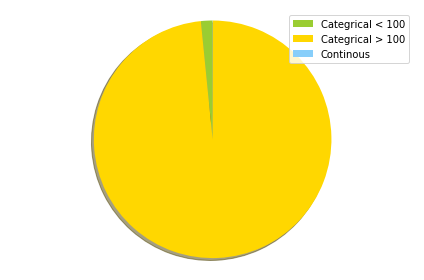

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

malware = pd.read_csv("data/malware.clean.csv")

#Get all categories or cast
cols_categorical, cols_numerical, cols_booleans, cols_categorical_large = load_column_array(malware.columns)
malware[cols_categorical] = malware[cols_categorical].astype(object)
malware[cols_categorical_large] = malware[cols_categorical_large].astype(object)

labels = ['Categrical < 100', 'Categrical > 100', 'Continous']
sizes = []
sizes.append(sum(malware[np.append(cols_categorical,cols_booleans)].nunique()))
sizes.append(sum(malware[cols_categorical_large].nunique()))
sizes.append(len(cols_numerical))

colors = ['yellowgreen', 'gold', 'lightskyblue']

patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

Below is the unique values for our features with < 100 unique values.  The total of these features exceeds 400 values, once we implement One-Hot Encoding.

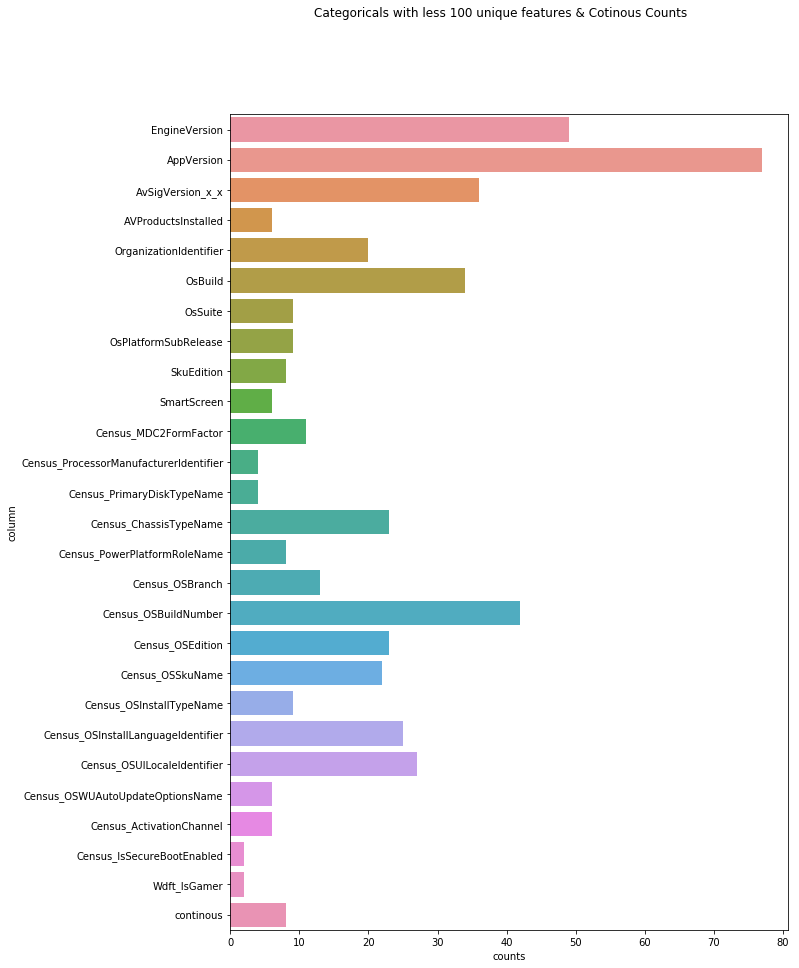

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

malware = pd.read_csv("data/malware.clean.csv")

#Get all categories or cast
cols_categorical, cols_numerical, cols_booleans, cols_categorical_large = load_column_array(malware.columns)
malware[cols_categorical] = malware[cols_categorical].astype(object)
malware[cols_categorical_large] = malware[cols_categorical_large].astype(object)

# df = pd.DataFrame(columns=np.append(cols_categorical,cols_booleans))
df = []
for col in np.append(cols_categorical,cols_booleans):
#     df[col] = pd.Series(malware[col].nunique())
    df.append({"column":col,"counts":malware[col].nunique()})
        
df.append({"column":"continous","counts":len(cols_numerical)})

df = pd.DataFrame(df)

fig, ax = plt.subplots(figsize=(10,15))
g = sns.barplot(y="column",x="counts", data=df)
fig.suptitle("Categoricals with less 100 unique features & Cotinous Counts")
plt.show()

[Back to Data Understanding 2](#Data_Understanding_2)
### Heatmap<a id="Heat_Map"></a>
#### Heatmap of Hardware Configuration

Visualily, we expcect to see positive correlation betweent he increase in hardware performances between each feature.  For example, it would be common for a machine with high Core Count to also have high memory (corr=0.5).

We will remove one of the capacity values through our function `reduce_features`., which exceeds our .95 correlation tolerance.

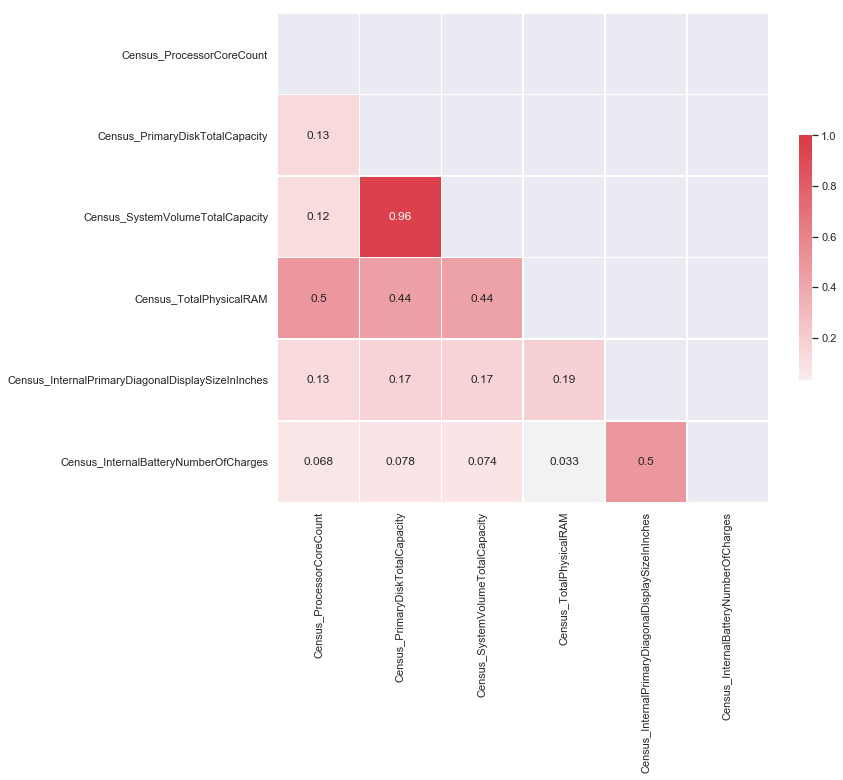

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

malware = pd.read_csv("data/malware.clean.csv")

#Get all categories or cast
cols_categorical, cols_numerical, cols_booleans, cols_categorical_large = load_column_array(malware.columns)
malware[cols_categorical] = malware[cols_categorical].astype(object)
malware[cols_categorical_large] = malware[cols_categorical_large].astype(object)

corr = malware[cols_numerical].corr()

# Generate a mask for the upper triangle
sns.set(font_scale=1)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=False, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

#### Software Configuration
There are several fields of **AVInstalled** and **AVEnabled** that are cateogirized as 0,1,2, etc. but we are not sure what this data means.  In order to understand these fields we created a heatmap between different features (excluding builds) to determine if there could be a relationship. 
We separate the heatmap for positive correlation and negative correlation for easy viewing.

The heatmap below shows possitive correlation of ~0.6  for **FlightRing_NOT_SET** to **ActivationChannel_Volume** and **DownloadNotify** to **ActivationChannel_Retail**.

#### AV Builds
The below heatmap shows us that **EngineVersion** is **positively correlated** with **AVSigVersion**.  Through our reserch, we learned that **AVSigVersion** has the latest versions of malware definitions.  During our building of the model, we will favor **AVSigVersion** instead of **EngineVersion**.

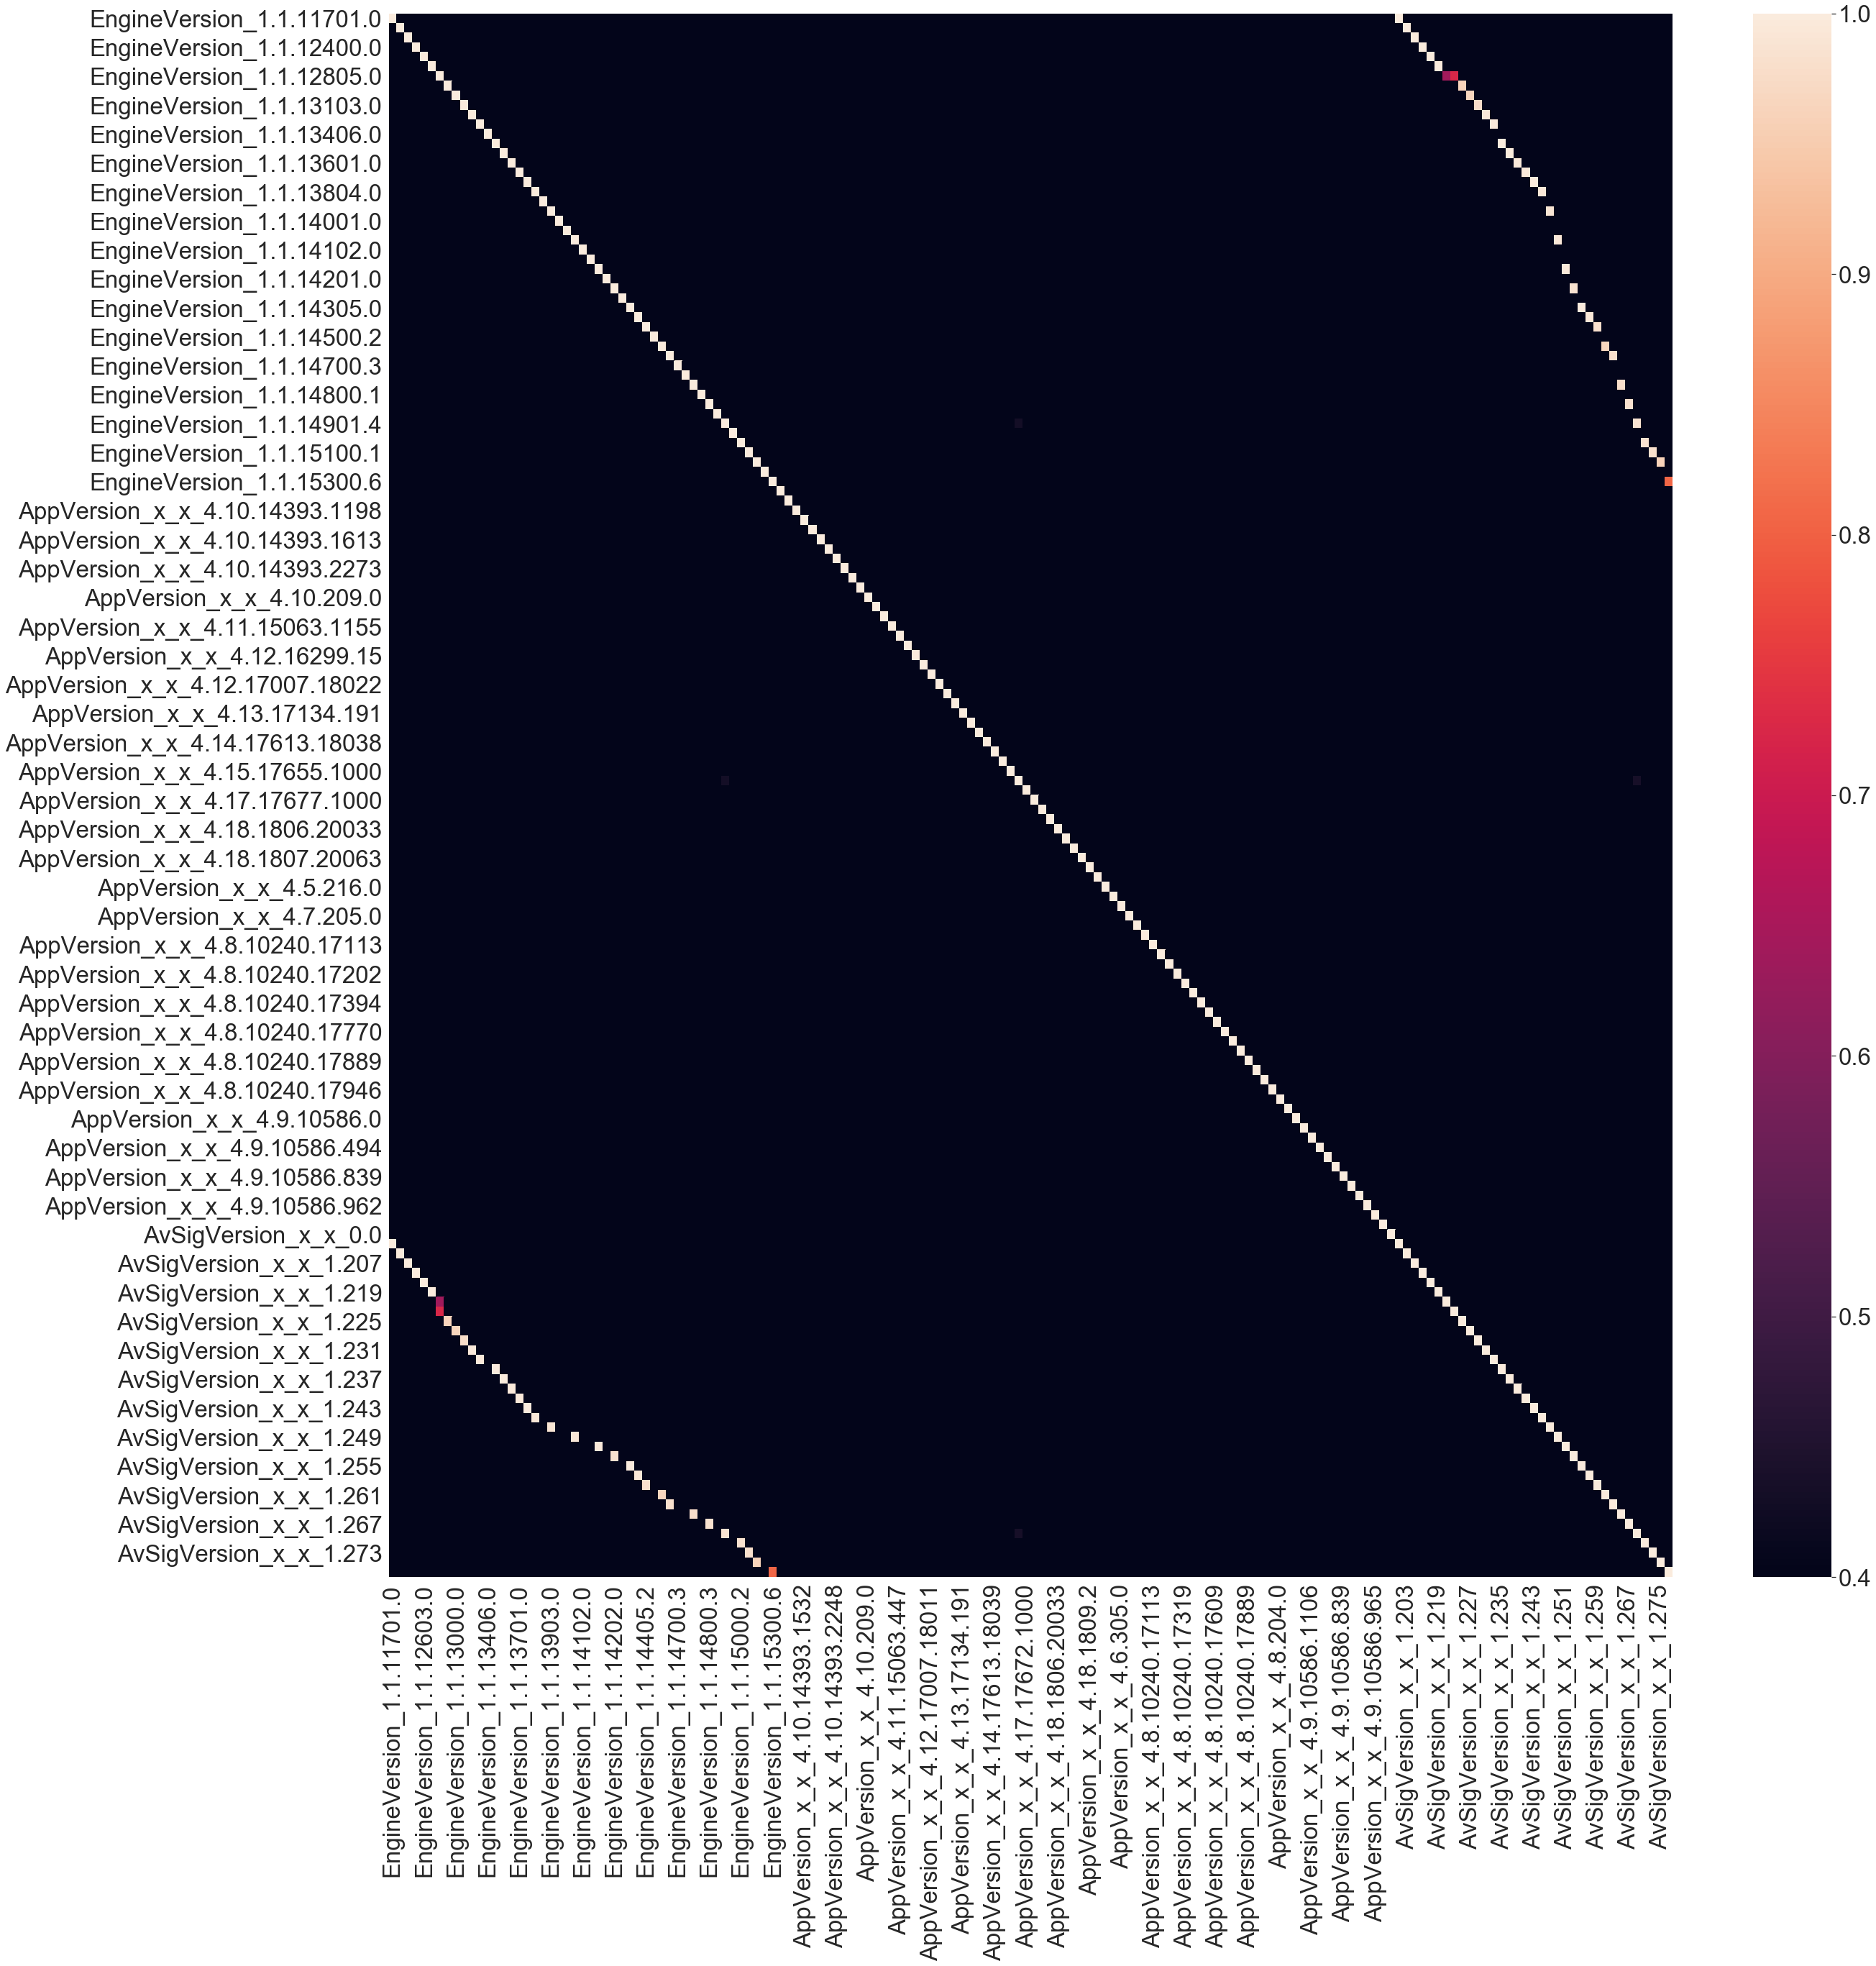

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

malware = pd.read_csv("data/malware.clean.csv")

malware["AvSigVersion_x_x"] = round(malware["AvSigVersion_x_x"],3)

#Get all categories or cast
cols_categorical, cols_numerical, cols_booleans, cols_categorical_large = load_column_array(malware.columns)
malware[cols_categorical] = malware[cols_categorical].astype(object)
malware[cols_categorical_large] = malware[cols_categorical_large].astype(object)

EngineVersion = pd.get_dummies(malware["EngineVersion"],prefix="EngineVersion")
AppVersion = pd.get_dummies(malware["AppVersion"],prefix="AppVersion_x_x")
AvSigVersion_x_x = pd.get_dummies(malware["AvSigVersion_x_x"],prefix="AvSigVersion_x_x")


df = pd.concat(
    (
        EngineVersion,
        AppVersion,
        AvSigVersion_x_x
    ), axis=1
)

corr = df.corr()

sns.set(font_scale=3)
fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(corr, ax=ax, vmin=0.4)
plt.show()

Negative heatmap below shows negative correlation between **AvSigVersion 1.273 and 1.277**. This shows that a system that is upgraded to AvSigVersion1.277 is normally has the Revision of 1.273. Also, a similar negative correlation is seen for **EngineVersion 1.1.15200.1 and 1.1.15300.6**. From the previous plot, we know that is expected given the high positive correlation between AvSigVersion to EngineVersion.

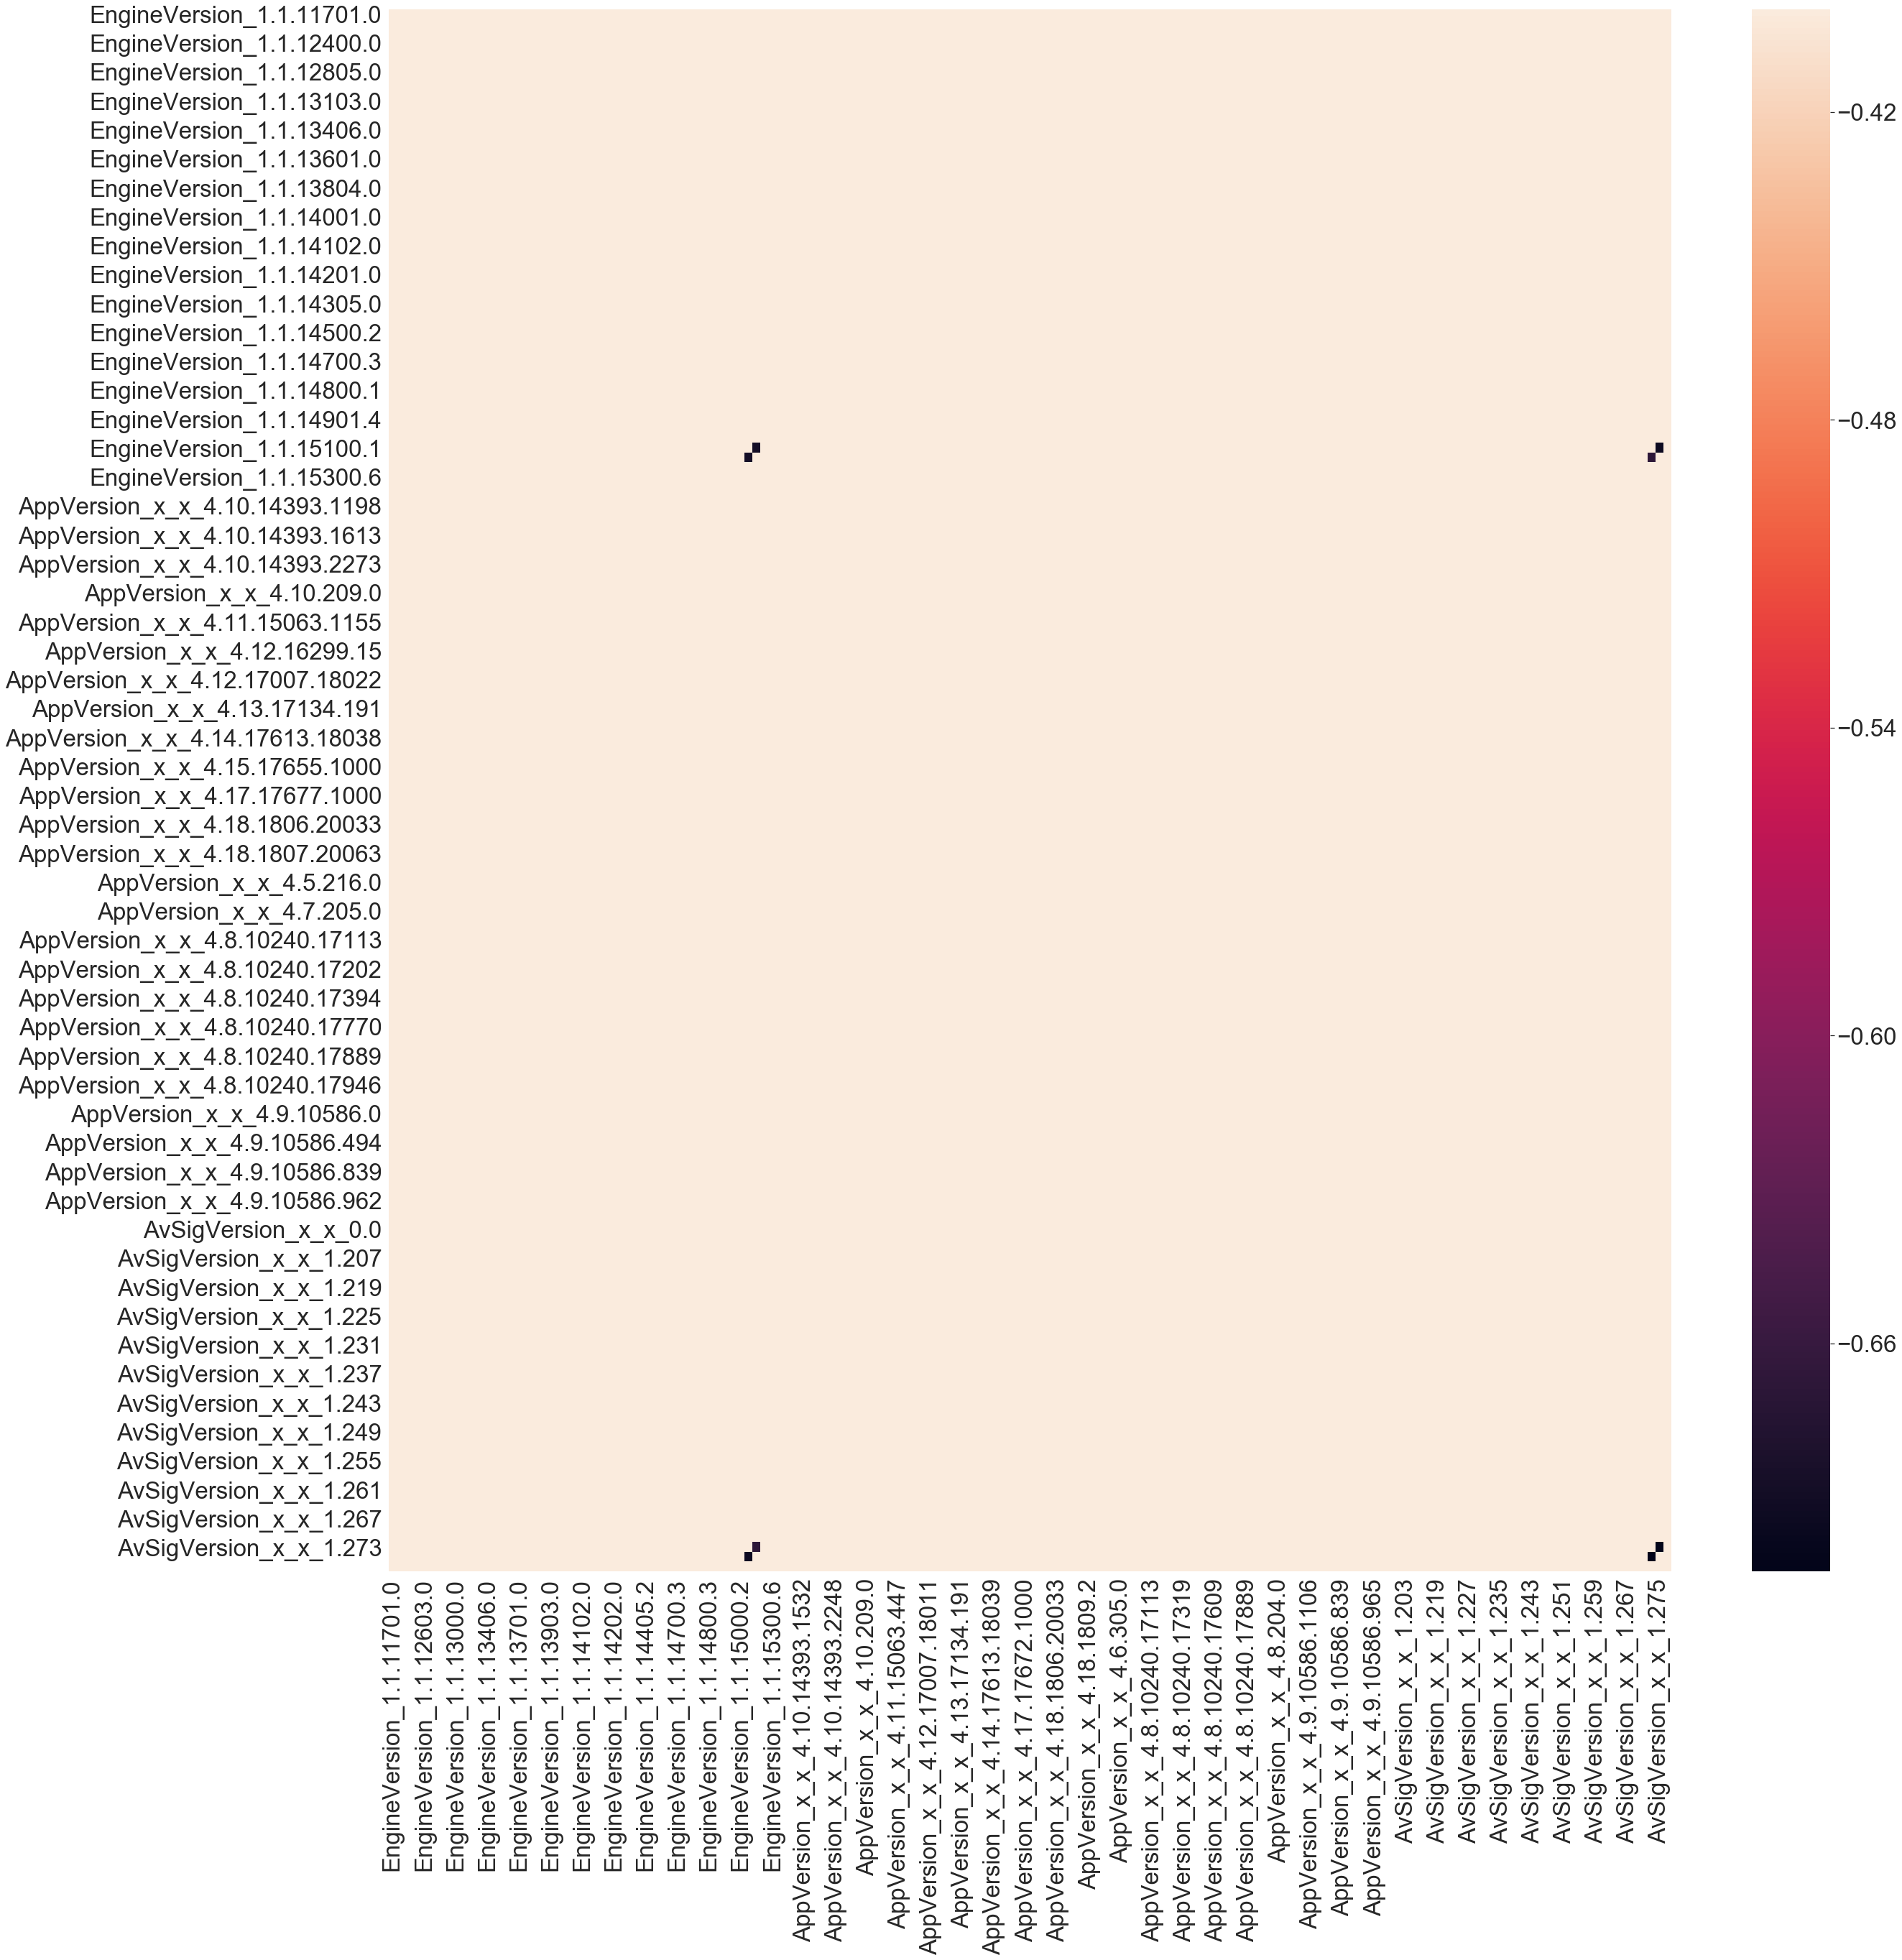

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

malware = pd.read_csv("data/malware.clean.csv")

malware["AvSigVersion_x_x"] = round(malware["AvSigVersion_x_x"],3)

#Get all categories or cast
cols_categorical, cols_numerical, cols_booleans, cols_categorical_large = load_column_array(malware.columns)
malware[cols_categorical] = malware[cols_categorical].astype(object)
malware[cols_categorical_large] = malware[cols_categorical_large].astype(object)

# AppVersion_split = malware["AppVersion"].str.rsplit(pat=".",expand=True)
# malware["AppVersion_x_x"] = AppVersion_split.loc[:,0]+"."+AppVersion_split.loc[:,1]#+"."+AppVersion_split.loc[:,2]

# AvSigVersion_split = subMalware["AvSigVersion"].str.rsplit(pat=".",expand=True)
# malware["AvSigVersion_x_x"] = AvSigVersion_split.loc[:,0]+"."+AvSigVersion_split.loc[:,1]


EngineVersion = pd.get_dummies(malware["EngineVersion"],prefix="EngineVersion")
AppVersion = pd.get_dummies(malware["AppVersion"],prefix="AppVersion_x_x")
AvSigVersion_x_x = pd.get_dummies(malware["AvSigVersion_x_x"],prefix="AvSigVersion_x_x")


df = pd.concat(
    (
        EngineVersion,
        AppVersion,
        AvSigVersion_x_x
    ), axis=1
)

corr = df.corr()

sns.set(font_scale=3)
fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(corr, ax=ax, vmax=-0.4)
plt.show()

[Back to Data Understanding 2](#Data_Understanding_2)
### Defender Version Details<a id="Defender_Versioning"></a>
While researching different builds of Defender, we learned there is the version of the actual Application, **AppVersion**, along with definition version to detect Malware, **AvSigVersion**, and Engine Version **EngineVersion**.  In order to understand its relationship between detections, we compared combinations of different versions.  Visually the 2 largest groups of version combinations has the make chance for an attack.  This may be an indication that attackers know what the adoption rate for versions and targeting these versions.

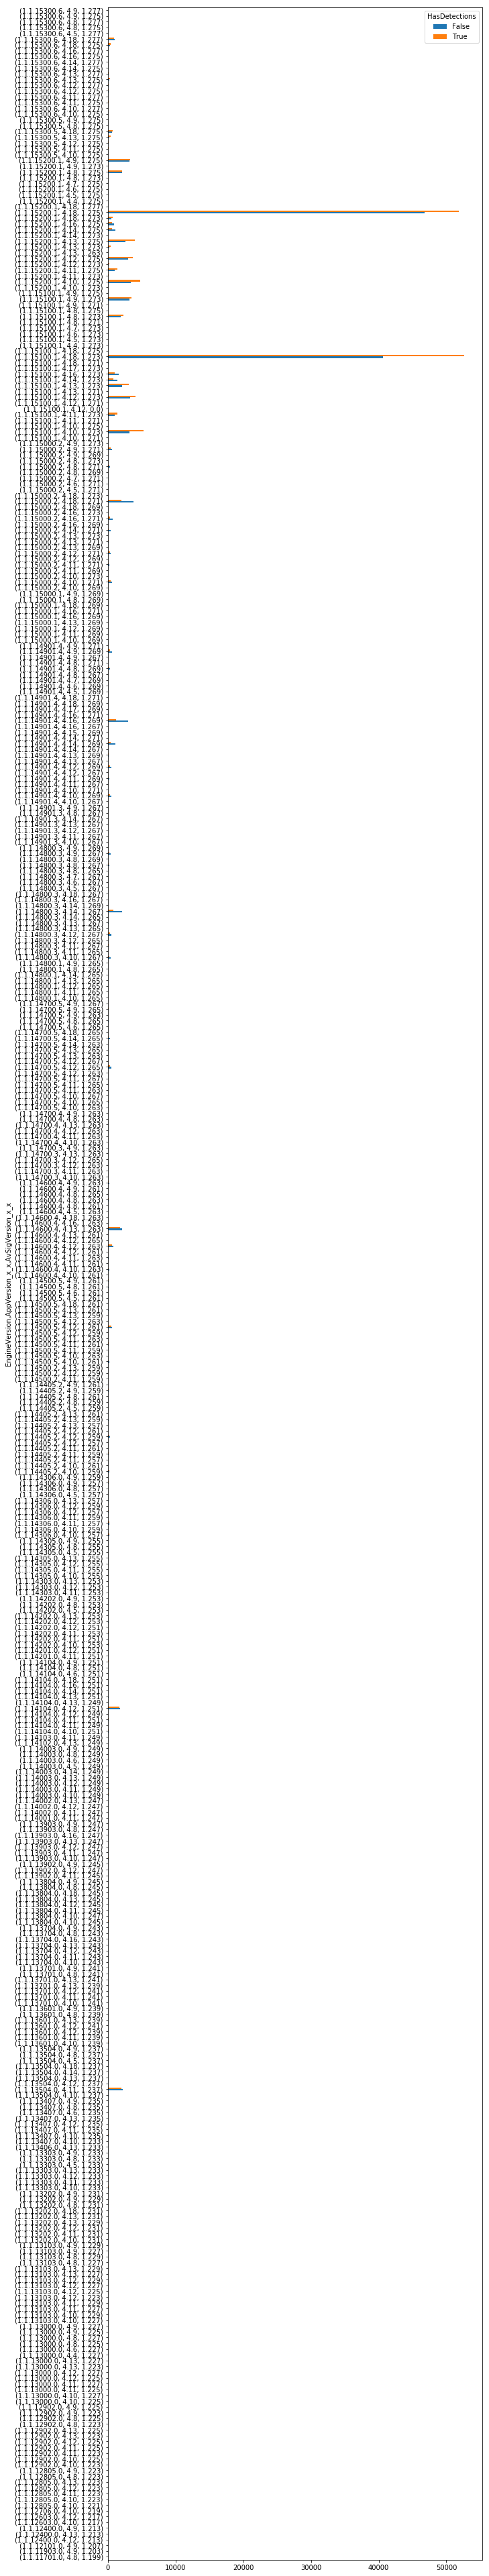

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

malware = pd.read_csv("data/malware.clean.csv")

AppVersion_split = malware["AppVersion"].str.rsplit(pat=".",expand=True)
malware["AppVersion_x_x"] = AppVersion_split.loc[:,0]+"."+AppVersion_split.loc[:,1]#+"."+AppVersion_split.loc[:,2]

malware["AvSigVersion_x_x"] = round(malware["AvSigVersion_x_x"],3)

defenders = pd.crosstab(
    [
        malware["EngineVersion"],
        malware["AppVersion_x_x"],
        malware["AvSigVersion_x_x"]
    ], 
    malware.HasDetections.astype(bool)
)

defenders.plot(kind='barh',stacked=False, figsize = (10,70), fontsize = 10)

[Back to Data Understanding 2](#Data_Understanding_2)
### Hardware Configurations<a id="Hardware_Configurations"></a>

Hardware configuration is investigated for joint attributes exploration. Correlation among various hardware configurations are analyzed. 

Interesting relationship is also found between machine's **FormFactor** to **ProcessorCoreCount**, **PrimaryDiskTotalCapacity**, **SystemVolumeTotalCapacity**, **TotalPhysicalRAM**, **InternalPrimaryDiagonalDisplaySizeInInches**, and **TotalResolution**.  By focusing of the median values of the mentioned Hardware configuration, classification can be made for machine Form Factor.

In [70]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set(style="ticks", color_codes=True)

malware = pd.read_csv("data/malware.clean.csv")

#Get all categories or cast
cols_categorical, cols_numerical, cols_booleans, cols_categorical_large = load_column_array(malware.columns)
malware[cols_categorical] = malware[cols_categorical].astype(object)
malware[cols_categorical_large] = malware[cols_categorical_large].astype(object)

df = subMalware[np.append("Census_MDC2FormFactor",cols_numerical)].copy()
# df["Census_MDC2FormFactor"] = final["Census_MDC2FormFactor"]

# # Apply Log Transformation
df["Census_SystemVolumeTotalCapacity"] = np.log(df.Census_SystemVolumeTotalCapacity)
df["Census_TotalPhysicalRAM"] = np.log(df.Census_TotalPhysicalRAM)
df["Census_PrimaryDiskTotalCapacity"] = np.log(df.Census_PrimaryDiskTotalCapacity)

# Simplify columns names for easier visual analysis 
df.columns = [col.split("_",1)[1] for col in df.columns]

df.rename(index=str, columns={"InternalPrimaryDisplayResolutionHorizontal": "H_Resolution", 
                              "InternalPrimaryDisplayResolutionVertical": "V_Resolution",
                              "InternalPrimaryDiagonalDisplaySizeInInches": "DisplaySize"}, inplace=True)


<a id="Pairwise"></a>
Below scatter plot shows the relationship among all numerical features which are basically consists of Machine configuration: **Processor Count**, **Primary Disk Total Capacity**, **System Volume Total Capacity**, **Total Physical RAM**, **InternalPrimaryDiagonalDisplaySizeInInches**, **InternalPrimaryDisplayResolutionHorizontal**, and **InternalPrimaryDisplayResolutionVertical**.

The resolution features **InternalPrimaryDisplayResolutionHorizontal** and **InternalPrimaryDisplayResolutionVertical** is highly correlated.  In order to adjust for its correlation, we will create a new variable **TotalResolution** by multiplying the 2 values. 

There is also correlation between **SystemVolumeTotalCapacity** and **PrimaryDiskTotalCapacity**.  There also appears to be an outlier where Primary Volume is Less then System Volume.  Since both Disk Capacity values are correlated, we will select **PrimaryDiskTotalCapacity** during our modeling.

As expected as well as a relationship between **Census_ProcessorCoreCount** and **Census_TotalPhysicalRAM**.  The majority of the data is exteremly right skewed therefore the data needed to be log transformed.  Addtionaly, the visual showing of "zebra" stripes indicate this data may be better suited as a categorical variable.

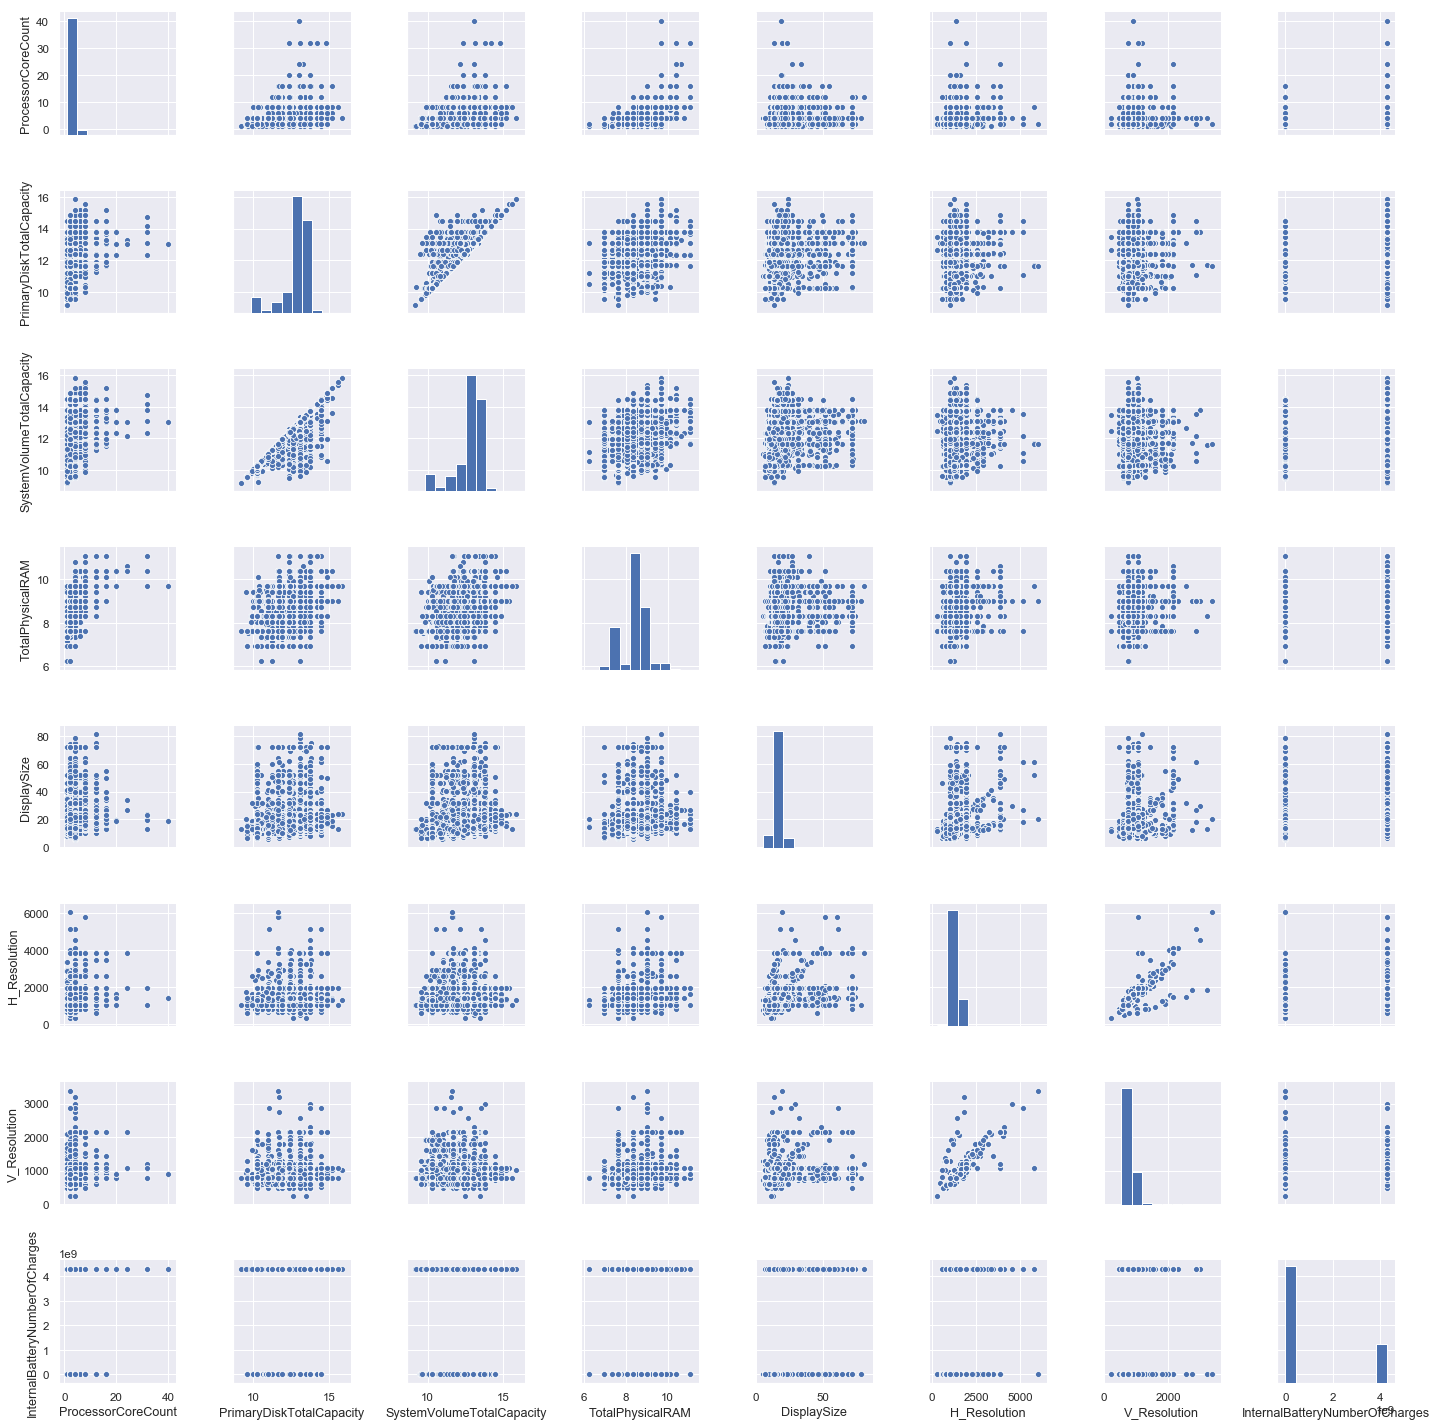

In [71]:
sns.set(font_scale=1.05)
sns.pairplot(df)
plt.show()

#### Form Factor Classification ###
By focusing of the median values of the mentioned Hardware configuration, classification can be made for machine Form Factor.

In [73]:
df_grouped = df.groupby("MDC2FormFactor").agg({
    "ProcessorCoreCount":"median",
    "PrimaryDiskTotalCapacity":"median",
    "TotalPhysicalRAM":"median",
    "DisplaySize":"median",
    "TotalDisplayResolution":"median"
})
df_grouped

ProcessorCoreCount  PrimaryDiskTotalCapacity  \
MDC2FormFactor                                                 
AllInOne                       2.0                 13.768282   
Convertible                    4.0                 13.075146   
Desktop                        4.0                 13.075146   
Detachable                     4.0                 10.303069   
LargeServer                    8.0                 11.425070   
LargeTablet                    4.0                 10.302935   
MediumServer                  12.0                 12.338644   
Notebook                       2.0                 13.075146   
PCOther                        4.0                 11.648094   
SmallServer                    4.0                 13.768248   
SmallTablet                    4.0                 10.302935   

                TotalPhysicalRAM  DisplaySize  TotalDisplayResolution  
MDC2FormFactor                                                         
AllInOne                8.317766         19.5               1440000.0  
Convertible             8.317766         13.2               1049088.0  
Desktop                 8.317766         18.9               1296000.0  
Detachable              7.624619         10.3               1024000.0  
LargeServer             9.357426         15.2               1048576.0  
LargeTablet             7.624619         11.6               1049088.0  
MediumServer            9.704061         18.9               1049088.0  
Notebook                8.317766         14.0               1049088.0  
PCOther                 7.624619         14.0               1049088.0  
SmallServer             9.234057         17.1               1044480.0  
SmallTablet             6.931472          8.0               1024000.0

[Back to Data Understanding 2](#Data_Understanding_2)
### Principal Component Analysis<a id="PCA_Analysis"></a>
1. Scale the data with `MixMaxScaler` due to the high number of categorical variables in conjuction with continous.  We wanted to scale the values between 0 and 1
2. Fit the PCA Model
3. Plot the first 10 and detailed view of the first 4 components

#### 1. MinMaxScaler
We have decided to perform a PCA on the following features
* `cols_categorical`
* `cols_booleans`
* `cols_numerical`

*The analysis is done with our sampled data set `sample_model_data`.*

In [82]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Scale Data
sample_model_data = pd.read_csv("data/model_data.sample.csv")
X = MinMaxScaler().fit_transform(sample_model_data)

pd.set_option('max_colwidth', sample_model_data.shape[1])
df = pd.DataFrame(X, columns=sample_model_data.columns.values)
display(df.describe())
pd.reset_option('max_colwidth')

Unnamed: 0  Census_IsSecureBootEnabled  Wdft_IsGamer  \
count  66582.000000                66582.000000  66582.000000   
mean       0.500000                    0.579736      0.202442   
std        0.288682                    0.493605      0.401823   
min        0.000000                    0.000000      0.000000   
25%        0.250000                    0.000000      0.000000   
50%        0.500000                    1.000000      0.000000   
75%        0.750000                    1.000000      0.000000   
max        1.000000                    1.000000      1.000000   

       Census_ProcessorCoreCount  Census_PrimaryDiskTotalCapacity  \
count               66582.000000                     66582.000000   
mean                    0.056062                         0.563448   
std                     0.039048                         0.141028   
min                     0.000000                         0.000000   
25%                     0.025641                         0.513402   
50%                     0.076923                         0.580868   
75%                     0.076923                         0.685653   
max                     1.000000                         1.000000   

       Census_TotalPhysicalRAM  \
count             66582.000000   
mean                  0.446149   
std                   0.114884   
min                   0.000000   
25%                   0.428571   
50%                   0.428571   
75%                   0.571429   
max                   1.000000   

       Census_InternalPrimaryDiagonalDisplaySizeInInches  \
count                                       66582.000000   
mean                                            0.136564   
std                                             0.064831   
min                                             0.000000   
25%                                             0.110818   
50%                                             0.131926   
75%                                             0.133245   
max                                             1.000000   

       Census_InternalBatteryNumberOfCharges  TotalDisplayResolution  \
count                           66582.000000            66582.000000   
mean                                0.251314                0.059776   
std                                 0.433772                0.026075   
min                                 0.000000                0.000000   
25%                                 0.000000                0.051532   
50%                                 0.000000                0.051532   
75%                                 1.000000                0.051532   
max                                 1.000000                1.000000   

       EngineVersion_1.1.11701.0  ...  \
count               66582.000000  ...   
mean                    0.000015  ...   
std                     0.003875  ...   
min                     0.000000  ...   
25%                     0.000000  ...   
50%                     0.000000  ...   
75%                     0.000000  ...   
max                     1.000000  ...   

       Census_OSWUAutoUpdateOptionsName_DownloadNotify  \
count                                     66582.000000   
mean                                          0.001081   
std                                           0.032867   
min                                           0.000000   
25%                                           0.000000   
50%                                           0.000000   
75%                                           0.000000   
max                                           1.000000   

       Census_OSWUAutoUpdateOptionsName_FullAuto  \
count                               66582.000000   
mean                                    0.349704   
std                                     0.476880   
min                                     0.000000   
25%                                     0.000000   
50%                                     0.000000   
75%                                     1.00000

(66582, 373)


#### 2. Fit the PCA
Below is our PCA for the `sample_model_data`

40% of variance explained by 6 principal conponents
60% of variance explained by 12 principal conponents
80% of variance explained by 25 principal conponents
95% of variance explained by 54 principal conponents
99% of variance explained by 101 principal conponents


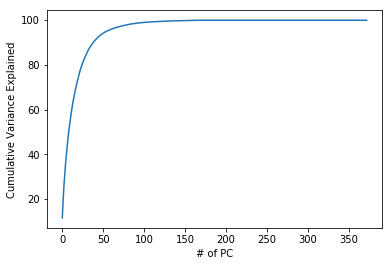

In [94]:
import pickle
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

filename = "models/PCA.pckl"
config = Path(filename)
if not config.is_file():
    pca = PCA(n_components=X.shape[1])
    pca_data = pca.fit(X)
    pickle.dump(pca, open(filename, 'wb'))
else:
    pca = pickle.load(open(filename, 'rb'))

pca_data = pca.transform(X)

# pca_expl_var = pca.explained_variance_ratio_
pca_sum = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4 ) * 100 )
plt.plot(pca_sum)
plt.xlabel('# of PC')
plt.ylabel('Cumulative Variance Explained')

print( "40% of variance explained by {0} principal conponents".format(sum(pca_sum <= 40)) )
print( "60% of variance explained by {0} principal conponents".format(sum(pca_sum <= 60)) )
print( "80% of variance explained by {0} principal conponents".format(sum(pca_sum <= 80)) )
print( "95% of variance explained by {0} principal conponents".format(sum(pca_sum <= 95)) )
print( "99% of variance explained by {0} principal conponents".format(sum(pca_sum <= 99)) )

#Save PCA
np.savetxt("data/PCA.csv", pca_data, delimiter=",")

Our PCA performed fairly well for deminsion reduction.  We were able to capture 80% of the variance with 25 features and 95% with 54 features.  Let's see how well they cluster based on the **HasDetection** response variable.

In [11]:
# prep data
import numpy as np
import pandas as pd

pca_data = np.loadtxt("data/PCA.csv",delimiter=",")
submalware = pd.read_csv("data/malware.subsample.csv")
response_data = submalware["HasDetections"]

df_pca_top_ten = pd.DataFrame(X_pca[:,:10])
df_pca_top_ten.columns = ['PC1','PC2', 'PC3', 'PC4','PC5', 'PC6','PC7', 'PC8','PC9','PC10']
df_pca_top_ten['HasDetections'] = response_data.values

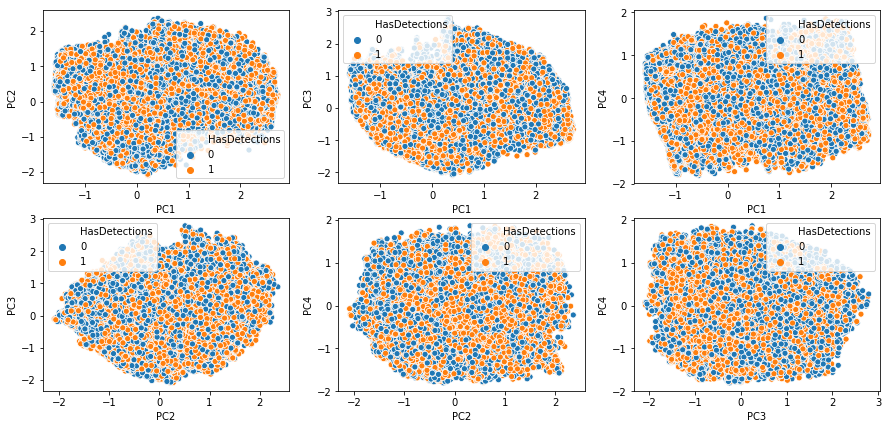

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax =plt.subplots(2,3,figsize=(15,7))
pc1_pc2 = sns.scatterplot(x="PC1", y="PC2", hue="HasDetections", data=df_pca_top_ten, ax=ax[0,0])
pc1_pc3 = sns.scatterplot(x="PC1", y="PC3", hue="HasDetections", data=df_pca_top_ten, ax=ax[0,1])
pc1_pc4 = sns.scatterplot(x="PC1", y="PC4", hue="HasDetections", data=df_pca_top_ten, ax=ax[0,2])
pc2_pc3 = sns.scatterplot(x="PC2", y="PC3", hue="HasDetections", data=df_pca_top_ten, ax=ax[1,0])
pc2_pc4 = sns.scatterplot(x="PC2", y="PC4", hue="HasDetections", data=df_pca_top_ten, ax=ax[1,1])
pc3_pc4 = sns.scatterplot(x="PC3", y="PC4", hue="HasDetections", data=df_pca_top_ten, ax=ax[1,2])

The PCA did not indentify a clean seperation between machines with dections versus machines without detections.  Below is the PCA on the first 10 principal components.  PC1 does show some seperation in the edges that could mean there is a possibility for cluster.

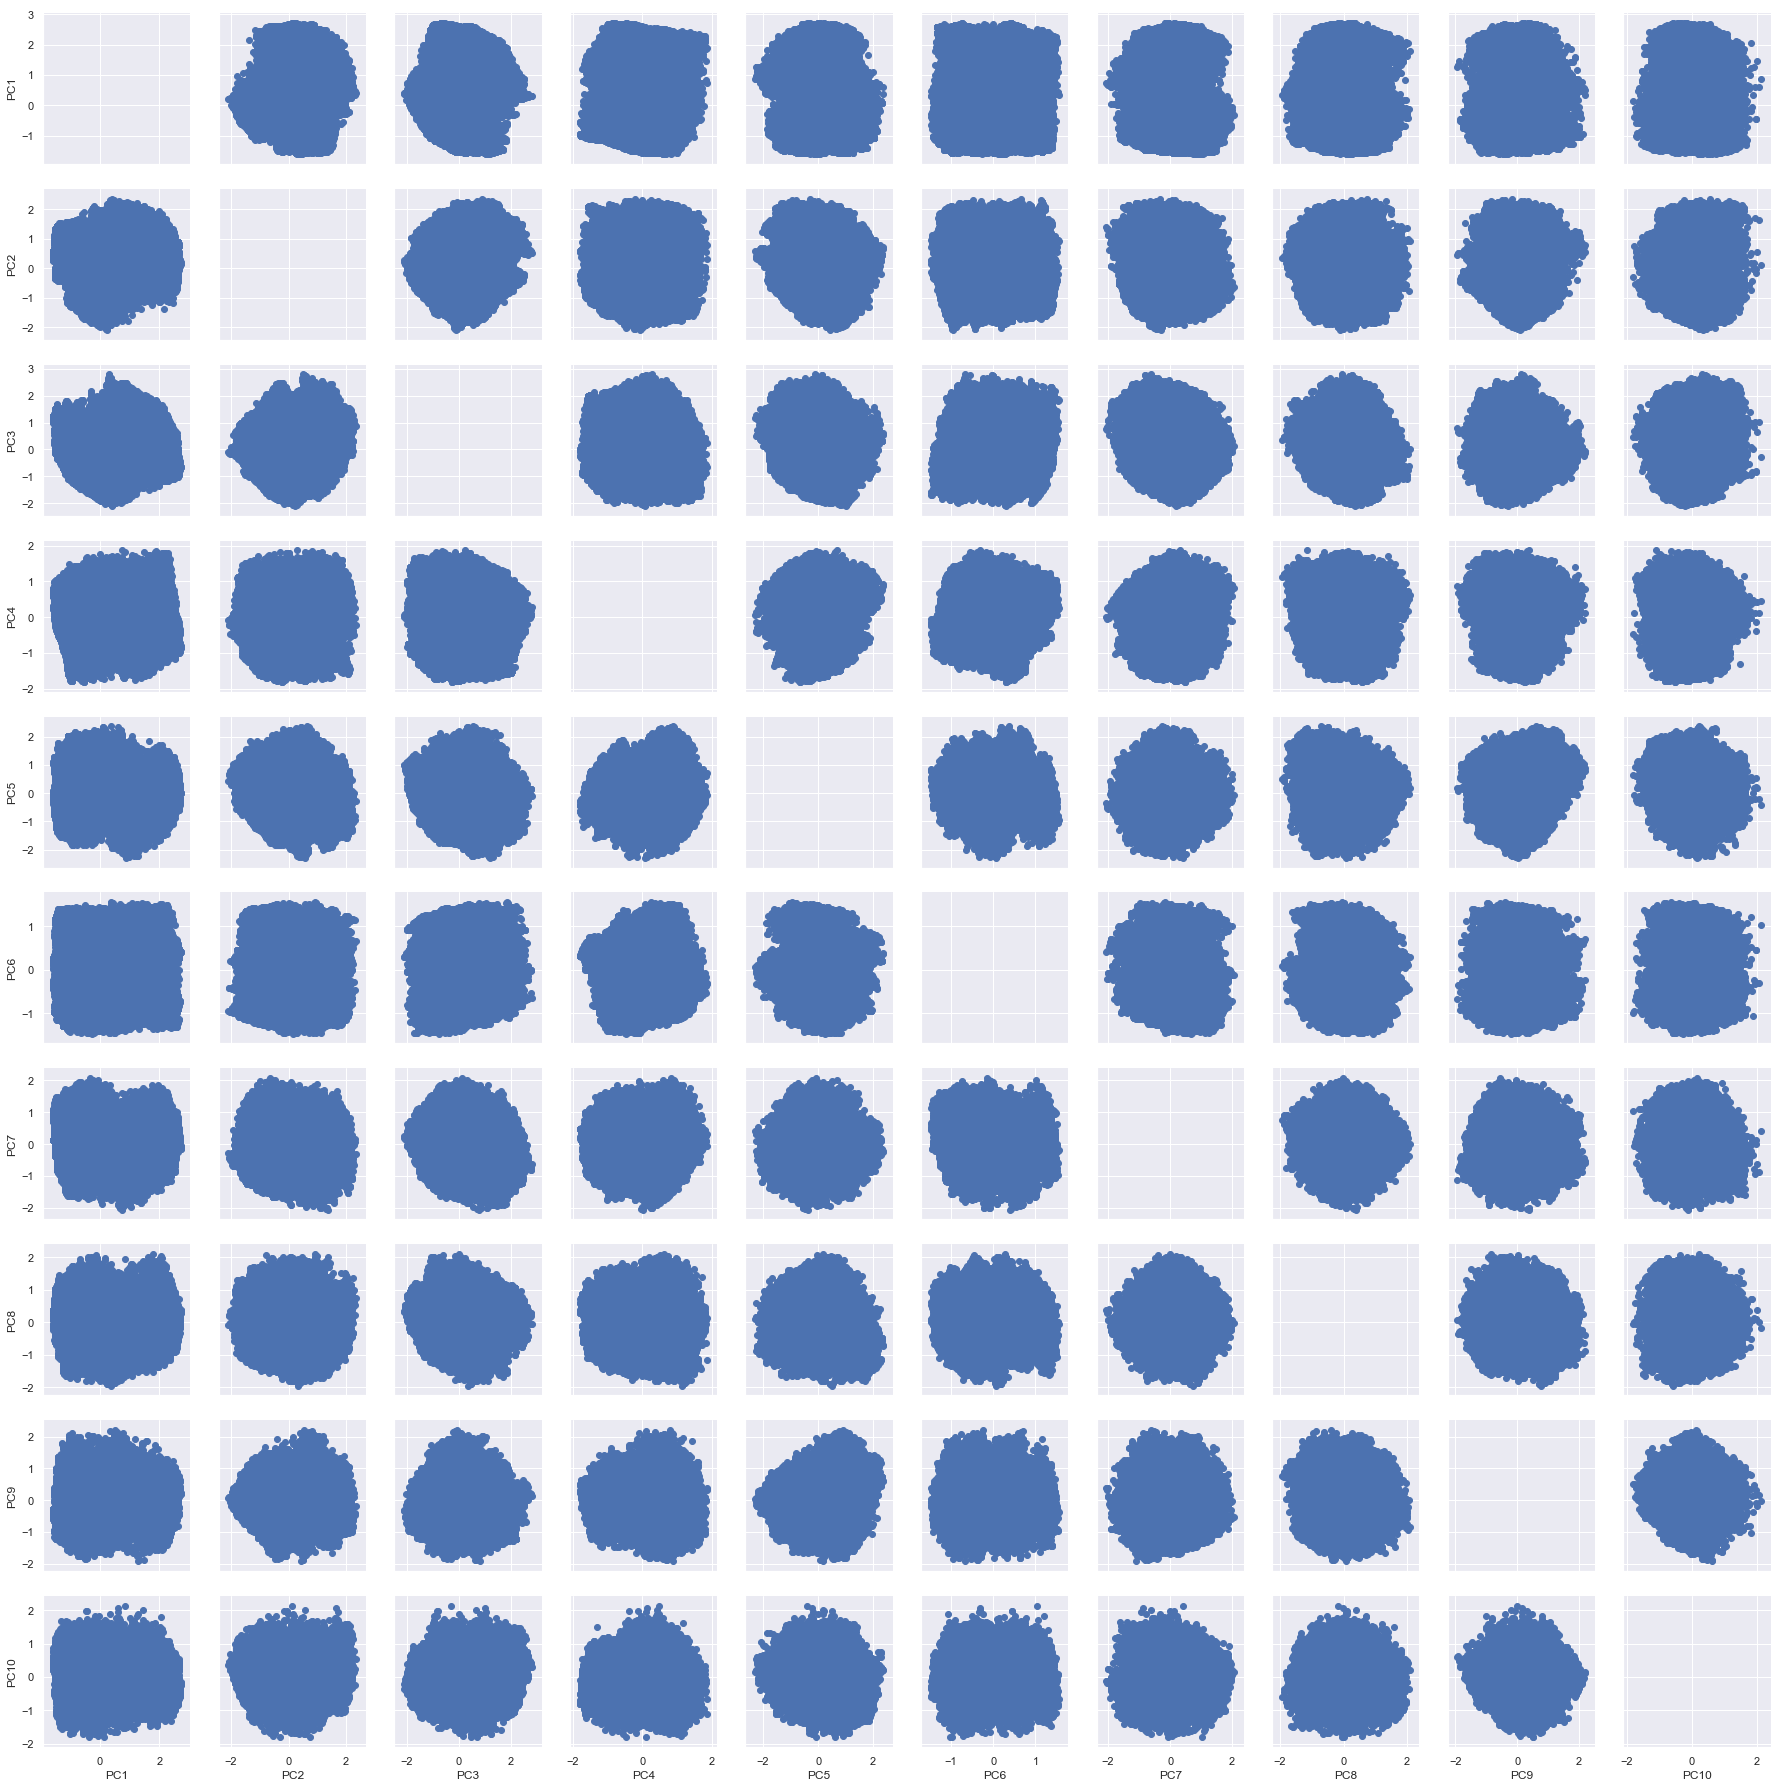

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)

g = sns.PairGrid(df_pca_top_ten.iloc[:,:10])
g = g.map_offdiag(plt.scatter)
# g = g.map_diag(plt.hist)

### Additional Analysis<a id="Additional_Analysis"></a>

#### AvSigVersion
In the analysis, <b>AvSigVersion</b> shows the majority of machines using the latest 2 of the 3 builds (1.275 & 1.273).  Domain knowledge would tell us that new definition set would have the latest detections for malware, but data tells us otherwise.

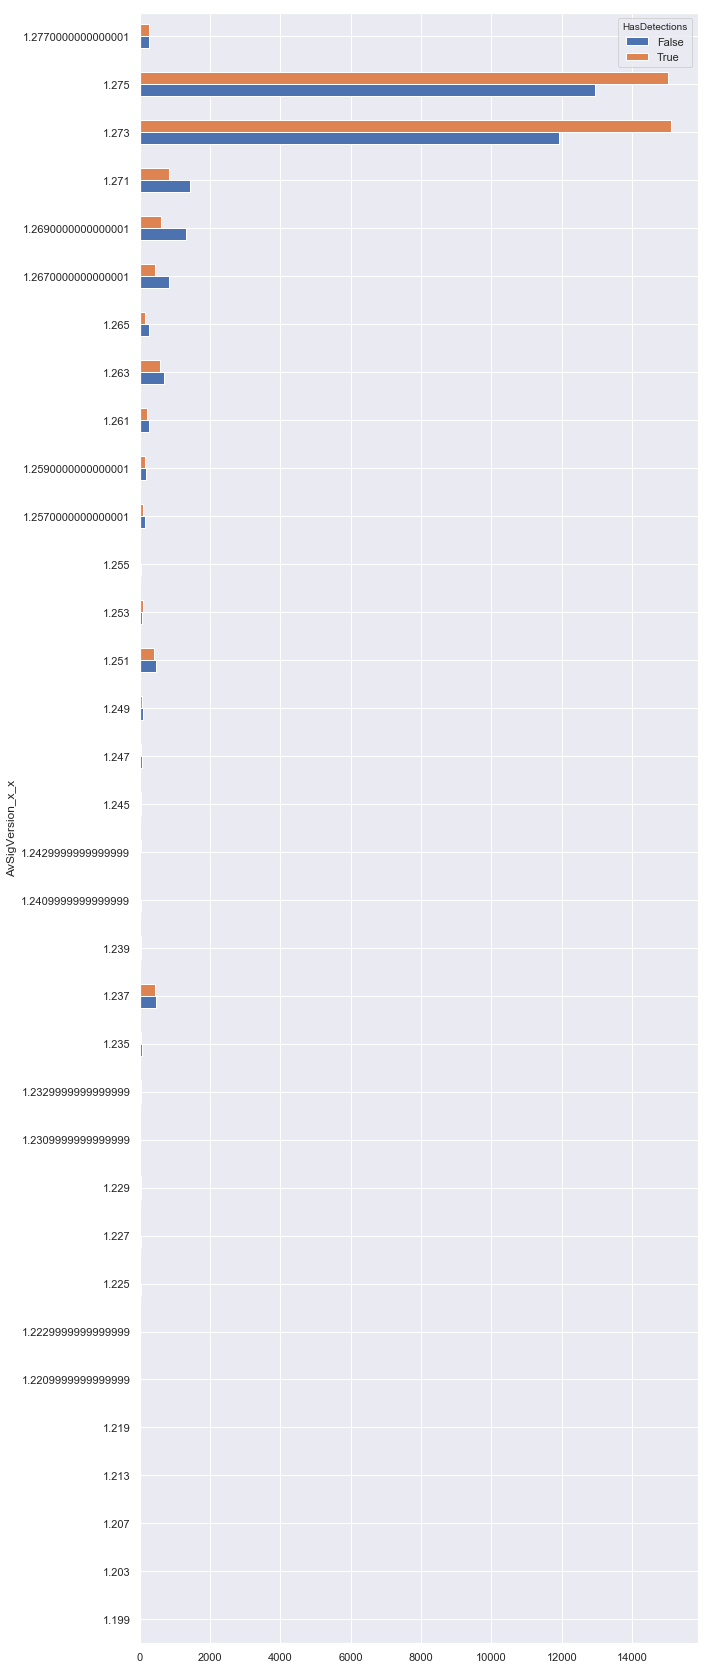

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns



av_sig = pd.crosstab(
    [
        subMalware["AvSigVersion_x_x"].astype(object)
    ], 
    subMalware.HasDetections.astype(bool)
)

av_sig.plot(kind='barh' , figsize = (10,30))

#### AVProductsInstalled

The below plot for shows that **AVProductsInstalled** cateogory value 1 and 2 have different success rate for attacks on the machine.  We do believe this data is ordinal and related to the level of support the AV has or another competetive product. However, Microsoft did not release this information.

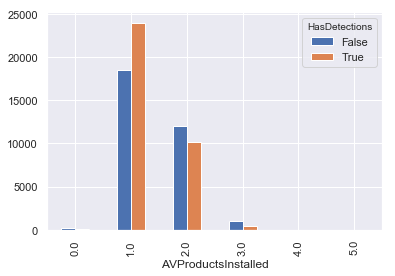

In [67]:
av_enabled = pd.crosstab(
    [
        subMalware["AVProductsInstalled"]
    ], 
    subMalware.HasDetections.astype(bool)
)

av_enabled.plot(kind='bar')# , figsize = (10,30))

#### Smart Screen
Smart screen is a feature offered on Defender that helps block malware through your web browser.  The data provided had 6 categories, however the Defender application only shows "Block", "Warn", or "Off".  We plotted the data again showing the percentage of machines enabling Smart Screen who had dections on their machine for malware.

The chance of a succesful comromise with Malware in Enable mode decreases by about 50% as compared to without SmartScreen enabled.

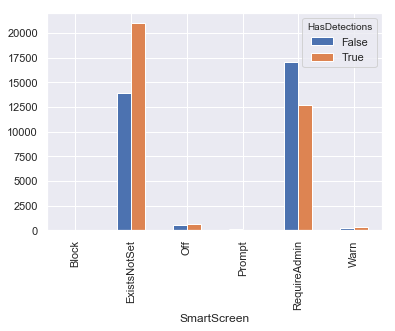

In [68]:
snart_screen = pd.crosstab(
    [
        subMalware["SmartScreen"]
    ], 
    subMalware.HasDetections.astype(bool)
)

snart_screen.plot(kind='bar')# , figsize = (10,30))

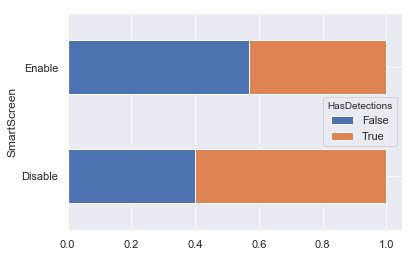

In [69]:
final_save=subMalware.copy()
df_ss=final_save[['SmartScreen','HasDetections']].copy()

df_ss.SmartScreen.replace({"Block":"Enable","ExistsNotSet":"Disable","Off" :"Disable",
                                "Prompt" :"Enable","RequireAdmin":"Enable","Warn":"Enable"},inplace=True)

df_ss.SmartScreen.value_counts()
df_grouped_ss=df_ss.groupby(by=['SmartScreen'])
detection_rate_ss=df_grouped_ss.HasDetections.sum()/df_grouped_ss.HasDetections.count()

ss = pd.crosstab(
    [df_ss["SmartScreen"].astype(object)], 
    df_ss.HasDetections.astype(bool))

ss_rate=ss.div(ss.sum(1).astype(float),axis=0)
ss_rate.plot(kind='barh',stacked=True)

### Explore Attributes and Class

#### Diskspace & Memory compared to Devices

Further details from the boxplots, the density of Detections for Diskspace and Memory was analyzed..  In the violin plot for <b>Census_TotalPhysicalRAM</b> . We can visually see that Median server, as the memory increases there is a higher likely hood of vulnerability.  The remaining servers, with the exception of Large (low detections), memory is not a high factor between detections. The feature <b>Census_PrimaryDiskTotalCapacity</b> also shows a similar pattern, where if you are a server with more diskspace you are more likely to be attacked by malware.

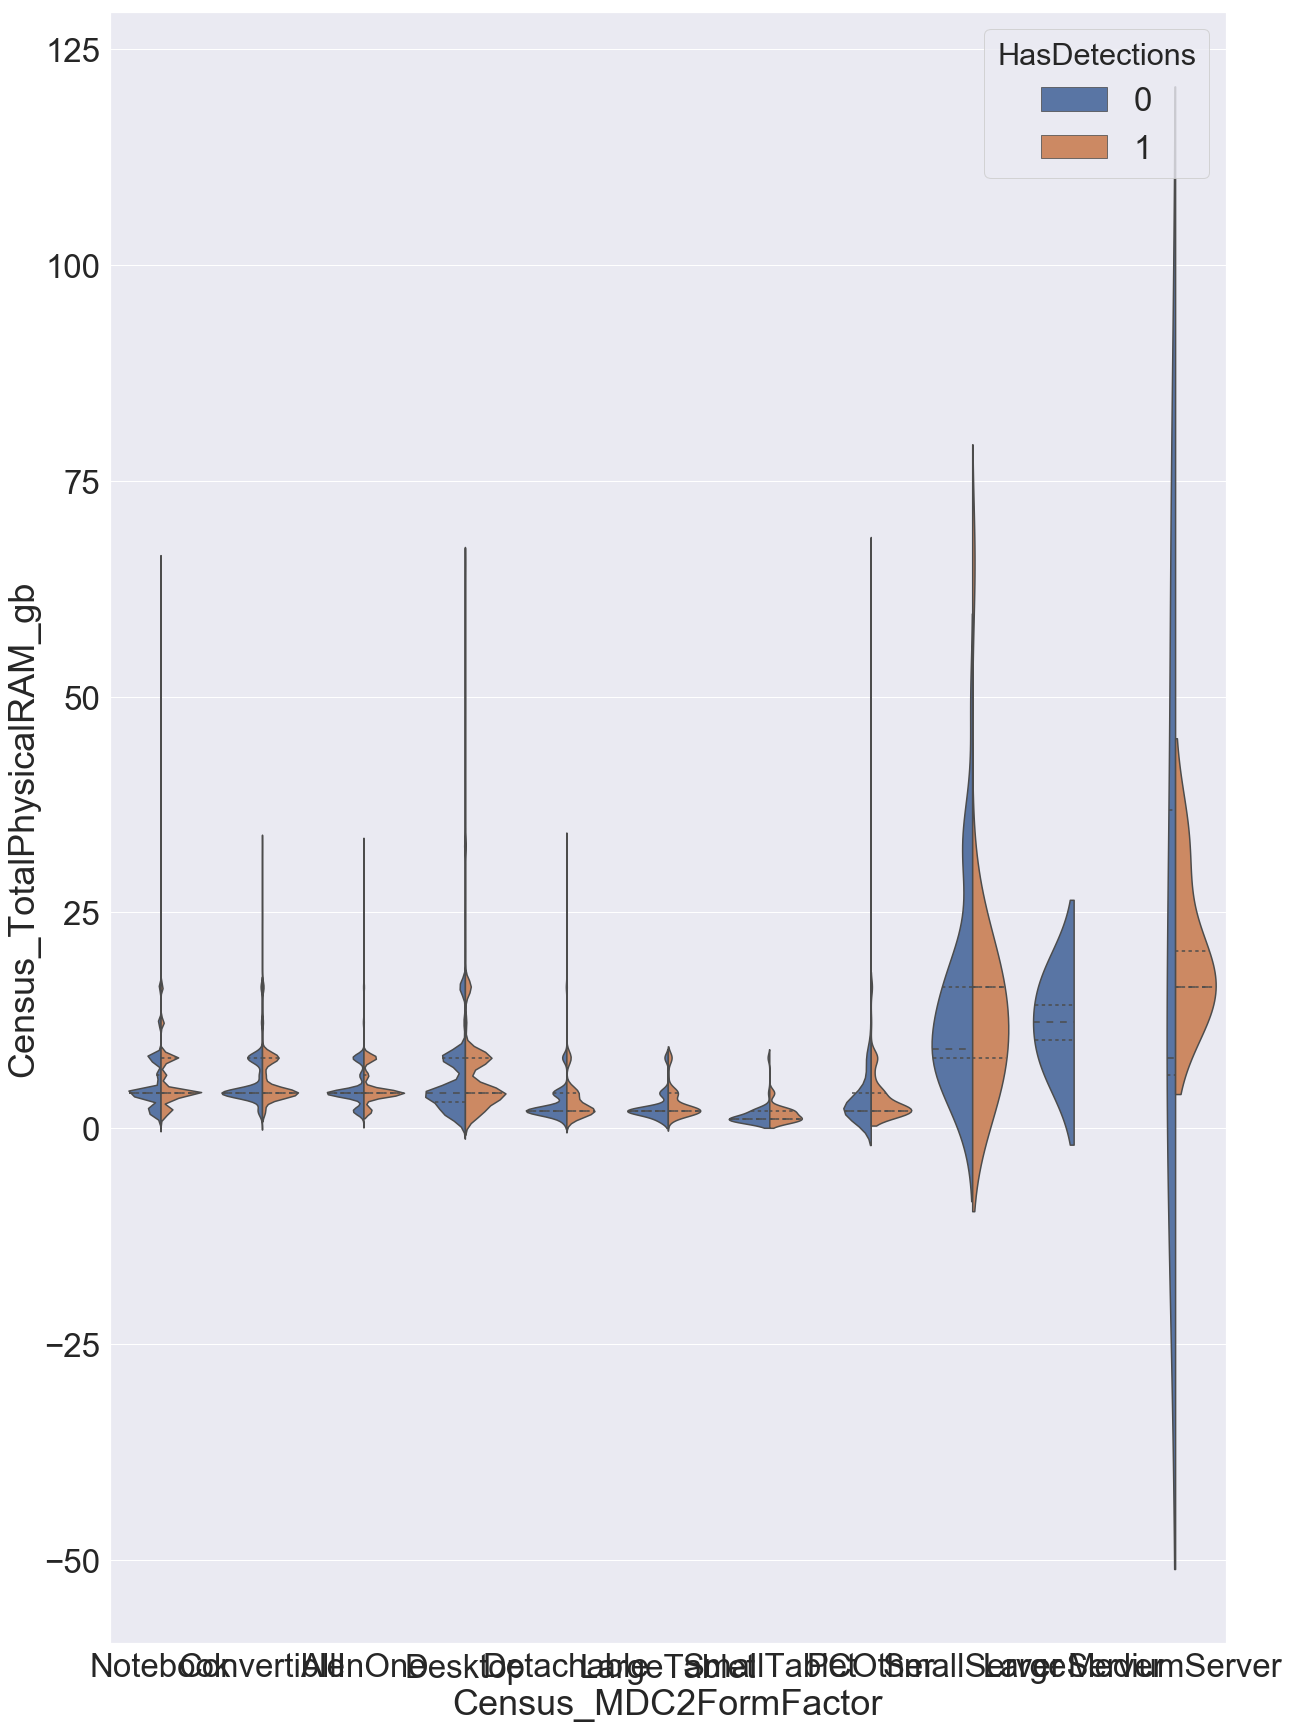

In [93]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(20,30))

subMalware["Census_TotalPhysicalRAM_gb"] = subMalware.Census_TotalPhysicalRAM / 1000

sns.violinplot(x="Census_MDC2FormFactor", y="Census_TotalPhysicalRAM_gb", hue="HasDetections", data=subMalware, 
               split=True, inner="quart")

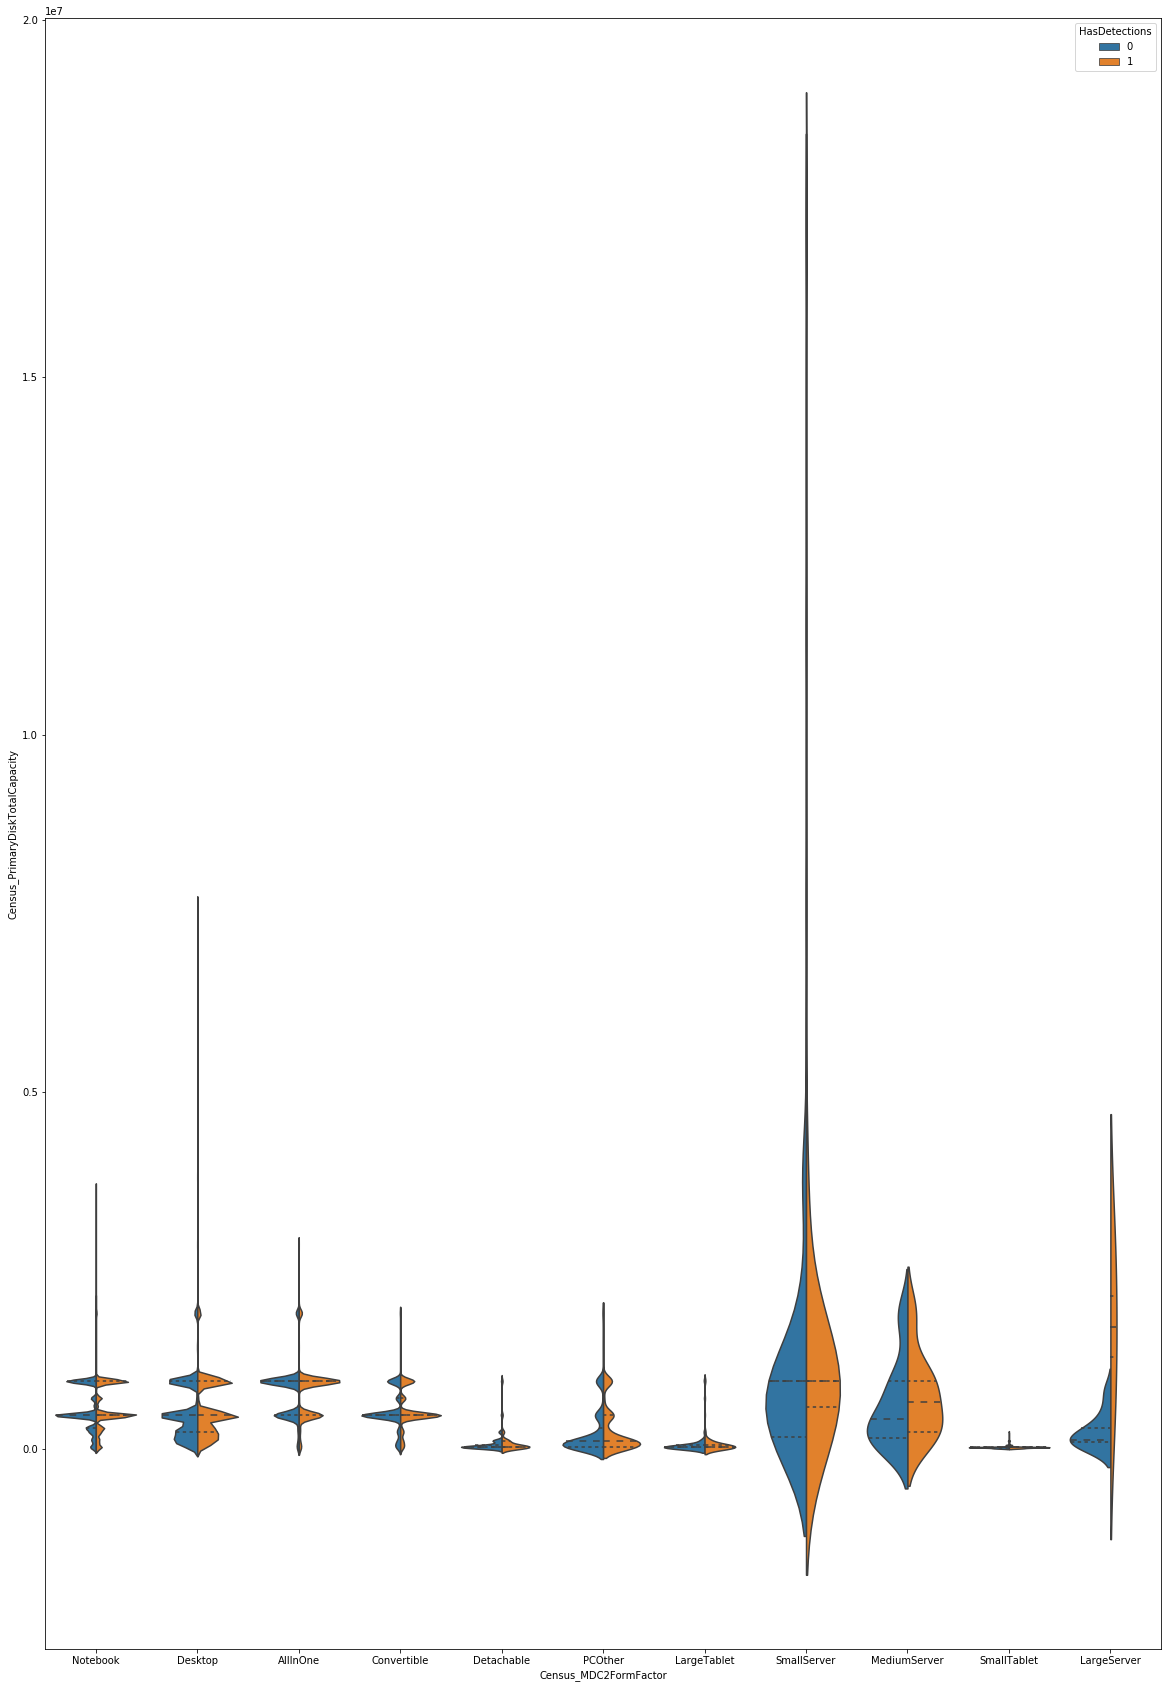

In [236]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(20,30))
sns.violinplot(x="Census_MDC2FormFactor", y="Census_PrimaryDiskTotalCapacity", hue="HasDetections", data=final, 
               split=True, inner="quart")

#### Antivirus and Firewall

Through domain knowledge we know firewall is important to prevent attacks.  In order to visualize if a Firewall is an important feature, we grouped the variable **Firewall** with **AVProductsEnabled** to determine its effectiveness.  The rate for each group is very similar.  This is because user behavior indicates more attacks are done by downloads versus straight attacks on the operating system.

[Top](#Top)
[Business Understanding](#Business_Understanding)
[Data Understanding 1](#Data_Understanding_1)
[Data Understanding 2](#Data_Understanding_2)<br>
[Modeling and Evaluation 1](#ME_1)
[Modeling and Evaluation 2](#ME_2)
[Modeling and Evaluation 3](#ME_3)
[Modeling and Evaluation 4](#ME_4)<br>
[Deployment](#Deployment)
[Exceptional Work](#Exceptional_Work)

# Modeling and Evaluation 1 (Train and Adjust Parameters)<a id="ME_1"></a>


In this section, we explore the clustering on **defender version and OS version**. **K-mode** is used for this effort because 100% of the data is categorical. The team uses silhoutte score and cost score from the K-mode to determine the optimum number of cluster. To validate the clusters created, the comparison to the ground truth (feature "HasDectection") will be performed. This validation technique will provide insight to the user if a certain defender version or OS version is more prone to be attacked or better protected.<br>

K-mode package can be found from here: https://pypi.org/project/kmodes/#huang98

Two sets of clusters are explored here:<br>
1) Defender Version which consists of "EngineVersion", "AppVersion", "AvSigVersion_x_x" <br>
2) OS Version which consists of "OS_Build", "OS_Branch", "OS_BuildNumber", "OS_Version" and "OS_BuildVersion".<br>

We are exploring correlation between clustered Defender Version and OS Version to the possibility of malware detection.



In [24]:
%%time
import pickle
from pathlib import Path
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd
import numpy as np

subMalware = pd.read_csv("data/malware.subsample.csv")

defender_versions = get_one_hot_encodings(
    subMalware,
    [
        "EngineVersion",
        "AppVersion",
        "AvSigVersion_x_x"
    ]
)

defender_versions = reduce_features(defender_versions)
defender_versions.to_csv("data/defender_versions.sample.csv",index=False)

print("Total Rows/Features of defender_versions is", defender_versions.shape)

s = int(len(subMalware) * .33)
print("Using a sample size of", s, "to calculate the Silhouette Score.")

defender_versions_result = []
print("==================================")
print("Defender Versions Cluster 2-10 results")
for n in range(2,11):
    filename = 'models/KModes_Defender_n_eq_{0}.pckl'.format(n)
    config = Path(filename)
    if not config.is_file():
        cls = KModes(n_clusters=n, init='Huang', n_jobs=6, n_init=5, random_state=42)
        cls.fit(defender_versions)
        pickle.dump(cls, open(filename, 'wb'))
    else:
        cls = pickle.load(open(filename, 'rb'))
    
    cluster_labels = cls.predict(defender_versions)
    silhouette_avg = silhouette_score(defender_versions, cluster_labels, sample_size=s, random_state=42)
    print("For n_clusters = %d, the average silhouette_score is %f, and cost is %f."
          % (n, silhouette_avg, cls.cost_))
    defender_versions_result.append({
        "n_cluster":n,
        "silhouette_avg":silhouette_avg,
        "cost":cls.cost_
    })
    
result = pd.DataFrame(defender_versions_result)
result.to_csv("data/KModes_defender_versions.csv",index=False)

Total Rows/Features of defender_versions is (66582, 116)
Using a sample size of 21972 to calculate the Silhouette Score.
Defender Versions Cluster 2-10 results
For n_clusters = 2, the average silhouette_score is 0.378645, and cost is 79791.000000.
For n_clusters = 3, the average silhouette_score is 0.452153, and cost is 65483.000000.
For n_clusters = 4, the average silhouette_score is 0.483308, and cost is 62144.000000.
For n_clusters = 5, the average silhouette_score is 0.483351, and cost is 62638.000000.
For n_clusters = 6, the average silhouette_score is 0.541971, and cost is 50517.000000.
For n_clusters = 7, the average silhouette_score is 0.571572, and cost is 43894.000000.
For n_clusters = 8, the average silhouette_score is 0.573155, and cost is 49663.000000.
For n_clusters = 9, the average silhouette_score is 0.556422, and cost is 45418.000000.
For n_clusters = 10, the average silhouette_score is 0.611313, and cost is 43194.000000.
CPU times: user 4min 35s, sys: 32.9 s, total: 5

In [27]:
%%time
import pickle
from pathlib import Path
import pandas as pd
import numpy as np
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_samples, silhouette_score

subMalware = pd.read_csv("data/malware.subsample.csv")

os_versions = get_one_hot_encodings(
    subMalware,
    [
        "OsBuild",
        "Census_OSBranch",
        "Census_OSBuildNumber",
        "Census_OSVersion",
        "Census_OSBuildRevision"
    ]
)

os_versions = reduce_features(os_versions)
os_versions.to_csv("data/os_versions.sample.csv",index=False)

print("Total Rows/Features of os_versions is", os_versions.shape)

s = int(len(subMalware) * .33)
print("Using a sample size of", s, "to calculate the Silhouette Score.")

os_cluster_result = []
print("==================================")
print("OS Versions Cluster 2-20 results")

for n in range(2,21):
    filename = 'models/KModes_OS_n_eq_{0}.pckl'.format(n)
    config = Path(filename)
    if not config.is_file():
        cls = KModes(n_clusters=n, init='Huang', n_jobs=6, n_init=5, random_state=42)
        cls.fit(os_versions)
        pickle.dump(cls, open(filename, 'wb'))
    else:
        cls = pickle.load(open(filename, 'rb'))
    
    cluster_labels = cls.predict(os_versions)
    silhouette_avg = silhouette_score(os_versions, cluster_labels, sample_size=s, random_state=42)
    print("For n_clusters = %d, the average silhouette_score is %f, and cost is %f."
          % (n, silhouette_avg, cls.cost_))
    os_cluster_result.append({
        "n_cluster":n,
        "silhouette_avg":silhouette_avg,
        "cost":cls.cost_
    })
    
result = pd.DataFrame(os_cluster_result)
result.to_csv("data/KModes_os_versions.csv",index=False)

Total Rows/Features of os_versions is (66582, 266)
Using a sample size of 21972 to calculate the Silhouette Score.
OS Versions Cluster 2-20 results
For n_clusters = 2, the average silhouette_score is 0.167721, and cost is 154299.000000.
For n_clusters = 3, the average silhouette_score is 0.167585, and cost is 145251.000000.
For n_clusters = 4, the average silhouette_score is 0.285207, and cost is 115533.000000.
For n_clusters = 5, the average silhouette_score is 0.275393, and cost is 113965.000000.
For n_clusters = 6, the average silhouette_score is 0.299895, and cost is 98491.000000.
For n_clusters = 7, the average silhouette_score is 0.247554, and cost is 103869.000000.
For n_clusters = 8, the average silhouette_score is 0.304943, and cost is 79303.000000.
For n_clusters = 9, the average silhouette_score is 0.289989, and cost is 84224.000000.
For n_clusters = 10, the average silhouette_score is 0.337778, and cost is 77949.000000.
For n_clusters = 11, the average silhouette_score is 0

#### PCA - Developing multiple classification models
Using KMeans we want to determine if seperating our dataset will improve our over all classification score.  In order to achive this, we used the following steps
* Scaled data with `MinMaxScaler`
* Perform PCA Analysis
* Run `KMeans` using `int="KMeans++"'

In [97]:
%%time
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import pickle
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

filename = "models/PCA.pckl"
pca = pickle.load(open(filename, 'rb'))
pca_data = np.loadtxt("data/PCA.csv",delimiter=",")
pca_sum = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4 ) * 100 )

c = sum(pca_sum <= 80)
print("Cluster on the first {0} features from the PCA Analysis".format(c))
X = pca_data[:,:c]
X = StandardScaler().fit_transform(X)

optimal_silhouette_avg = 0

s = int(len(X) * .33)
print("Using a sample size of ", s, "in order to calculat the Silhouette Score.")

for k in [2, 3, 4, 5, 10, 15, 20, 30, 50, 100]:
    kMeans_cls = KMeans(n_clusters=k, init='k-means++',random_state=42, n_jobs=-2)
    cluster_labels = kMeans_cls.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels, sample_size=s, random_state=42)
    print("For n_clusters = %d, the average silhouette_score is %f, and SSE Distance is %f."
          % (k, silhouette_avg, kMeans_cls.inertia_))

Cluster on the first 25 features from the PCA Analysis
Using a sample size of  21972 in order to calculat the Silhouette Score.
For n_clusters = 2, the average silhouette_score is 0.041466, and SSE Distance is 1599903.777831.
For n_clusters = 3, the average silhouette_score is 0.057875, and SSE Distance is 1538192.737533.
For n_clusters = 4, the average silhouette_score is 0.075538, and SSE Distance is 1474079.095587.
For n_clusters = 5, the average silhouette_score is 0.084873, and SSE Distance is 1413536.974081.
For n_clusters = 10, the average silhouette_score is 0.082136, and SSE Distance is 1240998.593283.
For n_clusters = 15, the average silhouette_score is 0.076439, and SSE Distance is 1170872.915939.
For n_clusters = 20, the average silhouette_score is 0.069020, and SSE Distance is 1120184.651928.
For n_clusters = 30, the average silhouette_score is 0.075312, and SSE Distance is 1055482.564237.
For n_clusters = 50, the average silhouette_score is 0.074211, and SSE Distance is 9

After training the models for these clusters, we will evaluate and compare of the best number of clusters for each case.

[Top](#Top)
[Business Understanding](#Business_Understanding)
[Data Understanding 1](#Data_Understanding_1)
[Data Understanding 2](#Data_Understanding_2)<br>
[Modeling and Evaluation 1](#ME_1)
[Modeling and Evaluation 2](#ME_2)
[Modeling and Evaluation 3](#ME_3)
[Modeling and Evaluation 4](#ME_4)<br>
[Deployment](#Deployment)
[Exceptional Work](#Exceptional_Work)

# Modeling and Evaluation 2 (Evaluate and Compare)<a id="ME_2"></a>
## Defender_Versions and OS_Versions

For evaluation and comparison, we use the following methods:
* Compare Silhoutte Score and Cost
* Secondary visualiation on Silhoutte Chart

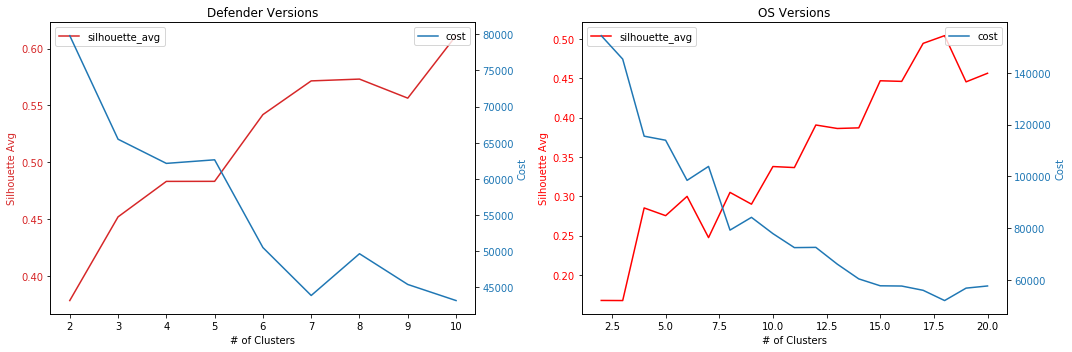

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

result_os_versions = pd.read_csv("data/KModes_os_versions.csv")

t = result_os_versions.n_cluster
data1 = result_os_versions.silhouette_avg
data2 = result_os_versions.cost

fig, (axD, axO) = plt.subplots(1,2, figsize=(15,5))

color = 'red'
axO.set_xlabel('# of Clusters')
axO.set_ylabel('Silhouette Avg', color=color)
axO.plot(t, data1, color=color)
axO.tick_params(axis='y', labelcolor=color)
axO.legend(loc=0)

ax2 = axO.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Cost', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc=0)

axO.set_title("OS Versions")

result_defender_versions = pd.read_csv("data/KModes_defender_versions.csv")
t = result_defender_versions.n_cluster
data1 = result_defender_versions.silhouette_avg
data2 = result_defender_versions.cost

color = 'tab:red'
axD.set_xlabel('# of Clusters')
axD.set_ylabel('Silhouette Avg', color=color)
axD.plot(t, data1, color=color)
axD.tick_params(axis='y', labelcolor=color)
axD.legend(loc=0)

ax3 = axD.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax3.set_ylabel('Cost', color=color)  # we already handled the x-label with ax1
ax3.plot(t, data2, color=color)
ax3.tick_params(axis='y', labelcolor=color)
ax3.legend(loc=0)

axD.set_title("Defender Versions")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Defender clustering shows clusters greater then 6 all have a silhoutte score greaten than .5.  OS Version took a lot more clusters to determine a Silhoutte score greater then .5.  We decided to increate the cluster from our original range of 2 - 10 to 20 in order to capture a better cluster.  While not ideal, we believe this is true to form with the type of data and the variances in versions in a Windows machine.

In order to provide a more detailed view of which cluster we pick, we used 33% of the sampled data and constructed a Silhoutte Plot.

Automatically created module for IPython interactive environment


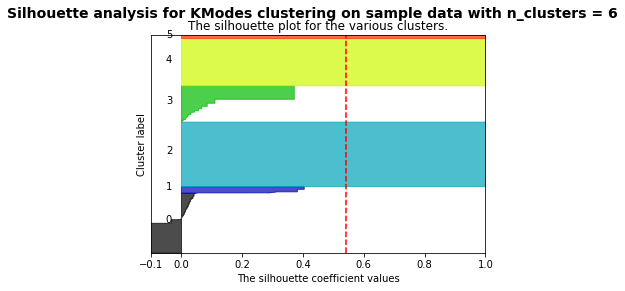

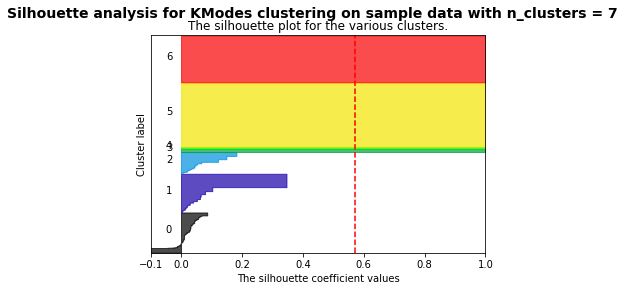

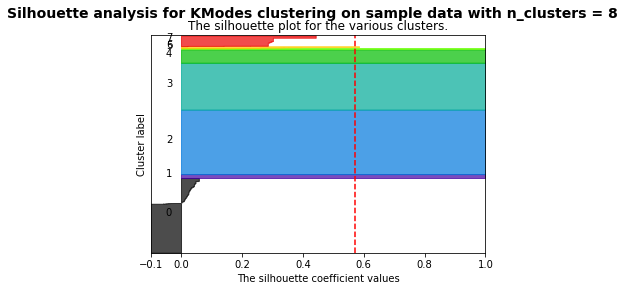

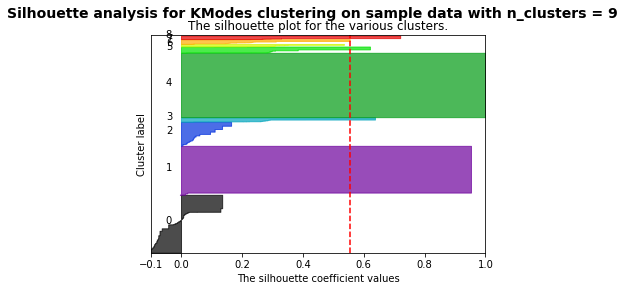

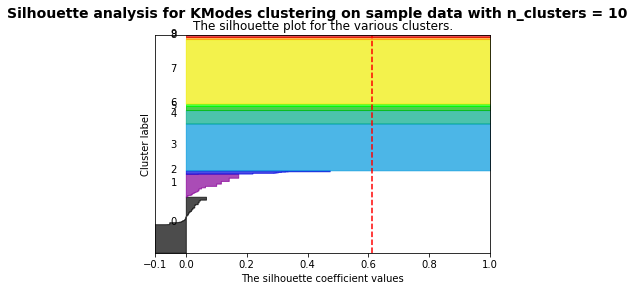

CPU times: user 4min 19s, sys: 35.6 s, total: 4min 55s
Wall time: 4min 31s


In [32]:
%%time
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
import pickle
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

print(__doc__)

result_defender_versions = pd.read_csv("data/KModes_defender_versions.csv")

X = pd.read_csv("data/defender_versions.sample.csv")

#Plot scores > .5
idx = result_defender_versions.silhouette_avg > 0.50
range_n_clusters = result_defender_versions.loc[idx,["n_cluster"]].values

#Create a Sample for Silhoutte
rowCounts = len(X)
sample_size = .33
np.random.seed(42)
finalSampleIndex = np.random.choice(rowCounts, int(rowCounts*sample_size), replace=False)

for n_clusters in np.nditer(range_n_clusters):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
#     fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(finalSampleIndex) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    filename = 'models/KModes_Defender_n_eq_{0}.pckl'.format(n_clusters)
    clusterer = pickle.load(open(filename, 'rb'))
    cluster_labels = clusterer.predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X.iloc[finalSampleIndex], 
                                                  cluster_labels[finalSampleIndex])
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X.iloc[finalSampleIndex], 
                                                  cluster_labels[finalSampleIndex])

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels[finalSampleIndex] == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KModes clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

The `n_cluster` equals 7 shows the most promising for clustering our Defender versions.  While cluster label 0 shows missclassification compared to the other clusters, it is very minimal compared to the other `n_cluster` models.  Cluster labels 5 and 6 classifiers very well and captures majority of the samples.

The next plot is the silhoutte plot for OS Versions.

Automatically created module for IPython interactive environment


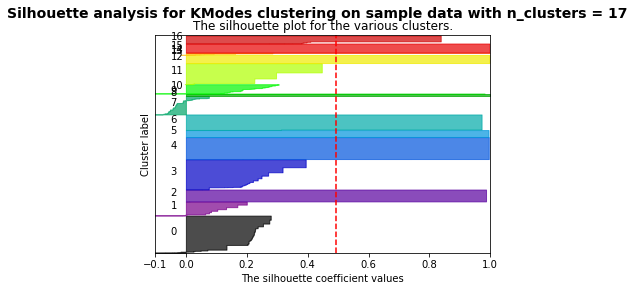

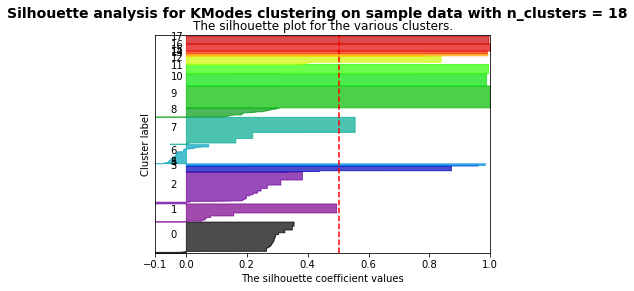

CPU times: user 3min 39s, sys: 12.2 s, total: 3min 51s
Wall time: 3min 29s


In [33]:
%%time
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
import pickle
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

print(__doc__)

X = pd.read_csv("data/os_versions.sample.csv")

# #Plot scores > .5
result_os_versions = pd.read_csv("data/KModes_os_versions.csv")
idx = result_os_versions.silhouette_avg > 0.48
range_n_clusters = result_os_versions.loc[idx,["n_cluster"]].values
    
#Create a Sample for Silhoutte
rowCounts = len(X)
sample_size = .33
np.random.seed(42)
finalSampleIndex = np.random.choice(rowCounts, int(rowCounts*sample_size), replace=False)

for n_clusters in np.nditer(range_n_clusters):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
#     fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(finalSampleIndex) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    filename = 'models/KModes_OS_n_eq_{0}.pckl'.format(n_clusters)
    clusterer = pickle.load(open(filename, 'rb'))
    cluster_labels = clusterer.predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X.iloc[finalSampleIndex], 
                                                  cluster_labels[finalSampleIndex])
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X.iloc[finalSampleIndex], 
                                                  cluster_labels[finalSampleIndex])

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels[finalSampleIndex] == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KModes clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

OS Version took a lot more clusters to achieve an optimal score.  `n_cluster` equals 18 shows the most promise.  Visually all the clusters look even when over 10 labels achieving over .8 average score.  

For our remaining analysis we will focus on the following model
* Defender Versions with 7 Clusters
* OS Versions with 18 Clusters

#### PCA Metric Evaluation
Using metrics, PCA does not appear to cluster well.  The SSE score does not have the elbow effect we would like to see in our clustering algorithm.  In fact it gets worst from the `KElbowVisualizer` package below.  For our classification modeling, we will using 2 clusters.

In [24]:
%%time
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

filename = "models/PCA.pckl"
pca = pickle.load(open(filename, 'rb'))
pca_data = np.loadtxt("data/PCA.csv",delimiter=",")
pca_sum = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4 ) * 100 )

c = sum(pca_sum <= 80)
print("Cluster on the first {0} features from the PCA Analysis".format(c))
X = X_pca[:,:c]
X = StandardScaler().fit_transform(X)

cls = KMeans(init='k-means++',random_state=42, n_jobs=-2)
visualizerKmeans = KElbowVisualizer(
    model=cls, 
    metrics="distortion",
    k=(2, 3, 4, 5, 10, 15, 20, 30, 50, 100)
)
visualizerKmeans.fit(X)    # Fit the data to the visualizer
visualizerKmeans.poof()    # Draw/show/poof the data

ModuleNotFoundError: No module named 'yellowbrick'

[Top](#Top)
[Business Understanding](#Business_Understanding)
[Data Understanding 1](#Data_Understanding_1)
[Data Understanding 2](#Data_Understanding_2)<br>
[Modeling and Evaluation 1](#ME_1)
[Modeling and Evaluation 2](#ME_2)
[Modeling and Evaluation 3](#ME_3)
[Modeling and Evaluation 4](#ME_4)<br>
[Deployment](#Deployment)
[Exceptional Work](#Exceptional_Work)

# Modeling and Evaluation 3 (Visualization Results)<a id="ME_3"></a>

Visualization of Important features
* Compare with Has Detections
* Intrepret the most frequent features

### Comparison with Ground Truth for HasDetections and SmartScreen

#### HasDetections

CPU times: user 989 ms, sys: 92.2 ms, total: 1.08 s
Wall time: 1.08 s


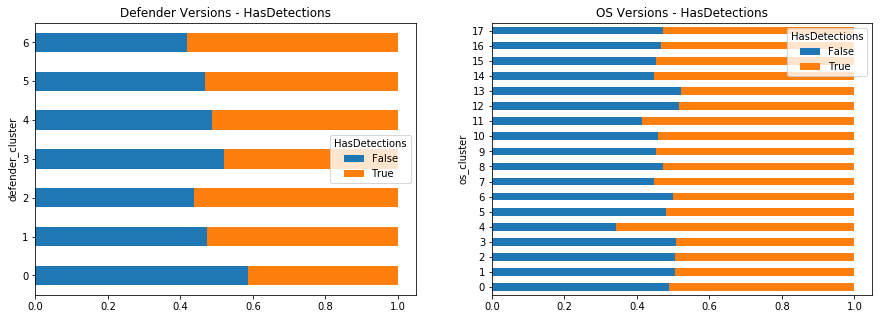

In [59]:
%%time
import pickle
import numpy as np
import pandas as pd
from kmodes.kmodes import KModes

import matplotlib.pyplot as plt
import seaborn as sns

filename = 'models/KModes_OS_n_eq_{0}.pckl'.format(18)
clusterer = pickle.load(open(filename, 'rb'))
os_clusters = clusterer.labels_

filename = 'models/KModes_Defender_n_eq_{0}.pckl'.format(7)
clusterer = pickle.load(open(filename, 'rb'))
defender_clusters = clusterer.labels_

subMalware = pd.read_csv("data/malware.subsample.csv")

# New Response Variable
#Get all categories or cast
cols_categorical, cols_numerical, cols_booleans, cols_categorical_large = load_column_array(subMalware.columns)
subMalware[cols_categorical] = subMalware[cols_categorical].astype(object)
subMalware[cols_categorical_large] = subMalware[cols_categorical_large].astype(object)


#Add Clusters
subMalware["os_cluster"] = os_clusters
subMalware["defender_cluster"] = defender_clusters

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

# the cross tab operator provides an easy way to get these numbers
defenders_hd = pd.crosstab([ subMalware['defender_cluster']], 
                       subMalware.HasDetections.astype(bool))
defender_rate_hd = defenders_hd.div(defenders_hd.sum(1).astype(float),
                             axis=0) # normalize the value

# print survival_rate
defender_rate_hd.plot(kind='barh',stacked=True,title="Defender Versions - HasDetections",ax=axes[0])

# the cross tab operator provides an easy way to get these numbers
os_hd = pd.crosstab([ subMalware['os_cluster']], 
                       subMalware.HasDetections.astype(bool))
os_rate_hd = os_hd.div(os_hd.sum(1).astype(float),
                             axis=0) # normalize the value

# print survival_rate
os_rate_hd.plot(kind='barh',stacked=True,title="OS Versions - HasDetections",ax=axes[1])

Our data set for **HasDetections** is farly balanced with an almost 48/52% split with 52% having detections.  From our clustering, we see more of our clusters for the Antivirus version Defenders are fairly evenly suspictable to virsus.  Cluster 6 appears to have the most vulverability with close to 60% of the records having detections.  Cluster 0 shows the best performance, however we should take that for face value, as label 0 does not have a good silhoutte score.

The Operating system versioning shows a different story.  Cluster label 4 has the biggest jump with more then 60% being vulnerable.  The remaining dataset shows a fairly balance and is on par with our balanced response variable.

#### SmartScreenEnabled

CPU times: user 1.03 s, sys: 91.7 ms, total: 1.13 s
Wall time: 1.13 s


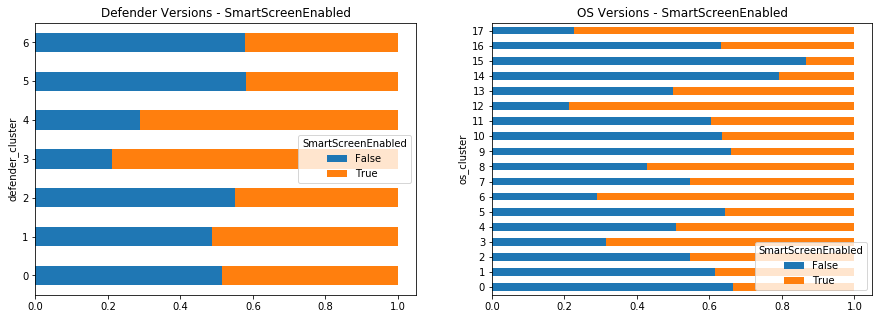

In [61]:
%%time
import pickle
import numpy as np
import pandas as pd
from kmodes.kmodes import KModes

import matplotlib.pyplot as plt
import seaborn as sns

filename = 'models/KModes_OS_n_eq_{0}.pckl'.format(18)
clusterer = pickle.load(open(filename, 'rb'))
os_clusters = clusterer.labels_

filename = 'models/KModes_Defender_n_eq_{0}.pckl'.format(7)
clusterer = pickle.load(open(filename, 'rb'))
defender_clusters = clusterer.labels_

subMalware = pd.read_csv("data/malware.subsample.csv")

# New Response Variable
#Get all categories or cast
cols_categorical, cols_numerical, cols_booleans, cols_categorical_large = load_column_array(subMalware.columns)
subMalware[cols_categorical] = subMalware[cols_categorical].astype(object)
subMalware[cols_categorical_large] = subMalware[cols_categorical_large].astype(object)

subMalware['SmartScreenEnabled'] = subMalware.SmartScreen
subMalware.SmartScreenEnabled.replace({
    "Block":1,
    "ExistsNotSet":0,
    "Off" :0,
    "Prompt" :1,
    "RequireAdmin":1,
    "Warn":1
},inplace=True)

#Add Clusters
subMalware["os_cluster"] = os_clusters
subMalware["defender_cluster"] = defender_clusters

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

# the cross tab operator provides an easy way to get these numbers
defenders_sc = pd.crosstab([ subMalware['defender_cluster']], 
                       subMalware.SmartScreenEnabled.astype(bool))
defender_rate_sc = defenders_sc.div(defenders_sc.sum(1).astype(float),
                             axis=0) # normalize the value

# print survival_rate
defender_rate_sc.plot(kind='barh',stacked=True,title="Defender Versions - SmartScreenEnabled",ax=axes[0])


# the cross tab operator provides an easy way to get these numbers
os_sc = pd.crosstab([ subMalware['os_cluster']], 
                       subMalware.SmartScreenEnabled.astype(bool))
os_rate_sc = os_sc.div(os_sc.sum(1).astype(float),
                             axis=0) # normalize the value

# print survival_rate
os_rate_sc.plot(kind='barh',stacked=True,title="OS Versions - SmartScreenEnabled",ax=axes[1])

From our exploratory data analysis and previous classification project, we found that Smart Screen is a big component if a machine is suspectiable to an attack or not.  We also found that Random Forest picked up on different versions as a favorable features for identifying Smart Screen.

For our Defender clustering, labels 3 and 4 have significant vulnerability in being attacked by malware, with over 70% of those machines being attacked.  The remianing clusters are fairly balanced, indicating additional features are causing detections to be triggered.

OS Version shows similar results for versions being attacked more frequently with 3, 6, 12, and 17 being over 70%.  Since we want to learn how to prevent attacks, OS Version clustering helps with this aspect because 0, 1, 5, 9, 10 are all over 60% for not having malware.

In order to better understand how these specific clusters are helping or causing attacks, let's look at the top features.

### Exploring top feature for each category
Details about OS's top features
# CAN SOMEONE ADD INTREPRETATIONS? i.e. cluster 6, which  detected blah blah blah, had OS_Version of x and blah version of y.

In [75]:
%%time
import pickle
import numpy as np
import pandas as pd
from kmodes.kmodes import KModes

import matplotlib.pyplot as plt
import seaborn as sns

filename = 'models/KModes_OS_n_eq_{0}.pckl'.format(18)
clusterer = pickle.load(open(filename, 'rb'))
os_clusters = clusterer.labels_

filename = 'models/KModes_Defender_n_eq_{0}.pckl'.format(7)
clusterer = pickle.load(open(filename, 'rb'))
defender_clusters = clusterer.labels_

subMalware = pd.read_csv("data/malware.subsample.csv")

# New Response Variable
#Get all categories or cast
cols_categorical, cols_numerical, cols_booleans, cols_categorical_large = load_column_array(subMalware.columns)
subMalware[cols_categorical] = subMalware[cols_categorical].astype(object)
subMalware[cols_categorical_large] = subMalware[cols_categorical_large].astype(object)

subMalware = pd.read_csv("data/malware.subsample.csv")
os_versions = pd.read_csv("data/os_versions.sample.csv")
defender_versions = pd.read_csv("data/defender_versions.sample.csv")

subMalware['SmartScreenEnabled'] = subMalware.SmartScreen
subMalware.SmartScreenEnabled.replace({
    "Block":1,
    "ExistsNotSet":0,
    "Off" :0,
    "Prompt" :1,
    "RequireAdmin":1,
    "Warn":1
},inplace=True)

#Add Clusters
subMalware["os_clusters"] = os_clusters
subMalware["defender_clusters"] = defender_clusters

for n in range(0,max(os_clusters)+1):
    print("Top Categorical Values for cluster {0}".format(n))
    display(subMalware.loc[subMalware.os_clusters==n,[
            "OsBuild",
            "Census_OSBranch",
            "Census_OSBuildNumber",
            "Census_OSVersion",
            "Census_OSBuildRevision"
        ]].astype(object).describe())
    print("======================================================")


Top Categorical Values for cluster 0


OsBuild Census_OSBranch  Census_OSBuildNumber Census_OSVersion  \
count      9593            9593                  9593             9593   
unique       24              10                    27              120   
top       15063     rs2_release                 15063  10.0.15063.1266   
freq       9044            9189                  9189             1265   

        Census_OSBuildRevision  
count                     9593  
unique                     100  
top                       1266  
freq                      1265

Top Categorical Values for cluster 1


OsBuild Census_OSBranch  Census_OSBuildNumber Census_OSVersion  \
count      5714            5714                  5714             5714   
unique        6               8                     8               51   
top       17134     rs4_release                 17134   10.0.17134.112   
freq       5651            5591                  5590             2876   

        Census_OSBuildRevision  
count                     5714  
unique                      49  
top                        112  
freq                      2876

Top Categorical Values for cluster 2


OsBuild Census_OSBranch  Census_OSBuildNumber Census_OSVersion  \
count      9767            9767                  9767             9767   
unique        6               5                     4               51   
top       16299     rs3_release                 16299   10.0.16299.371   
freq       9646            9306                  9341             2387   

        Census_OSBuildRevision  
count                     9767  
unique                      50  
top                        371  
freq                      2387

Top Categorical Values for cluster 3


OsBuild Census_OSBranch  Census_OSBuildNumber  Census_OSVersion  \
count      1836            1836                  1836              1836   
unique        4               2                     1                21   
top       10240         th1_st1                 10240  10.0.10240.17443   
freq       1823            1579                  1836              1696   

        Census_OSBuildRevision  
count                     1836  
unique                      21  
top                      17443  
freq                      1696

Top Categorical Values for cluster 4


OsBuild Census_OSBranch  Census_OSBuildNumber Census_OSVersion  \
count       132             132                   132              132   
unique        6               1                     1                1   
top       16299     rs4_release                 17134   10.0.17134.191   
freq        115             132                   132              132   

        Census_OSBuildRevision  
count                      132  
unique                       1  
top                        191  
freq                       132

Top Categorical Values for cluster 5


OsBuild Census_OSBranch  Census_OSBuildNumber Census_OSVersion  \
count       537             537                   537              537   
unique        2               1                     1                1   
top       17134     rs4_release                 17134   10.0.17134.254   
freq        533             537                   537              537   

        Census_OSBuildRevision  
count                      537  
unique                       1  
top                        254  
freq                       537

Top Categorical Values for cluster 6


OsBuild Census_OSBranch  Census_OSBuildNumber Census_OSVersion  \
count      5662            5662                  5662             5662   
unique        5               4                     5               64   
top       14393     rs1_release                 14393     10.0.14393.0   
freq       4972            5593                  5592              666   

        Census_OSBuildRevision  
count                     5662  
unique                      63  
top                          0  
freq                       668

Top Categorical Values for cluster 7


OsBuild         Census_OSBranch  Census_OSBuildNumber  \
count      8364                    8364                  8364   
unique        3                       1                     1   
top       16299  rs3_release_svc_escrow                 16299   
freq       8246                    8364                  8364   

       Census_OSVersion  Census_OSBuildRevision  
count              8364                    8364  
unique                7                       7  
top      10.0.16299.431                     431  
freq               4780                    4780

Top Categorical Values for cluster 8


OsBuild Census_OSBranch  Census_OSBuildNumber Census_OSVersion  \
count      2854            2854                  2854             2854   
unique        9               2                     1               31   
top       10586     th2_release                 10586   10.0.10586.164   
freq       1173            2764                  2854              405   

        Census_OSBuildRevision  
count                     2854  
unique                      31  
top                        164  
freq                       405

Top Categorical Values for cluster 9


OsBuild Census_OSBranch  Census_OSBuildNumber Census_OSVersion  \
count      6730            6730                  6730             6730   
unique        5               1                     1                1   
top       17134     rs4_release                 17134   10.0.17134.228   
freq       6701            6730                  6730             6730   

        Census_OSBuildRevision  
count                     6730  
unique                       1  
top                        228  
freq                      6730

Top Categorical Values for cluster 10


OsBuild Census_OSBranch  Census_OSBuildNumber Census_OSVersion  \
count      3832            3832                  3832             3832   
unique        4               1                     1                1   
top       17134     rs4_release                 17134   10.0.17134.165   
freq       3787            3832                  3832             3832   

        Census_OSBuildRevision  
count                     3832  
unique                       1  
top                        165  
freq                      3832

Top Categorical Values for cluster 11


OsBuild         Census_OSBranch  Census_OSBuildNumber  \
count      2924                    2924                  2924   
unique        3                       1                     1   
top       16299  rs3_release_svc_escrow                 16299   
freq       2909                    2924                  2924   

       Census_OSVersion  Census_OSBuildRevision  
count              2924                    2924  
unique                1                       1  
top      10.0.16299.547                     547  
freq               2924                    2924

Top Categorical Values for cluster 12


OsBuild  Census_OSBranch  Census_OSBuildNumber Census_OSVersion  \
count      2444             2444                  2444             2444   
unique        6                1                     1               11   
top       10586  th2_release_sec                 10586  10.0.10586.1176   
freq       2419             2444                  2444             1786   

        Census_OSBuildRevision  
count                     2444  
unique                      11  
top                       1176  
freq                      1786

Top Categorical Values for cluster 13


OsBuild         Census_OSBranch  Census_OSBuildNumber  \
count        88                      88                    88   
unique        1                       2                     1   
top       17134  rs3_release_svc_escrow                 16299   
freq         88                      87                    88   

       Census_OSVersion  Census_OSBuildRevision  
count                88                      88  
unique                4                       4  
top      10.0.16299.431                     431  
freq                 65                      65

Top Categorical Values for cluster 14


OsBuild Census_OSBranch  Census_OSBuildNumber Census_OSVersion  \
count       649             649                   649              649   
unique        5               1                     1                1   
top       17134     rs4_release                 17134   10.0.17134.286   
freq        643             649                   649              649   

        Census_OSBuildRevision  
count                      649  
unique                       1  
top                        286  
freq                       649

Top Categorical Values for cluster 15


OsBuild Census_OSBranch  Census_OSBuildNumber Census_OSVersion  \
count       764             764                   764              764   
unique        4               1                     1                1   
top       17134     rs4_release                 17134     10.0.17134.1   
freq        755             764                   764              764   

        Census_OSBuildRevision  
count                      764  
unique                       1  
top                          1  
freq                       764

Top Categorical Values for cluster 16


OsBuild Census_OSBranch  Census_OSBuildNumber Census_OSVersion  \
count      2198            2198                  2198             2198   
unique        3               1                     1                1   
top       17134     rs4_release                 17134   10.0.17134.285   
freq       2187            2198                  2198             2198   

        Census_OSBuildRevision  
count                     2198  
unique                       1  
top                        285  
freq                      2198

Top Categorical Values for cluster 17


OsBuild Census_OSBranch  Census_OSBuildNumber Census_OSVersion  \
count      2494            2494                  2494             2494   
unique        4               1                     1                1   
top       14393     rs1_release                 14393  10.0.14393.2189   
freq       2482            2494                  2494             2494   

        Census_OSBuildRevision  
count                     2494  
unique                       1  
top                       2189  
freq                      2494

CPU times: user 3.9 s, sys: 321 ms, total: 4.22 s
Wall time: 3.38 s


Details about defender's top features

In [76]:
%%time
import pickle
import numpy as np
import pandas as pd
from kmodes.kmodes import KModes

import matplotlib.pyplot as plt
import seaborn as sns

filename = 'models/KModes_OS_n_eq_{0}.pckl'.format(18)
clusterer = pickle.load(open(filename, 'rb'))
os_clusters = clusterer.labels_

filename = 'models/KModes_Defender_n_eq_{0}.pckl'.format(7)
clusterer = pickle.load(open(filename, 'rb'))
defender_clusters = clusterer.labels_

subMalware = pd.read_csv("data/malware.subsample.csv")

# New Response Variable
#Get all categories or cast
cols_categorical, cols_numerical, cols_booleans, cols_categorical_large = load_column_array(subMalware.columns)
subMalware[cols_categorical] = subMalware[cols_categorical].astype(object)
subMalware[cols_categorical_large] = subMalware[cols_categorical_large].astype(object)

subMalware = pd.read_csv("data/malware.subsample.csv")
os_versions = pd.read_csv("data/os_versions.sample.csv")
defender_versions = pd.read_csv("data/defender_versions.sample.csv")

subMalware['SmartScreenEnabled'] = subMalware.SmartScreen
subMalware.SmartScreenEnabled.replace({
    "Block":1,
    "ExistsNotSet":0,
    "Off" :0,
    "Prompt" :1,
    "RequireAdmin":1,
    "Warn":1
},inplace=True)

#Add Clusters
subMalware["os_clusters"] = os_clusters
subMalware["defender_clusters"] = defender_clusters

for n in range(0,max(defender_clusters)+1):
    print("Top Categorical Values for cluster {0}".format(n))
    display(subMalware.loc[subMalware.defender_clusters==n,[
            "EngineVersion",
            "AppVersion",
            "AvSigVersion_x_x"
        ]].astype(object).describe())
    print("======================================================")

Top Categorical Values for cluster 0


EngineVersion     AppVersion  AvSigVersion_x_x
count          12357          12357         12357.000
unique            42             61            34.000
top      1.1.15000.2  4.12.16299.15             1.271
freq            2238           1369          2231.000

Top Categorical Values for cluster 1


EngineVersion       AppVersion  AvSigVersion_x_x
count          12002            12002         12002.000
unique             1               64             3.000
top      1.1.15100.1  4.18.1806.18062             1.273
freq           12002             4152         11961.000

Top Categorical Values for cluster 2


EngineVersion  AppVersion  AvSigVersion_x_x
count           6627        6627          6627.000
unique             1          55             2.000
top      1.1.15200.1  4.10.209.0             1.275
freq            6627        1185          6404.000

Top Categorical Values for cluster 3


EngineVersion      AppVersion  AvSigVersion_x_x
count            794             794           794.000
unique             1               1             1.000
top      1.1.15200.1  4.9.10586.1106             1.275
freq             794             794           794.000

Top Categorical Values for cluster 4


EngineVersion       AppVersion  AvSigVersion_x_x
count            686              686           686.000
unique             1                1             2.000
top      1.1.15200.1  4.8.10240.17443             1.275
freq             686              686           684.000

Top Categorical Values for cluster 5


EngineVersion       AppVersion  AvSigVersion_x_x
count          19465            19465         19465.000
unique             1                1             2.000
top      1.1.15200.1  4.18.1807.18075             1.275
freq           19465            19465         19248.000

Top Categorical Values for cluster 6


EngineVersion       AppVersion  AvSigVersion_x_x
count          14651            14651         14651.000
unique             1                1             3.000
top      1.1.15100.1  4.18.1807.18075             1.273
freq           14651            14651         14631.000

CPU times: user 3.69 s, sys: 350 ms, total: 4.04 s
Wall time: 3.21 s


### PCA
Since PCA was the driver for our clustering algorithm, we have forgone feature importance and focused on classification in our Ramification section.

[Top](#Top)
[Business Understanding](#Business_Understanding)
[Data Understanding 1](#Data_Understanding_1)
[Data Understanding 2](#Data_Understanding_2)<br>
[Modeling and Evaluation 1](#ME_1)
[Modeling and Evaluation 2](#ME_2)
[Modeling and Evaluation 3](#ME_3)
[Modeling and Evaluation 4](#ME_4)<br>
[Deployment](#Deployment)
[Exceptional Work](#Exceptional_Work)

# Modeling and Evaluation 4 (Summary of The Ramification)<a id="ME_4"></a>

### Clusting Defender Versions and OS Versions
Our goal for `KModes` was to introduce larger features in to our classification models without  increasing our feature size atronomically.  We have identifyed 25 new features to introduce in to our previous model from Project 2.  Rerunning the model through Random Forest, after identifying optimal parameters had an average area under the curve score of 0.675, almost no change from our previous models.  There should be no reason to introduce such complexity to our classifiers that does not improve our model.  

Developming the clusters does give Microsoft some prespective on versision deviations.  It appears that versions that shoul d be aldigned with one another are deviating from one another.  Using our cluster analysis, we can help Microsoft communicate to uses about the importance of keeping all versions up to date and aligned in order to achieve you will not be vulnerable to an attack.

In [34]:
%%time
import pickle
from kmodes.kmodes import KModes

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

import numpy as np
import pandas as pd

filename = 'models/KModes_OS_n_eq_{0}.pckl'.format(18)
clusterer = pickle.load(open(filename, 'rb'))
os_clusters = clusterer.labels_

filename = 'models/KModes_Defender_n_eq_{0}.pckl'.format(7)
clusterer = pickle.load(open(filename, 'rb'))
defender_clusters = clusterer.labels_

sample_model_data = pd.read_csv("data/model_data.sample.csv")
subMalware = pd.read_csv("data/malware.subsample.csv")

X = sample_model_data.values
y = subMalware["HasDetections"].values

#Append new features
X = np.column_stack((X,pd.get_dummies(os_clusters),pd.get_dummies(defender_clusters)))

# Creat eth Cross Validation Objected used for all tests
num_cv_iterations = 10
random_st = 42
kfold_cv = KFold(
    n_splits=num_cv_iterations,
    random_state = random_st
)

clf = RandomForestClassifier(random_state=42)

grid_params = [{
    "max_features" : ["auto","log2",0.20, 0.30],
    "n_estimators" : [10,50,100],
    "min_samples_leaf" : [25, 50, 100]
}]

scoring = {
    'acc':'accuracy',
    'precision':'precision',
    'recall':'recall',
    'auc':'roc_auc',
    'mse':'neg_mean_squared_error',
    'r2':'r2'
}

grid_clf = GridSearchCV(
    estimator = clf, 
    param_grid=grid_params, 
    cv=kfold_cv, 
    scoring=scoring,
    refit='auc',
    n_jobs=-2,verbose=1,return_train_score=False)
grid_clf.fit(X, y)

# Save Model
filename = 'models/Cluster_HasDetections_GridSearch_RF_final.sav'
pickle.dump(grid_clf, open(filename, 'wb'))

/Users/a417616/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-2)]: Done 360 out of 360 | elapsed: 33.7min finished


CPU times: user 4min, sys: 4.31 s, total: 4min 4s
Wall time: 34min 32s


In [35]:
# Utility function to report best scores
def report(grid_clf,    n_top=3, clf_name = "", verbose=True):

    if(verbose):
        for i in range(1, n_top + 1):
            candidates = np.flatnonzero(grid_clf.cv_results_['rank_test_auc'] == i)
            for candidate in candidates:
                print("Model with rank: {0}".format(i))
                print("Mean validation score (AUC on Train): {0:.3f} (std: {1:.3f})".format(
                      grid_clf.cv_results_['mean_test_auc'][candidate],
                      grid_clf.cv_results_['std_test_auc'][candidate]))
                print("Parameters: {0}".format(grid_clf.cv_results_['params'][candidate]))
                print("")
    return {
        "Classifier":clf_name,
        "Parameters":str(grid_clf.best_params_),
        "Accuracy_Mean":grid_clf.cv_results_["mean_test_acc"][grid_clf.best_index_],
        "Accuracy_Std":grid_clf.cv_results_["std_test_acc"][grid_clf.best_index_],
        "AUC_Mean":grid_clf.cv_results_["mean_test_auc"][grid_clf.best_index_],
        "AUC_Std":grid_clf.cv_results_["std_test_auc"][grid_clf.best_index_],
        "MSE_Mean":grid_clf.cv_results_["mean_test_mse"][grid_clf.best_index_],
        "MSE_Std":grid_clf.cv_results_["std_test_mse"][grid_clf.best_index_],
        "Precision_Mean":grid_clf.cv_results_["mean_test_precision"][grid_clf.best_index_],
        "Precision_Std":grid_clf.cv_results_["std_test_precision"][grid_clf.best_index_],
        "Recall_Mean":grid_clf.cv_results_["mean_test_recall"][grid_clf.best_index_],
        "Recall_Std":grid_clf.cv_results_["std_test_recall"][grid_clf.best_index_],
        "R2_Mean":grid_clf.cv_results_["mean_test_r2"][grid_clf.best_index_],    
        "R2_Std":grid_clf.cv_results_["std_test_r2"][grid_clf.best_index_],
    }

import pickle
grid_clf = pickle.load(open("models/Cluster_HasDetections_GridSearch_RF_final.sav", 'rb'))

print("GridSearchCV for "+ str( len(grid_clf.cv_results_['params']) ) +" candidate parameter settings.")
report(grid_clf, clf_name="Random Forest")

GridSearchCV for 36 candidate parameter settings.
Model with rank: 1
Mean validation score (AUC on Train): 0.673 (std: 0.007)
Parameters: {'max_features': 0.2, 'min_samples_leaf': 25, 'n_estimators': 100}

Model with rank: 2
Mean validation score (AUC on Train): 0.672 (std: 0.007)
Parameters: {'max_features': 0.3, 'min_samples_leaf': 25, 'n_estimators': 100}

Model with rank: 3
Mean validation score (AUC on Train): 0.672 (std: 0.007)
Parameters: {'max_features': 0.2, 'min_samples_leaf': 25, 'n_estimators': 50}



{'Classifier': 'Random Forest',
 'Parameters': "{'max_features': 0.2, 'min_samples_leaf': 25, 'n_estimators': 100}",
 'Accuracy_Mean': 0.6250488119912289,
 'Accuracy_Std': 0.0055072206917321865,
 'AUC_Mean': 0.6725587813178924,
 'AUC_Std': 0.0067358597499902004,
 'MSE_Mean': -0.37495118800877114,
 'MSE_Std': 0.005507220691732199,
 'Precision_Mean': 0.6289139968550481,
 'Precision_Std': 0.010889677356163112,
 'Recall_Mean': 0.6896323334336237,
 'Recall_Std': 0.021325056036699597,
 'R2_Mean': -0.5031008366508969,
 'R2_Std': 0.0215336214415469}

### KMeans with PCA
You can find our Random Forest modele in the [exception work](#RF_PCA).  For visualization purpose, we constructed an overall Area under the Curve and got an averag AUC of 0.68, compared to its base line .672 from Project 2.

# GRANT REPLACE THIS WITH YOUR STUFF

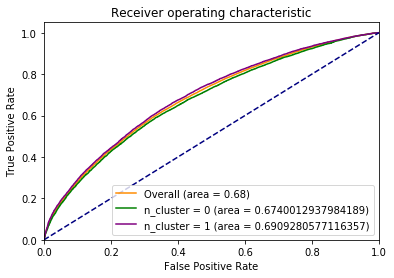

In [34]:
# OVERALL AUC
import matplotlib.pyplot as plt
import sklearn.metrics as mt
import pandas as pd
import numpy as np

predictions = pd.read_csv("data/HasDetections_cluster_predictions.csv")

plt.figure()

fpr, tpr, thresholds = mt.roc_curve(predictions.y.values,predictions.yhat_score.values)
roc_auc = mt.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='Overall (area = %0.2f)' % roc_auc)

colors = ["green","purple","teal"]

for k in [0,1]:
    fpr, tpr, thresholds = mt.roc_curve(
        predictions.loc[predictions.cluster == k].y.values,
        predictions.loc[predictions.cluster == k].yhat_score.values)
    roc_auc = mt.auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[k], label='n_cluster = {0} (area = {1})'.format(k,roc_auc))

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Gower Distance
Gower Distance Results: Effort to improve AUC score by clustering large categories have shown little improvement. Knowing the large categorical data is all categorical data, we decided to try Gower Distance in which the distance of every instance will be computed to the other instances. This methodology is very computational intensive because it will results of nxn (with n=number of instances). Using the original data (65k samples), gower distance did not return results. We decided to try with smaller subsample of 2% (6.5k sampes) for this study. After distance matrix is obtained, the clustering technique K-Medoid is used. This code is found from ??? in which it accepts distance matrix. Silhoutte scores shows that 5 clusters will be optimum. For visualization, the team uses TSNE tool in which the tool provide capability of visualization of high dimentional data to x and y axis. Looking at the the visualization results, the clusters are not very obvious. The cluster labels are then feedback to the final model in which the same Random Forest classification is used. We only see 0.005 improvement from the base model.

[Top](#Top)
[Business Understanding](#Business_Understanding)
[Data Understanding 1](#Data_Understanding_1)
[Data Understanding 2](#Data_Understanding_2)<br>
[Modeling and Evaluation 1](#ME_1)
[Modeling and Evaluation 2](#ME_2)
[Modeling and Evaluation 3](#ME_3)
[Modeling and Evaluation 4](#ME_4)<br>
[Deployment](#Deployment)
[Exceptional Work](#Exceptional_Work)

# Deployment<a id="Deployment"></a>

In [ ]:
Grant to add

[Top](#Top)
[Business Understanding](#Business_Understanding)
[Data Understanding 1](#Data_Understanding_1)
[Data Understanding 2](#Data_Understanding_2)<br>
[Modeling and Evaluation 1](#ME_1)
[Modeling and Evaluation 2](#ME_2)
[Modeling and Evaluation 3](#ME_3)
[Modeling and Evaluation 4](#ME_4)<br>
[Deployment](#Deployment)
[Exceptional Work](#Exceptional_Work)

# Exceptional Work <a id="Exceptional_Work"></a>

For Exceptional Work, we explore two other techniques:  PCA with K-Means and Gower Distance with K-Medoid. We explore the possibility of improving the area under curve (AUC) of the Random Forest classification performed in Lab 2.<br><br>
[**Gower Distance with Agglomorative Clustering**](#Gower_Agg)<br>
<br>
[**PCA with K Means Random Forest Model**](#PCA)<br>
<br>
[**Gower Distance with K-Medoid**](#Gower)<br>

### Gower Distance with Agglomerative Clustering<a id="Gower_Agg"></a>
Since Gower is extremely computational to calculate, we will use 2% of the data, or about 6k rows.  Below are the steps we took to determine if we can find optimal clustering using a dendogram plot.
* Get a 2% Sample
* Calculate Gower Distance
* Run Agglomrative Clustering using dendogram as visualization
* Compare results to T-SNE 2d plot

In [3]:
# Load Data
import pandas as pd
import numpy as np

# Get data and create a model
malware = pd.read_csv("data/malware.clean.csv")
model_data = pd.read_csv("data/model_data.csv")

#Get all categories or cast
cols_categorical, cols_numerical, cols_booleans, cols_categorical_large = load_column_array(malware.columns)
malware[cols_categorical] = malware[cols_categorical].astype(object)
malware[cols_categorical_large] = malware[cols_categorical_large].astype(object)

# Create a Sub Sample of our malware data
rowCounts = len(malware)
k = .02

np.random.seed(42)
finalSampleIndex = np.random.choice(rowCounts, int(rowCounts*k), replace=False)

subMalware = malware.iloc[finalSampleIndex,:].reset_index()
del subMalware['index']

print( "Our subsample data has the following number of rows: ", len(subMalware) )

Our subsample data has the following number of rows:  6658


In [ ]:
%%time
import numpy as np
import pandas as pd
from scipy.spatial import distance 
from sklearn.utils import validation
from sklearn.metrics import pairwise
from scipy.sparse import issparse

# Vectorized Version
# https://sourceforge.net/projects/gower-distance-4python/files/
def gower_distances(X, Y=None, feature_weight=None, categorical_features=None):
    """Computes the gower distances between X and Y

    Gower is a similarity measure for categorical, boolean and numerical mixed
    data.

    
    Parameters
    ----------
    X : array-like, or pandas.DataFrame, shape (n_samples, n_features)

    Y : array-like, or pandas.DataFrame, shape (n_samples, n_features)

    feature_weight :  array-like, shape (n_features)
        According the Gower formula, feature_weight is an attribute weight.

    categorical_features: array-like, shape (n_features)
        Indicates with True/False whether a column is a categorical attribute.
        This is useful when categorical atributes are represented as integer
        values. Categorical ordinal attributes are treated as numeric, and must
        be marked as false.
        
        Alternatively, the categorical_features array can be represented only
        with the numerical indexes of the categorical attribtes.

    Returns
    -------
    similarities : ndarray, shape (n_samples, n_samples)

    Notes
    ------
    The non-numeric features, and numeric feature ranges are determined from X and not Y.
    No support for sparse matrices.

    """
    
    if issparse(X) or issparse(Y):
        raise TypeError("Sparse matrices are not supported for gower distance")
        
    y_none = Y is None
    
    
    # It is necessary to convert to ndarray in advance to define the dtype
    if not isinstance(X, np.ndarray):
        X = np.asarray(X)

    array_type = np.object
    # this is necessary as strangelly the validator is rejecting numeric
    # arrays with NaN
    if  np.issubdtype(X.dtype, np.number) and (np.isfinite(X.sum()) or np.isfinite(X).all()):
        array_type = type(np.zeros(1,X.dtype).flat[0])
    
    X, Y = check_pairwise_arrays(X, Y, precomputed=False, dtype=array_type)
    
    n_rows, n_cols = X.shape
    
    if categorical_features is None:
        categorical_features = np.zeros(n_cols, dtype=bool)
        for col in range(n_cols):
            # In numerical columns, None is converted to NaN,
            # and the type of NaN is recognized as a number subtype
            if not np.issubdtype(type(X[0, col]), np.number):
                categorical_features[col]=True
    else:          
        categorical_features = np.array(categorical_features)
    
    
    #if categorical_features.dtype == np.int32:
    if np.issubdtype(categorical_features.dtype, np.int):
        new_categorical_features = np.zeros(n_cols, dtype=bool)
        new_categorical_features[categorical_features] = True
        categorical_features = new_categorical_features
    
#    print(categorical_features)
  
    # Categorical columns
    X_cat =  X[:,categorical_features]
    
    # Numerical columns
    X_num = X[:,np.logical_not(categorical_features)]
    ranges_of_numeric = None
    max_of_numeric = None
    
        
    # Calculates the normalized ranges and max values of numeric values
    _ ,num_cols=X_num.shape
    ranges_of_numeric = np.zeros(num_cols)
    max_of_numeric = np.zeros(num_cols)
    for col in range(num_cols):
        col_array = X_num[:, col].astype(np.float32) 
        max = np.nanmax(col_array)
        min = np.nanmin(col_array)
     
        if np.isnan(max):
            max = 0.0
        if np.isnan(min):
            min = 0.0
        max_of_numeric[col] = max
        ranges_of_numeric[col] = (1 - min / max) if (max != 0) else 0.0


    # This is to normalize the numeric values between 0 and 1.
    X_num = np.divide(X_num ,max_of_numeric,out=np.zeros_like(X_num), where=max_of_numeric!=0)

    
    if feature_weight is None:
        feature_weight = np.ones(n_cols)
        
    feature_weight_cat=feature_weight[categorical_features]
    feature_weight_num=feature_weight[np.logical_not(categorical_features)]
    
    
    y_n_rows, _ = Y.shape
    
    dm = np.zeros((n_rows, y_n_rows), dtype=np.float32)
        
    feature_weight_sum = feature_weight.sum()

    Y_cat=None
    Y_num=None
    
    if not y_none:
        Y_cat = Y[:,categorical_features]
        Y_num = Y[:,np.logical_not(categorical_features)]
        # This is to normalize the numeric values between 0 and 1.
        Y_num = np.divide(Y_num ,max_of_numeric,out=np.zeros_like(Y_num), where=max_of_numeric!=0)
    else:
        Y_cat=X_cat
        Y_num = X_num
        
    for i in range(n_rows):
        j_start= i
        
        # for non square results
        if n_rows != y_n_rows:
            j_start = 0

      
        Y_cat[j_start:n_rows,:]
        Y_num[j_start:n_rows,:]
        result= _gower_distance_row(X_cat[i,:], X_num[i,:],Y_cat[j_start:n_rows,:],
                                    Y_num[j_start:n_rows,:],feature_weight_cat,feature_weight_num,
                                    feature_weight_sum,categorical_features,ranges_of_numeric,
                                    max_of_numeric) 
        dm[i,j_start:]=result
        dm[i:,j_start]=result
        

    return dm


def _gower_distance_row(xi_cat,xi_num,xj_cat,xj_num,feature_weight_cat,feature_weight_num,
                        feature_weight_sum,categorical_features,ranges_of_numeric,max_of_numeric ):
    # categorical columns
    sij_cat = np.where(xi_cat == xj_cat,np.zeros_like(xi_cat),np.ones_like(xi_cat))
    sum_cat = np.multiply(feature_weight_cat,sij_cat).sum(axis=1) 

    # numerical columns
    abs_delta=np.absolute( xi_num-xj_num)
    sij_num=np.divide(abs_delta, ranges_of_numeric, out=np.zeros_like(abs_delta), where=ranges_of_numeric!=0)

    sum_num = np.multiply(feature_weight_num,sij_num).sum(axis=1)
    sums= np.add(sum_cat,sum_num)
    sum_sij = np.divide(sums,feature_weight_sum)
    return sum_sij

# Scale Data

feature_types = np.repeat(False, len(cols_booleans) + len(cols_numerical))
feature_types = np.append(feature_types, np.repeat(True, len(cols_categorical)))

# sample_model_data = pd.read_csv("data/malware.sample.csv")

X = subMalware.loc[:,np.concatenate((cols_booleans, cols_numerical, cols_categorical),axis=0)]

gower_dist = gower_distances(X, categorical_features=feature_types)
np.savetxt("data/gower_dist.csv", gower_dist, delimiter=",")

In [5]:
%%time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pickle
from pathlib import Path
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.neighbors import kneighbors_graph

# X = MinMaxScaler().fit_transform(sample_model_data)

X = np.loadtxt("data/gower_dist.csv",delimiter=",")

k_graph = kneighbors_graph(X, 2, mode='connectivity', include_self=True, n_jobs=-2)

for n in range(2,6):
    filename = 'models/Gower_AgglomerativeClustering_n_eq_{0}.pckl'.format(n)
    config = Path(filename)
    if not config.is_file():
        cls = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                    connectivity=k_graph, linkage='ward', memory=None, n_clusters=n,
                    pooling_func='deprecated').fit(sample_model_data)
        cls.fit(X)
        pickle.dump(cls, open(filename, 'wb'))
    else:
        cls = pickle.load(open(filename, 'rb'))
    
    cluster_labels = cls.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters = %d, the average silhouette_score is %f."
          % (n, silhouette_avg))
    

/Users/a417616/anaconda3/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator AgglomerativeClustering from version 0.19.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


For n_clusters = 2, the average silhouette_score is 0.254025.


/Users/a417616/anaconda3/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator AgglomerativeClustering from version 0.19.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


For n_clusters = 3, the average silhouette_score is 0.217176.


/Users/a417616/anaconda3/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator AgglomerativeClustering from version 0.19.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


For n_clusters = 4, the average silhouette_score is 0.219165.


/Users/a417616/anaconda3/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator AgglomerativeClustering from version 0.19.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


For n_clusters = 5, the average silhouette_score is 0.175684.
CPU times: user 7min 36s, sys: 7.5 s, total: 7min 44s
Wall time: 1min 25s


Using Ward, we did not achieve a high silhoutte score.  Let's change our parameters and use a dendrogram to help improve our overall model.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

X = np.loadtxt("data/gower_dist.csv",delimiter=",")

link = ['ward', 'complete', 'average', 'single']

for a in link:
    Z = linkage(X, a)

    # set cut-off to 150
    max_d = 7.08                # max_d as in max_distance

    plt.figure(figsize=(25, 10))
    plt.title(' Hierarchical Clustering Dendrogram')
    plt.xlabel('Machine')
    plt.ylabel('Distance')
    dendrogram(
        Z,
        truncate_mode='lastp',  # show only the last p merged clusters
        p=150,                  # Try changing values of p
        leaf_rotation=90.,      # rotates the x axis labels
        leaf_font_size=8.,      # font size for the x axis labels
    )
    plt.axhline(y=max_d, c='k')
    plt.show()

/Users/a417616/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  # This is added back by InteractiveShellApp.init_path()


# Conclusion

### Random Forest Model for PCA \ KMeans n=2<a id="RF_PCA"></a>

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

print(X_pca.shape)

c = sum(pca_sum <= 80)
print("Cluster on the first {0} features from the PCA Analysis".format(c))
X = X_pca[:,:c]
X = StandardScaler().fit_transform(X)

cls = KMeans(n_clusters=2, init='k-means++',random_state=42, n_jobs=-2)

cluster_labels = cls.fit_predict(X)

(66582, 372)
Cluster on the first 24 features from the PCA Analysis


In [31]:
%%time
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

model_data = pd.read_csv("data/model_data.sample.csv")
response_data = pd.read_csv("data/response_data.sample.csv")

# Creat eth Cross Validation Objected used for all tests
num_cv_iterations = 10
random_st = 42
kfold_cv = KFold(
    n_splits=num_cv_iterations,
    random_state = random_st
)

clf = RandomForestClassifier(random_state=42)

grid_params = [{
    "max_features" : ["auto","log2",0.20, 0.30],
    "n_estimators" : [10,50,100],
    "min_samples_leaf" : [25, 50, 100]
}]

scoring = {
    'acc':'accuracy',
    'precision':'precision',
    'recall':'recall',
    'auc':'roc_auc',
    'mse':'neg_mean_squared_error',
    'r2':'r2'
}

grid_clf = GridSearchCV(
    estimator = clf, 
    param_grid=grid_params, 
    cv=kfold_cv, 
    scoring=scoring,
    refit='auc',
    n_jobs=-2,verbose=1,return_train_score=False)

predictions = pd.DataFrame()

for k in [0,1]:
    idx = np.where(cluster_labels == k)[0]
    
    # Cluster each group seperately
    X = model_data.loc[idx,:].values
    y = response_data.loc[idx,:].values
    y = np.squeeze(y)
     
    rows = len(y)
    cluster_prediction = pd.DataFrame(
        {
            'cluster':k,
            'y':y,
            'yhat':np.zeros(rows),
            'yhat_score':np.zeros(rows)
        }
    )
    
    # Get the optimal parameters
    grid_clf.fit(X,y)
 
    # Save Model
    filename = 'models/HasDetections_Cluster_GridSearch_RF_k_eq_{0}.sav'.format(k)
    pickle.dump(grid_clf, open(filename, 'wb'))  
#     grid_clf = pickle.load(open(filename, 'rb'))

    print("{0} cluster GridSearchCV for {1} candidate parameter settings."
         .format(k,len(grid_clf.cv_results_['params']) ))
    df = report(grid_clf, clf_name = "SGD - Hinge")
    
    clf = grid_clf.best_estimator_

    # Get yhat estimates
    for train, test in kfold_cv.split(X,y):
        clf.fit(X[train],y[train])
        cluster_prediction.loc[test,'yhat'] = clf.predict(X[test])
        cluster_prediction.loc[test, 'yhat_score'] = clf.predict_proba(X[test])[:,1]

    predictions = pd.concat((predictions, cluster_prediction), axis=0)
    
predictions.to_csv("data/HasDetections_cluster_predictions.csv",index=False)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-2)]: Done 360 out of 360 | elapsed:  9.6min finished


0 cluster GridSearchCV for 36 candidate parameter settings.
Model with rank: 1
Mean validation score (AUC on Train): 0.674 (std: 0.008)
Parameters: {'max_features': 0.3, 'min_samples_leaf': 25, 'n_estimators': 100}

Model with rank: 2
Mean validation score (AUC on Train): 0.674 (std: 0.010)
Parameters: {'max_features': 0.2, 'min_samples_leaf': 25, 'n_estimators': 100}

Model with rank: 3
Mean validation score (AUC on Train): 0.673 (std: 0.009)
Parameters: {'max_features': 0.2, 'min_samples_leaf': 25, 'n_estimators': 50}

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-2)]: Done 360 out of 360 | elapsed: 11.9min finished


1 cluster GridSearchCV for 36 candidate parameter settings.
Model with rank: 1
Mean validation score (AUC on Train): 0.691 (std: 0.008)
Parameters: {'max_features': 0.3, 'min_samples_leaf': 25, 'n_estimators': 100}

Model with rank: 2
Mean validation score (AUC on Train): 0.690 (std: 0.008)
Parameters: {'max_features': 0.2, 'min_samples_leaf': 25, 'n_estimators': 100}

Model with rank: 3
Mean validation score (AUC on Train): 0.689 (std: 0.008)
Parameters: {'max_features': 0.3, 'min_samples_leaf': 25, 'n_estimators': 50}

CPU times: user 5min 32s, sys: 2.09 s, total: 5min 35s
Wall time: 27min 10s


Let's cluster the data using KMeans

Visualize the Elbow Chart

Visualize the Silhouette

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

c = sum(pca_sum <= 80)
print("Cluster on the first {0} features from the PCA Analysis".format(c))
X = X_pca[:,:c]
X = StandardScaler().fit_transform(X)

cls = KMeans(n_clusters=2, init='k-means++',random_state=42, n_jobs=-2)
visualizerSilhouette = SilhouetteVisualizer(cls)
visualizerSilhouette.fit(X)    # Fit the data to the visualizer
visualizerSilhouette.poof()    # Draw/show/poof the data

cluster2 = cls.fit_predict(X)

cls = KMeans(n_clusters=3, init='k-means++',random_state=42, n_jobs=-2)
visualizerSilhouette = SilhouetteVisualizer(cls)
visualizerSilhouette.fit(X)    # Fit the data to the visualizer
visualizerSilhouette.poof()    # Draw/show/poof the data

cluster3 = cls.fit_predict(X)


Set PCA to 10 Variables  
Plot to see relatinship between each Variable

In [ ]:
#Append to Datafram

df["kcluster2"] = cluster2
df["kcluster3"] = cluster3

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
                      
# Not working
g = sns.PairGrid(df,hue="cluster")
g = g.map_offdiag(plt.scatter)
# g = g.map_diag(plt.hist)

Compare PC1 and PC2 using the Cluster Catagory to understand the centernoids

In [ ]:
# LABEL_COLOR_MAP = {0 : 'red',
#                1 : 'blue',
#                2 : 'green',
#                3 : 'purple',
#                4 : 'violet',
#                5 : 'aqua'}

# axk =df.plot(
#     kind='scatter',
#     x='PC1',y='PC2',
#     c=df.cluster.map(LABEL_COLOR_MAP))

# for i, cluster in enumerate(df.index):
#     axk.annotate("", (df.iloc[i].PC1, df.iloc[i].PC2))

import matplotlib.pyplot as plt
import seaborn as sns; sns.color_palette("hls", 8);

fig, ax =plt.subplots(2,3,figsize=(15,7))
pc1_pc2 = sns.scatterplot(x="PC1", y="PC2", hue="kcluster2", data=df, ax=ax[0,0])
pc1_pc3 = sns.scatterplot(x="PC1", y="PC3", hue="kcluster2", data=df, ax=ax[0,1])
pc1_pc4 = sns.scatterplot(x="PC1", y="PC4", hue="kcluster2", data=df, ax=ax[0,2])
pc2_pc3 = sns.scatterplot(x="PC2", y="PC3", hue="kcluster2", data=df, ax=ax[1,0])
pc2_pc4 = sns.scatterplot(x="PC2", y="PC4", hue="kcluster2", data=df, ax=ax[1,1])
pc3_pc4 = sns.scatterplot(x="PC3", y="PC4", hue="kcluster2", data=df, ax=ax[1,2])
fig.suptitle("n_clusters=2")
plt.show()

fig, ax =plt.subplots(2,3,figsize=(15,7))
pc1_pc2 = sns.scatterplot(x="PC1", y="PC2", hue="kcluster3", data=df, ax=ax[0,0])
pc1_pc3 = sns.scatterplot(x="PC1", y="PC3", hue="kcluster3", data=df, ax=ax[0,1])
pc1_pc4 = sns.scatterplot(x="PC1", y="PC4", hue="kcluster3", data=df, ax=ax[0,2])
pc2_pc3 = sns.scatterplot(x="PC2", y="PC3", hue="kcluster3", data=df, ax=ax[1,0])
pc2_pc4 = sns.scatterplot(x="PC2", y="PC4", hue="kcluster3", data=df, ax=ax[1,1])
pc3_pc4 = sns.scatterplot(x="PC3", y="PC4", hue="kcluster3", data=df, ax=ax[1,2])
fig.suptitle("n_clusters=3")
plt.show()


Run Agglomeraitve Clustering...

In [ ]:
%%time
import pickle
from sklearn.cluster import AgglomerativeClustering

c = sum(pca_sum <= 80)
print("Cluster on the first {0} features from the PCA Analysis".format(c))
X = X_pca[:,:c]

# clustering = AgglomerativeClustering().fit(X_pca)
clustering = AgglomerativeClustering(linkage="ward", n_clusters=2).fit(X)

# Save Model
filename = 'models/PCA_AgglomerativeClustering_k_eq_2.pkcl'
pickle.dump(clustering, open(filename, 'wb'))

In [ ]:
df['Aggcluster2'] = clustering.labels_

Utilizing 10 PCA variables, plot the Agglomerative Clustering Catagories

In [ ]:
# Agg Cluster
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)

fig, ax =plt.subplots(2,3,figsize=(15,7))
pc1_pc2 = sns.scatterplot(x="PC1", y="PC2", hue="Aggcluster2", data=df, ax=ax[0,0])
pc1_pc3 = sns.scatterplot(x="PC1", y="PC3", hue="Aggcluster2", data=df, ax=ax[0,1])
pc1_pc4 = sns.scatterplot(x="PC1", y="PC4", hue="Aggcluster2", data=df, ax=ax[0,2])
pc2_pc3 = sns.scatterplot(x="PC2", y="PC3", hue="Aggcluster2", data=df, ax=ax[1,0])
pc2_pc4 = sns.scatterplot(x="PC2", y="PC4", hue="Aggcluster2", data=df, ax=ax[1,1])
pc3_pc4 = sns.scatterplot(x="PC3", y="PC4", hue="Aggcluster2", data=df, ax=ax[1,2])
fig.suptitle("n_clusters=3")
plt.show()

In [ ]:
df = pd.DataFrame(X_pca[:,:10])
df.columns = ['PC1','PC2', 'PC3', 'PC4','PC5', 'PC6','PC7', 'PC8','PC9','PC10']
df['HasDetections'] = HasDetections_response_data.values
df['Aggcluster'] = cluster_labels

# Not working
g = sns.PairGrid(df,hue="Aggcluster")
g = g.map_offdiag(plt.scatter)
# g = g.map_diag(plt.hist)

Using the Agglomerative above, build a dendrogram plot for the Ward, Complete, Average, and Single Linkage

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
link = ['ward', 'complete', 'average', 'single']


for a in link:
    Z = linkage(df, a)

    # set cut-off to 150
    max_d = 7.08                # max_d as in max_distance

    plt.figure(figsize=(25, 10))
    plt.title(' Hierarchical Clustering Dendrogram')
    plt.xlabel('Machine')
    plt.ylabel('Distance')
    dendrogram(
        Z,
        truncate_mode='lastp',  # show only the last p merged clusters
        p=150,                  # Try changing values of p
        leaf_rotation=90.,      # rotates the x axis labels
        leaf_font_size=8.,      # font size for the x axis labels
    )
    plt.axhline(y=max_d, c='k')
    plt.show()

In [ ]:
agg =df.plot(
    kind='scatter',
    x='PC1',y='PC2',
    c=df.Aggcluster.map(LABEL_COLOR_MAP))

for i, index in enumerate(df.index):
    agg.annotate("", (df.iloc[i].PC1, df.iloc[i].PC2))

Consolidate the KMeans, Agglomerative, and Originazl Model Dataset into one overall dataframe

In [ ]:
# Consolidate DataFrames
result = pd.merge(df, HasDetections_model_data, left_index=True, right_index=True)


Compare the differences between the KMeans and Agglomerative and describe the new field "Cluster_minus_Agg"

In [ ]:
result['Cluster_minus_Agg'] = result['cluster']== result['Aggcluster']
result.Cluster_minus_Agg.describe()

Split the KMeans and Agglomerative by each cluster to conduct futher Modeling and Feature Importance

In [ ]:
Aggcluster0 = pd.DataFrame(result.loc[result['Aggcluster'] == 0])
Aggcluster1 = pd.DataFrame(result.loc[result['Aggcluster'] == 1])
Aggcluster2 = pd.DataFrame(result.loc[result['Aggcluster'] == 2])

cluster0 = pd.DataFrame(result.loc[result['cluster'] == 0])
cluster1 = pd.DataFrame(result.loc[result['cluster'] == 1])
cluster2 = pd.DataFrame(result.loc[result['cluster'] == 2])

print("Cluster 0", cluster0.shape)
print("Cluster 1", cluster1.shape)
print("Cluster 2", cluster2.shape)
print("AggCluster 0", Aggcluster0.shape)
print("AggCluster 1", Aggcluster1.shape)
print("AggCluster 2", Aggcluster2.shape)


In [ ]:
# # from sklearn.feature_selection import SelectKBest, chi2

# X = cluster0.loc[:, cluster0.columns != 'HasDetections'].values
# y = cluster0["HasDetections"]

# bestfeatures = SelectKBest(chi2, k=5)
# fit = bestfeatures.fit(X, y)

# # dfscores = pd.DataFrame(fit.scores_)
# # dfcolumns = pd.DataFrame(cluster1.columns)


# # featureScores0 = pd.concat([dfcolumns,dfscores],axis=1)
# # featureScores0.columns = ['Feature','Cluster_0'] #naming the dataframe columns
# # # print(featureScores0.nlargest(5,'Cluster_0', )) #print best features

In [ ]:
# X = cluster1.loc[:, cluster1.columns != 'HasDetections'].values
# y = cluster1["HasDetections"]


# from sklearn.feature_selection import SelectKBest, chi2
# bestfeatures = SelectKBest(chi2, k=5)
# fit = bestfeatures.fit(X, y)

# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(cluster2.columns)


# featureScores1 = pd.concat([dfcolumns,dfscores],axis=1)
# featureScores1.columns = ['Feature','Cluster_1'] #naming the dataframe columns
# # print(featureScores1.nlargest(5,'Cluster_1')) #print best features

In [ ]:
# X = cluster2.loc[:, cluster2.columns != 'HasDetections'].values
# y = cluster2["HasDetections"]


# from sklearn.feature_selection import SelectKBest, chi2
# bestfeatures = SelectKBest(chi2, k=5)
# fit = bestfeatures.fit(X, y)

# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(cluster2.columns)


# featureScores2 = pd.concat([dfcolumns,dfscores],axis=1)
# featureScores2.columns = ['Feature','Cluster_2'] #naming the dataframe columns
# # print(featureScores2.nlargest(5,'Cluster_2')) #print best features

Agg Cluster

In [ ]:
# X = AggCluster0.loc[:, AggCluster0.columns != 'HasDetections'].values
# y = AggCluster0["HasDetections"]


# from sklearn.feature_selection import SelectKBest, chi2
# bestfeatures = SelectKBest(chi2, k=5)
# fit = bestfeatures.fit(X, y)

# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(AggCluster1.columns)


# featureScores3 = pd.concat([dfcolumns,dfscores],axis=1)
# featureScores3.columns = ['Feature','AggCluster_0'] #naming the dataframe columns
# # print(featureScores0.nlargest(5,'AggCluster_0', )) #print best features

In [ ]:
# X = AggCluster1.loc[:, AggCluster1.columns != 'HasDetections'].values
# y = AggCluster1["HasDetections"]


# from sklearn.feature_selection import SelectKBest, chi2
# bestfeatures = SelectKBest(chi2, k=5)
# fit = bestfeatures.fit(X, y)

# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(AggCluster2.columns)


# featureScores4 = pd.concat([dfcolumns,dfscores],axis=1)
# featureScores4.columns = ['Feature','AggCluster_1'] #naming the dataframe columns
# # print(featureScores1.nlargest(5,'AggCluster_1')) #print best features

In [ ]:
# X = AggCluster2.loc[:, AggCluster2.columns != 'HasDetections'].values
# y = AggCluster2["HasDetections"]


# from sklearn.feature_selection import SelectKBest, chi2
# bestfeatures = SelectKBest(chi2, k=5)
# fit = bestfeatures.fit(X, y)

# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(AggCluster2.columns)


# featureScores5 = pd.concat([dfcolumns,dfscores],axis=1)
# featureScores5.columns = ['Feature','AggCluster_2'] #naming the dataframe columns
# # print(featureScores2.nlargest(5,'AggCluster_2')) #print best features

Join Features Importance

In [ ]:
# featureImportance = featureScores0.join(featureScores1.set_index('Feature'), on='Feature')
# featureImportance = featureImportance.join(featureScores2.set_index('Feature'), on='Feature')
# featureImportance = featureImportance.join(featureScores3.set_index('Feature'), on='Feature')
# featureImportance = featureImportance.join(featureScores4.set_index('Feature'), on='Feature')
# featureImportance = featureImportance.join(featureScores5.set_index('Feature'), on='Feature')
# # featureImportance.dropna(inplace=True)
# featureImportance


Begin Random Forest 

In [ ]:
value = 10
print('Valueis' + str(value) + '')


In [ ]:
Aggcluster1.HasDetections.describe()


In [ ]:
# Run Test Model
RunRFModel(Aggcluster1, 'Agg01')



In [ ]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
import pickle


def RunRFModel(df, name):
    X = df.loc[:, df.columns != 'HasDetections'].values
    y = df["HasDetections"]
    print(X)

    #   Createth Cross Validation Objected used for all tests
    num_cv_iterations = 10
    random_st = 42
    kfold_cv = KFold(
        n_splits=num_cv_iterations,
        random_state = random_st
    )
    
    clf = RandomForestClassifier(random_state=42)
    
    grid_params = [{
        "max_features" : ["auto","log2",0.20, 0.30],
        "n_estimators" : [10,20,50],
        "min_samples_leaf" : [5, 20, 50]
    }]
    
    scoring = {
        'acc':'accuracy',
        'precision':'precision',
        'recall':'recall',
        'auc':'roc_auc',
        'mse':'neg_mean_squared_error',
        'r2':'r2'
    }
    
    grid_clf = GridSearchCV(
        estimator = clf, 
        param_grid=grid_params, 
        cv=kfold_cv, 
#         scoring=scoring,
#         refit='auc',
        n_jobs=-2,verbose=1,return_train_score=False)
    
    grid_clf.fit(X, y)

    # # Save Model
    filename = ('models/HasDetections_GridSearch_RF_' + str(name) + '')
    pickle.dump(grid_clf, open(filename, 'wb'))

# Chris Random Forest Model

In [33]:
predictions = pd.read_csv("data/HasDetections_cluster_predictions.csv")
predictions.shape

(66582, 4)

[Exceptional Work](#Exceptional_Work)


## Gower Distance with K-Medoid<a id="Gower"></a>

### Algorithm:
1. Clusters on Large Features using Gower distance/K-medoid/TSNE
2. Update the model with new Cluster (if there are two clusters, there will be two models)
3. Run Random Forest on each model 

**[Getting the Malware Data](#Recall_Data)**<br>
**[Random Forest Baseline](#RF_Baseline)**<br>
**[Random Forest with Clustered Model](#RF_Cluster)**


## Getting the Malware Data <a id="Recall_Data"></a>

In [10]:
from __future__ import print_function
import numpy as np
import pandas as pd
from scipy.spatial import distance 
from sklearn.utils import validation
from sklearn.metrics import pairwise
from scipy.sparse import issparse
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
#tools.set_credentials_file(username='vital4ik', api_key='O9aDFFPtd7hvIcvyQQCm')
#from plotly.offline import *

%run -i ColumnArrays.py

%time malware = pd.read_csv("data/malware.clean.csv")

print("Malware data loaded from data folder, size is", malware.shape)

CPU times: user 3.42 s, sys: 269 ms, total: 3.69 s
Wall time: 3.67 s
Malware data loaded from data folder, size is (332912, 48)


In [11]:
# Create a Sub Sample for quick running (only for now)
rowCounts = len(malware)
k=.02 #(this makes 2% of the original sample)
#k=0.2 #(this makes 20% of the original sample)

np.random.seed(42)
finalSampleIndex = np.random.choice(rowCounts, int(rowCounts*k), replace=False)

subMalware3b = malware.iloc[finalSampleIndex,:].reset_index()
del subMalware3b['index']

print( "Our subsample data has the following number of rows: ", len(subMalware3b) )

Our subsample data has the following number of rows:  6658


In [12]:
def load_column_array(cols):
    cols_booleans = [
        "IsBeta",
        "IsSxsPassiveMode",
        "HasTpm",
        "IsProtected",
        "AutoSampleOptIn",
        "PuaMode",
        "SMode",
        "Firewall",
        "UacLuaenable",
        "Census_HasOpticalDiskDrive",
        "Census_IsPortableOperatingSystem",
        "Census_IsFlightingInternal",
        "Census_IsFlightsDisabled",
        "Census_ThresholdOptIn",
        "Census_IsSecureBootEnabled",
        "Census_IsWIMBootEnabled",
        "Census_IsVirtualDevice",
        "Census_IsTouchEnabled",
        "Census_IsPenCapable",
        "Census_IsAlwaysOnAlwaysConnectedCapable",
        "Wdft_IsGamer"
    ]

    cols_categorical = [
        "ProductName",
        "EngineVersion",
        "AppVersion",
        "AvSigVersion_x_x",
        "RtpStateBitfield",
        "AVProductsInstalled",
        "AVProductsEnabled",
        "CountryIdentifier",
        "OrganizationIdentifier",
        "Platform",
        "Processor",
        "OsVer",
        "OsBuild",
        "OsSuite",
        "OsPlatformSubRelease",
        "SkuEdition",
        "SmartScreen",
        "Census_MDC2FormFactor",
        "Census_DeviceFamily",
        "Census_ProcessorManufacturerIdentifier",
        "Census_ProcessorClass",
        "Census_PrimaryDiskTypeName",
        "Census_ChassisTypeName",
        "Census_PowerPlatformRoleName",
        "Census_InternalBatteryType",
        "Census_OSArchitecture",
        "Census_OSBranch",
        "Census_OSBuildNumber",
        "Census_OSEdition",
        "Census_OSSkuName",
        "Census_OSInstallTypeName",
        "Census_OSInstallLanguageIdentifier",
        "Census_OSUILocaleIdentifier",
        "Census_OSWUAutoUpdateOptionsName",
        "Census_GenuineStateName",
        "Census_ActivationChannel",
        "Census_FlightRing",
        "Wdft_RegionIdentifier"
    ]

    cols_categorical_large = [
 #       "AvSigVersion",
        "DefaultBrowsersIdentifier",
        "AVProductStatesIdentifier",
        "CityIdentifier",
        "GeoNameIdentifier",
        "OsBuildLab",
        "IeVerIdentifier",
        "Census_OEMNameIdentifier",
        "Census_OEMModelIdentifier",
        "Census_ProcessorModelIdentifier",
        "Census_OSVersion",
        "Census_OSBuildRevision",
        "Census_FirmwareManufacturerIdentifier",
        "Census_FirmwareVersionIdentifier",
        "LocaleEnglishNameIdentifier"
    ]

    cols_numerical = [
        "Census_ProcessorCoreCount",
        "Census_PrimaryDiskTotalCapacity",
        "Census_SystemVolumeTotalCapacity",
        "Census_TotalPhysicalRAM",
        "Census_InternalPrimaryDiagonalDisplaySizeInInches",
        "Census_InternalPrimaryDisplayResolutionHorizontal",
        "Census_InternalPrimaryDisplayResolutionVertical",
        "Census_InternalBatteryNumberOfCharges"
    ]
    
    # Update our column arrays
    cols_categorical = [x for x in cols_categorical if x in cols]
    cols_numerical = [x for x in cols_numerical if x in cols]
    cols_booleans = [x for x in cols_booleans if x in cols]
    cols_categorical_large = [x for x in cols_categorical_large if x in cols]
    
    return cols_categorical, cols_numerical, cols_booleans, cols_categorical_large

In [13]:
cols_categorical, cols_numerical, cols_booleans, cols_categorical_large = load_column_array(subMalware3b.columns)

In [14]:
def get_one_hot_encodings(df, cols):
    result = pd.DataFrame()
    i = 0
    for col in cols:
        dummies = pd.get_dummies(df[col],prefix=col)
        if( i == 0 ):
            result = dummies.copy()
        else:
            result = pd.concat((result, dummies), axis=1)
        i+=1
    return result

In [15]:
def reduce_features(df, verbose = False):
    # calculate the correlation matrix
    corr_matrix  = df.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find index of feature columns with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
    
    #Get all of the correlation values > 95%
    x = np.where(upper > 0.95)

    #Display all field combinations with > 95% correlation
    cf = pd.DataFrame()
    cf['Field1'] = upper.columns[x[1]]
    cf['Field2'] = upper.index[x[0]]

    #Get the correlation values for every field combination. (There must be a more pythonic way to do this!)
    corr = [0] * len(cf)
    for i in range(0, len(cf)):
        corr[i] =  upper[cf['Field1'][i]][cf['Field2'][i]] 

    cf['Correlation'] = corr

    if( verbose ):
        print('There are ', str(len(cf['Field1'])), ' field correlations > 95%.')
        display(cf)
        
        print('Dropping the following ', str(len(to_drop)), ' highly correlated fields.')
        to_drop
        
    #Check columns before drop 
    if( verbose ):
        print('\r\n*********Before: Dropping Highly Correlated Fields*************************************')
        display(df.info(verbose=False))

    # Drop the highly correlated features from our training data 
    df = df.drop(to_drop, axis=1)

    #Check columns after drop 
    if( verbose ):
        print('\r\n*********After: Dropping Highly Correlated Fields**************************************')
        df.info(verbose=False)
    
    return df

## Baseline Random Forest<a id="RF_Baseline"></a>
### Code below is from Lab 2 in which we took only boolean, numerical, and categorical. We left out large categorical feature

In [109]:
pd.options.display.max_rows = 999
model_data = pd.concat(
    (    
        subMalware3b[cols_booleans],
        subMalware3b[cols_numerical],
        get_one_hot_encodings(subMalware3b, cols_categorical)
    ), axis = 1)
response_data = subMalware3b["HasDetections"]

print("Total Features after One-Hot Encoding: ", model_data.shape )
print("Reduce Features based on highly correlated values > .95")
model_data = reduce_features(model_data, verbose=True)
pd.reset_option('max_row')

Total Features after One-Hot Encoding:  (6658, 304)
Reduce Features based on highly correlated values > .95
There are  99  field correlations > 95%.


Field1  \
0               AvSigVersion_x_x_1.2229999999999999   
1                            AvSigVersion_x_x_1.225   
2                            AvSigVersion_x_x_1.227   
3                            AvSigVersion_x_x_1.229   
4               AvSigVersion_x_x_1.2309999999999999   
5               AvSigVersion_x_x_1.2329999999999999   
6                            AvSigVersion_x_x_1.235   
7                            AvSigVersion_x_x_1.237   
8                            AvSigVersion_x_x_1.239   
9               AvSigVersion_x_x_1.2409999999999999   
10              AvSigVersion_x_x_1.2429999999999999   
11                           AvSigVersion_x_x_1.245   
12                           AvSigVersion_x_x_1.247   
13                           AvSigVersion_x_x_1.249   
14                           AvSigVersion_x_x_1.251   
15                           AvSigVersion_x_x_1.255   
16              AvSigVersion_x_x_1.2570000000000001   
17              AvSigVersion_x_x_1.2590000000000001   
18                           AvSigVersion_x_x_1.263   
19                           AvSigVersion_x_x_1.265   
20              AvSigVersion_x_x_1.2670000000000001   
21              AvSigVersion_x_x_1.2690000000000001   
22                           AvSigVersion_x_x_1.271   
23                           AvSigVersion_x_x_1.273   
24                           AvSigVersion_x_x_1.275   
25                    OsPlatformSubRelease_windows7   
26                  OsPlatformSubRelease_windows8.1   
27                         OsPlatformSubRelease_th1   
28                       Census_OSBuildNumber_10240   
29                         OsPlatformSubRelease_th2   
30                         OsPlatformSubRelease_rs1   
31                         OsPlatformSubRelease_rs2   
32                      Census_OSBranch_rs2_release   
33                       Census_OSBuildNumber_15063   
34                         OsPlatformSubRelease_rs3   
35                       Census_OSBuildNumber_16299   
36                         OsPlatformSubRelease_rs4   
37                      Census_OSBranch_rs4_release   
38                       Census_OSBuildNumber_17134   
39                    Census_OSBranch_rs_prerelease   
40                       Census_OSBuildNumber_17634   
41                Census_OSBranch_rs_prerelease_flt   
42                       Census_OSBuildNumber_17692   
43                       Census_OSBuildNumber_17744   
44                       Census_OSBuildNumber_17754   
45                                      OsSuite_768   
46                                  SkuEdition_Home   
47                                   SkuEdition_Pro   
48                    Census_OSSkuName_PROFESSIONAL   
49                  Census_OSEdition_ServerStandard   
50                 Census_OSSkuName_STANDARD_SERVER   
51  Census_OSWUAutoUpdateOptionsName_DownloadNotify   
52                                  SkuEdition_Home   
53                                   SkuEdition_Pro   
54                    Census_OSSkuName_PROFESSIONAL   
55                      Census_OSBranch_rs2_release   
56                       Census_OSBuildNumber_15063   
57                       Census_OSBuildNumber_16299   
58                      Census_OSBranch_rs4_release   
59                       Census_OSBuildNumber_17134   
60                       Census_OSBuildNumber_10240   
61                           Census_OSEdition_Cloud   
62                           Census_OSSkuName_CLOUD   
63                       Census_OSEdition_Education   
64                       Census_OSSkuName_EDUCATION   
65                      Census_OSEdition_Enterprise   
66                      Census_OSSkuName_ENTERPRISE   
67                     Census_OSEdition_EnterpriseS   
68                    Census_OSSkuName_ENTERPRISE_S   
69                                   SkuEdition_Pro   
70                    Census_OSEdition_Professional   
71                    Census_OSSkuName_PROFESSIONAL   
72       Census_ProcessorManuf

Dropping the following  76  highly correlated fields.

*********Before: Dropping Highly Correlated Fields*************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6658 entries, 0 to 6657
Columns: 304 entries, Census_IsSecureBootEnabled to Census_ActivationChannel_Volume:MAK
dtypes: float64(9), int64(1), uint8(294)
memory usage: 2.4 MB


None


*********After: Dropping Highly Correlated Fields**************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6658 entries, 0 to 6657
Columns: 228 entries, Census_IsSecureBootEnabled to Census_ActivationChannel_Volume:MAK
dtypes: float64(9), int64(1), uint8(218)
memory usage: 1.9 MB


In [110]:
# Utility function to report best scores
def report(grid_clf,     n_top=3, clf_name = "", verbose=True):

    if(verbose):
        for i in range(1, n_top + 1):
            candidates = np.flatnonzero(grid_clf.cv_results_['rank_test_auc'] == i)
            for candidate in candidates:
                print("Model with rank: {0}".format(i))
                print("Mean validation score (AUC on Train): {0:.3f} (std: {1:.3f})".format(
                      grid_clf.cv_results_['mean_test_auc'][candidate],
                      grid_clf.cv_results_['std_test_auc'][candidate]))
                print("Parameters: {0}".format(grid_clf.cv_results_['params'][candidate]))
                print("")
    return {
        "Classifier":clf_name,
        "Parameters":str(grid_clf.best_params_),
        "Accuracy_Mean":grid_clf.cv_results_["mean_test_acc"][grid_clf.best_index_],
        "Accuracy_Std":grid_clf.cv_results_["std_test_acc"][grid_clf.best_index_],
        "AUC_Mean":grid_clf.cv_results_["mean_test_auc"][grid_clf.best_index_],
        "AUC_Std":grid_clf.cv_results_["std_test_auc"][grid_clf.best_index_],
        "MSE_Mean":grid_clf.cv_results_["mean_test_mse"][grid_clf.best_index_],
        "MSE_Std":grid_clf.cv_results_["std_test_mse"][grid_clf.best_index_],
        "Precision_Mean":grid_clf.cv_results_["mean_test_precision"][grid_clf.best_index_],
        "Precision_Std":grid_clf.cv_results_["std_test_precision"][grid_clf.best_index_],
        "Recall_Mean":grid_clf.cv_results_["mean_test_recall"][grid_clf.best_index_],
        "Recall_Std":grid_clf.cv_results_["std_test_recall"][grid_clf.best_index_],
        "R2_Mean":grid_clf.cv_results_["mean_test_r2"][grid_clf.best_index_],    
        "R2_Std":grid_clf.cv_results_["std_test_r2"][grid_clf.best_index_],
    }

In [111]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

X = model_data.values
y = response_data.values

# Creat eth Cross Validation Objected used for all tests
num_cv_iterations = 10
random_st = 42
kfold_cv = KFold(
    n_splits=num_cv_iterations,
    random_state = random_st
)

clf = RandomForestClassifier(random_state=42)

grid_params = [{
    "max_features" : ["auto","log2",0.20, 0.30],
    "n_estimators" : [10,50,100],
    "min_samples_leaf" : [25, 50, 100]
}]

scoring = {
    'acc':'accuracy',
    'precision':'precision',
    'recall':'recall',
    'auc':'roc_auc',
    'mse':'neg_mean_squared_error',
    'r2':'r2'
}

grid_clf = GridSearchCV(
    estimator = clf, 
    param_grid=grid_params, 
    cv=kfold_cv, 
    scoring=scoring,
    refit='auc',
    n_jobs=-2,verbose=1,return_train_score=False)
grid_clf.fit(X, y)



Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:   35.7s
[Parallel(n_jobs=-2)]: Done 360 out of 360 | elapsed:  1.8min finished


CPU times: user 11.2 s, sys: 193 ms, total: 11.4 s
Wall time: 1min 51s


In [112]:
# Save Model

import pickle
filename = 'models/RF_baseline_proj3.sav'
pickle.dump(grid_clf, open(filename, 'wb'))

In [113]:
grid_clf = pickle.load(open("models/RF_baseline_proj3.sav", 'rb'))

print("GridSearchCV for "+ str( len(grid_clf.cv_results_['params']) ) +" candidate parameter settings.")
report(grid_clf, clf_name="Random Forest")

GridSearchCV for 36 candidate parameter settings.
Model with rank: 1
Mean validation score (AUC on Train): 0.647 (std: 0.022)
Parameters: {'max_features': 0.2, 'min_samples_leaf': 25, 'n_estimators': 100}

Model with rank: 2
Mean validation score (AUC on Train): 0.647 (std: 0.023)
Parameters: {'max_features': 0.3, 'min_samples_leaf': 25, 'n_estimators': 100}

Model with rank: 3
Mean validation score (AUC on Train): 0.647 (std: 0.021)
Parameters: {'max_features': 0.2, 'min_samples_leaf': 25, 'n_estimators': 50}



{'Classifier': 'Random Forest',
 'Parameters': "{'max_features': 0.2, 'min_samples_leaf': 25, 'n_estimators': 100}",
 'Accuracy_Mean': 0.6079903875037549,
 'Accuracy_Std': 0.01725678926855979,
 'AUC_Mean': 0.6469350614002443,
 'AUC_Std': 0.02206669106553454,
 'MSE_Mean': -0.3920096124962451,
 'MSE_Std': 0.017256789268559797,
 'Precision_Mean': 0.6120501514046564,
 'Precision_Std': 0.026929856560655382,
 'Recall_Mean': 0.7257431907647006,
 'Recall_Std': 0.023103306647902444,
 'R2_Mean': -0.5777164415447558,
 'R2_Std': 0.06443405931641817}

### Baseline AUC Mean is 0.6469<a id="RF_Base_Score"></a>
[Compare to AUC Mean with clustered Categorical Large](#RF_New_Score")

## Random Forest with clustered Categorical Large<a id="RF_Cluster"></a>

In [62]:
def check_pairwise_arrays(X, Y, precomputed=False, dtype=None):
    X, Y, dtype_float = pairwise._return_float_dtype(X, Y)

    warn_on_dtype = dtype is not None
    estimator = 'check_pairwise_arrays'
    if dtype is None:
        dtype = dtype_float

    if Y is X or Y is None:
        X = Y = validation.check_array(X, accept_sparse='csr', dtype=dtype,
                            warn_on_dtype=warn_on_dtype, estimator=estimator)
    else:
        X = validation.check_array(X, accept_sparse='csr', dtype=dtype,
                        warn_on_dtype=warn_on_dtype, estimator=estimator)
        Y = validation.check_array(Y, accept_sparse='csr', dtype=dtype,
                        warn_on_dtype=warn_on_dtype, estimator=estimator)

    if precomputed:
        if X.shape[1] != Y.shape[0]:
            raise ValueError("Precomputed metric requires shape "
                             "(n_queries, n_indexed). Got (%d, %d) "
                             "for %d indexed." %
                             (X.shape[0], X.shape[1], Y.shape[0]))
    elif X.shape[1] != Y.shape[1]:
        raise ValueError("Incompatible dimension for X and Y matrices: "
                         "X.shape[1] == %d while Y.shape[1] == %d" % (
                             X.shape[1], Y.shape[1]))

    return X, Y

In [63]:
# Vectorized Version
def gower_distances(X, Y=None, feature_weight=None, categorical_features=None):
    """Computes the gower distances between X and Y

    Gower is a similarity measure for categorical, boolean and numerical mixed
    data.

    
    Parameters
    ----------
    X : array-like, or pandas.DataFrame, shape (n_samples, n_features)

    Y : array-like, or pandas.DataFrame, shape (n_samples, n_features)

    feature_weight :  array-like, shape (n_features)
        According the Gower formula, feature_weight is an attribute weight.

    categorical_features: array-like, shape (n_features)
        Indicates with True/False whether a column is a categorical attribute.
        This is useful when categorical atributes are represented as integer
        values. Categorical ordinal attributes are treated as numeric, and must
        be marked as false.
        
        Alternatively, the categorical_features array can be represented only
        with the numerical indexes of the categorical attribtes.

    Returns
    -------
    similarities : ndarray, shape (n_samples, n_samples)

    Notes
    ------
    The non-numeric features, and numeric feature ranges are determined from X and not Y.
    No support for sparse matrices.

    """
    
    if issparse(X) or issparse(Y):
        raise TypeError("Sparse matrices are not supported for gower distance")
        
    y_none = Y is None
    
    
    # It is necessary to convert to ndarray in advance to define the dtype
    if not isinstance(X, np.ndarray):
        X = np.asarray(X)

    array_type = np.object
    # this is necessary as strangelly the validator is rejecting numeric
    # arrays with NaN
    if  np.issubdtype(X.dtype, np.number) and (np.isfinite(X.sum()) or np.isfinite(X).all()):
        array_type = type(np.zeros(1,X.dtype).flat[0])
    
    X, Y = check_pairwise_arrays(X, Y, precomputed=False, dtype=array_type)
    
    n_rows, n_cols = X.shape
    
    if categorical_features is None:
        categorical_features = np.zeros(n_cols, dtype=bool)
        for col in range(n_cols):
            # In numerical columns, None is converted to NaN,
            # and the type of NaN is recognized as a number subtype
            if not np.issubdtype(type(X[0, col]), np.number):
                categorical_features[col]=True
    else:          
        categorical_features = np.array(categorical_features)
    
    
    #if categorical_features.dtype == np.int32:
    if np.issubdtype(categorical_features.dtype, np.int):
        new_categorical_features = np.zeros(n_cols, dtype=bool)
        new_categorical_features[categorical_features] = True
        categorical_features = new_categorical_features
    
    print(categorical_features)
  
    # Categorical columns
    X_cat =  X[:,categorical_features]
    
    # Numerical columns
    X_num = X[:,np.logical_not(categorical_features)]
    ranges_of_numeric = None
    max_of_numeric = None
    
        
    # Calculates the normalized ranges and max values of numeric values
    _ ,num_cols=X_num.shape
    ranges_of_numeric = np.zeros(num_cols)
    max_of_numeric = np.zeros(num_cols)
    for col in range(num_cols):
        col_array = X_num[:, col].astype(np.float32) 
        max = np.nanmax(col_array)
        min = np.nanmin(col_array)
     
        if np.isnan(max):
            max = 0.0
        if np.isnan(min):
            min = 0.0
        max_of_numeric[col] = max
        ranges_of_numeric[col] = (1 - min / max) if (max != 0) else 0.0


    # This is to normalize the numeric values between 0 and 1.
    X_num = np.divide(X_num ,max_of_numeric,out=np.zeros_like(X_num), where=max_of_numeric!=0)

    
    if feature_weight is None:
        feature_weight = np.ones(n_cols)
        
    feature_weight_cat=feature_weight[categorical_features]
    feature_weight_num=feature_weight[np.logical_not(categorical_features)]
    
    
    y_n_rows, _ = Y.shape
    
    dm = np.zeros((n_rows, y_n_rows), dtype=np.float32)
        
    feature_weight_sum = feature_weight.sum()

    Y_cat=None
    Y_num=None
    
    if not y_none:
        Y_cat = Y[:,categorical_features]
        Y_num = Y[:,np.logical_not(categorical_features)]
        # This is to normalize the numeric values between 0 and 1.
        Y_num = np.divide(Y_num ,max_of_numeric,out=np.zeros_like(Y_num), where=max_of_numeric!=0)
    else:
        Y_cat=X_cat
        Y_num = X_num
        
    for i in range(n_rows):
        j_start= i
        
        # for non square results
        if n_rows != y_n_rows:
            j_start = 0

      
        Y_cat[j_start:n_rows,:]
        Y_num[j_start:n_rows,:]
        result= _gower_distance_row(X_cat[i,:], X_num[i,:],Y_cat[j_start:n_rows,:],
                                    Y_num[j_start:n_rows,:],feature_weight_cat,feature_weight_num,
                                    feature_weight_sum,categorical_features,ranges_of_numeric,
                                    max_of_numeric) 
        dm[i,j_start:]=result
        dm[i:,j_start]=result
        

    return dm


def _gower_distance_row(xi_cat,xi_num,xj_cat,xj_num,feature_weight_cat,feature_weight_num,
                        feature_weight_sum,categorical_features,ranges_of_numeric,max_of_numeric ):
    # categorical columns
    sij_cat = np.where(xi_cat == xj_cat,np.zeros_like(xi_cat),np.ones_like(xi_cat))
    sum_cat = np.multiply(feature_weight_cat,sij_cat).sum(axis=1) 

    # numerical columns
    abs_delta=np.absolute( xi_num-xj_num)
    sij_num=np.divide(abs_delta, ranges_of_numeric, out=np.zeros_like(abs_delta), where=ranges_of_numeric!=0)

    sum_num = np.multiply(feature_weight_num,sij_num).sum(axis=1)
    sums= np.add(sum_cat,sum_num)
    sum_sij = np.divide(sums,feature_weight_sum)
    return sum_sij

In [70]:
cols_categorical_large

['AVProductStatesIdentifier',
 'CityIdentifier',
 'OsBuildLab',
 'IeVerIdentifier',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_OSVersion',
 'Census_OSBuildRevision',
 'Census_FirmwareManufacturerIdentifier',
 'Census_FirmwareVersionIdentifier']

In [65]:
D = gower_distances(subMalware3b[cols_categorical_large])

[False False  True False False False False  True False False False]


In [71]:
###kMedoids

import numpy as np
import random

def kMedoids(D, k, tmax=100):
    # determine dimensions of distance matrix D
    m, n = D.shape

    if k > n:
        raise Exception('too many medoids')

    # find a set of valid initial cluster medoid indices since we
    # can't seed different clusters with two points at the same location
    valid_medoid_inds = set(range(n))
    invalid_medoid_inds = set([])
    rs,cs = np.where(D==0)
    # the rows, cols must be shuffled because we will keep the first duplicate below
    index_shuf = list(range(len(rs)))
    np.random.shuffle(index_shuf)
    rs = rs[index_shuf]
    cs = cs[index_shuf]
    for r,c in zip(rs,cs):
        # if there are two points with a distance of 0...
        # keep the first one for cluster init
        if r < c and r not in invalid_medoid_inds:
            invalid_medoid_inds.add(c)
    valid_medoid_inds = list(valid_medoid_inds - invalid_medoid_inds)

    if k > len(valid_medoid_inds):
        raise Exception('too many medoids (after removing {} duplicate points)'.format(
            len(invalid_medoid_inds)))

    # randomly initialize an array of k medoid indices
    M = np.array(valid_medoid_inds)
    np.random.shuffle(M)
    M = np.sort(M[:k])

    # create a copy of the array of medoid indices
    Mnew = np.copy(M)

    # initialize a dictionary to represent clusters
    C = {}
    for t in range(tmax):
        # determine clusters, i. e. arrays of data indices
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]
        # update cluster medoids
        for kappa in range(k):
            J = np.mean(D[np.ix_(C[kappa],C[kappa])],axis=1)
            j = np.argmin(J)
            Mnew[kappa] = C[kappa][j]
        np.sort(Mnew)
        # check for convergence
        if np.array_equal(M, Mnew):
            break
        M = np.copy(Mnew)
    else:
        # final update of cluster memberships
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]

    # return results
    return M, C

In [72]:
#KMode from distance matrix

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
np.random.seed(42)
x=[]
y=[]
maxscore=0
maxn_clusters=0

def silhoutte (D,myList):
    silhouette_avg = silhouette_score(D, myList)
    print (silhouette_avg)
    return silhouette_avg

myList = [None] * len(D)

for n_clusters in range_n_clusters:
    M, C = kMedoids(D, n_clusters)

    for label in C:
        for point_idx in C[label]:
            myList[point_idx]=label
    silhoutte (D,myList)            
    silhouette_avg = silhouette_score(D, myList)
    if maxscore<silhouette_avg:
        maxscore=silhouette_avg
        maxn_clusters=n_clusters

    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    x.append(n_clusters)
    y.append(silhouette_avg)
    if maxscore<silhouette_avg:
        maxscore=silhouette_avg
        maxn_clusters=n_clusters

0.06460852
For n_clusters = 2 The average silhouette_score is : 0.06460852
0.053086497
For n_clusters = 3 The average silhouette_score is : 0.053086497
0.02488934
For n_clusters = 4 The average silhouette_score is : 0.02488934
0.09980896
For n_clusters = 5 The average silhouette_score is : 0.09980896
0.05278222
For n_clusters = 6 The average silhouette_score is : 0.05278222
0.041958652
For n_clusters = 7 The average silhouette_score is : 0.041958652
0.09328656
For n_clusters = 8 The average silhouette_score is : 0.09328656
0.03620615
For n_clusters = 9 The average silhouette_score is : 0.03620615
0.057501506
For n_clusters = 10 The average silhouette_score is : 0.057501506


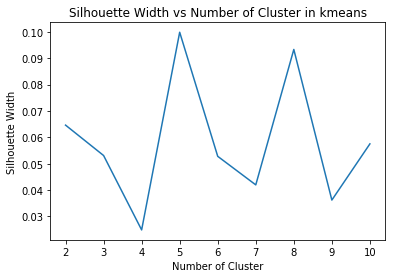

In [30]:
plt.plot(x, y)
plt.ylabel("Silhouette Width")
plt.xlabel("Number of Cluster")
plt.title("Silhouette Width vs Number of Cluster in kmeans")
plt.show()

Fro the plot above we can see that the Optimum number of clusters is which has the maximum of Silhoutted Width

In [31]:
print("Optimum Number of Cluster is ", maxn_clusters)

Optimum Number of Cluster is  5


In [76]:
M, C = kMedoids(D, maxn_clusters, tmax=100)

In [77]:
myList = [None] * len(D)
for label in C:
    for point_idx in C[label]:
        myList[point_idx]=label


In [35]:
import time

from sklearn.manifold import TSNE
# from ggplot import *
np.random.seed(42)

df_tsne=[]

tsne = TSNE(n_components=2, verbose=1, perplexity=20, n_iter=300)
tsne_results = tsne.fit_transform(D)

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 6658 samples in 4.540s...
[t-SNE] Computed neighbors for 6658 samples in 395.486s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6658
[t-SNE] Computed conditional probabilities for sample 2000 / 6658
[t-SNE] Computed conditional probabilities for sample 3000 / 6658
[t-SNE] Computed conditional probabilities for sample 4000 / 6658
[t-SNE] Computed conditional probabilities for sample 5000 / 6658
[t-SNE] Computed conditional probabilities for sample 6000 / 6658
[t-SNE] Computed conditional probabilities for sample 6658 / 6658
[t-SNE] Mean sigma: 1.223329
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.493179
[t-SNE] Error after 300 iterations: 2.349044


In [78]:
df_tsne = subMalware3b.copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]
df_tsne['label'] = myList

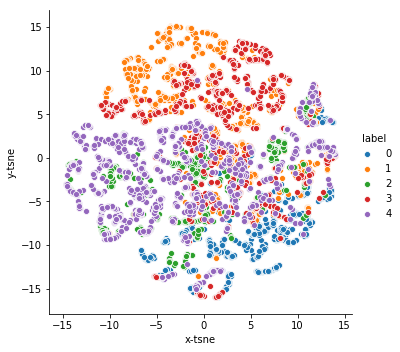

In [79]:
import seaborn as sns
np.random.seed(42)
sns.pairplot(x_vars=['x-tsne'], y_vars=['y-tsne'], data=df_tsne, hue="label", height=5)

Plot above is our attempt to visualize the clustering after converting it to TSNE. TSNE is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.<br>
As you can see from the visualization, the distinction of each cluster is not very visible. This shows that the large categorical data can't be clustered easily. Low silhoutte score also indicates this issue.

In [89]:
clust={}
for i in range(maxn_clusters):
    clust[i] = pd.DataFrame(df_tsne.loc[df_tsne['label'] == i])
    print("Cluster", i, " {} " . format (clust[i].shape))    

Cluster 0  (982, 51) 
Cluster 1  (1742, 51) 
Cluster 2  (936, 51) 
Cluster 3  (1301, 51) 
Cluster 4  (1697, 51) 


## Below Method is to add the cluster as a new feature

In [114]:
clust_all = pd.concat([
    clust[0], 
    clust[1], 
    clust[2],
    clust[3],
    clust[4]],
    ignore_index=True, sort=False
)
pd.options.display.max_rows = 999

model_data_cluster = pd.concat(    
    (    
        clust_all[cols_booleans],
        clust_all[cols_numerical],
        get_one_hot_encodings(clust_all, cols_categorical),
        clust_all['label']       
    ), axis = 1)

model_data_cluster = reduce_features(model_data_cluster, verbose=True)

There are  99  field correlations > 95%.


Field1  \
0               AvSigVersion_x_x_1.2229999999999999   
1                            AvSigVersion_x_x_1.225   
2                            AvSigVersion_x_x_1.227   
3                            AvSigVersion_x_x_1.229   
4               AvSigVersion_x_x_1.2309999999999999   
5               AvSigVersion_x_x_1.2329999999999999   
6                            AvSigVersion_x_x_1.235   
7                            AvSigVersion_x_x_1.237   
8                            AvSigVersion_x_x_1.239   
9               AvSigVersion_x_x_1.2409999999999999   
10              AvSigVersion_x_x_1.2429999999999999   
11                           AvSigVersion_x_x_1.245   
12                           AvSigVersion_x_x_1.247   
13                           AvSigVersion_x_x_1.249   
14                           AvSigVersion_x_x_1.251   
15                           AvSigVersion_x_x_1.255   
16              AvSigVersion_x_x_1.2570000000000001   
17              AvSigVersion_x_x_1.2590000000000001   
18                           AvSigVersion_x_x_1.263   
19                           AvSigVersion_x_x_1.265   
20              AvSigVersion_x_x_1.2670000000000001   
21              AvSigVersion_x_x_1.2690000000000001   
22                           AvSigVersion_x_x_1.271   
23                           AvSigVersion_x_x_1.273   
24                           AvSigVersion_x_x_1.275   
25                    OsPlatformSubRelease_windows7   
26                  OsPlatformSubRelease_windows8.1   
27                         OsPlatformSubRelease_th1   
28                       Census_OSBuildNumber_10240   
29                         OsPlatformSubRelease_th2   
30                         OsPlatformSubRelease_rs1   
31                         OsPlatformSubRelease_rs2   
32                      Census_OSBranch_rs2_release   
33                       Census_OSBuildNumber_15063   
34                         OsPlatformSubRelease_rs3   
35                       Census_OSBuildNumber_16299   
36                         OsPlatformSubRelease_rs4   
37                      Census_OSBranch_rs4_release   
38                       Census_OSBuildNumber_17134   
39                    Census_OSBranch_rs_prerelease   
40                       Census_OSBuildNumber_17634   
41                Census_OSBranch_rs_prerelease_flt   
42                       Census_OSBuildNumber_17692   
43                       Census_OSBuildNumber_17744   
44                       Census_OSBuildNumber_17754   
45                                      OsSuite_768   
46                                  SkuEdition_Home   
47                                   SkuEdition_Pro   
48                    Census_OSSkuName_PROFESSIONAL   
49                  Census_OSEdition_ServerStandard   
50                 Census_OSSkuName_STANDARD_SERVER   
51  Census_OSWUAutoUpdateOptionsName_DownloadNotify   
52                                  SkuEdition_Home   
53                                   SkuEdition_Pro   
54                    Census_OSSkuName_PROFESSIONAL   
55                      Census_OSBranch_rs2_release   
56                       Census_OSBuildNumber_15063   
57                       Census_OSBuildNumber_16299   
58                      Census_OSBranch_rs4_release   
59                       Census_OSBuildNumber_17134   
60                       Census_OSBuildNumber_10240   
61                           Census_OSEdition_Cloud   
62                           Census_OSSkuName_CLOUD   
63                       Census_OSEdition_Education   
64                       Census_OSSkuName_EDUCATION   
65                      Census_OSEdition_Enterprise   
66                      Census_OSSkuName_ENTERPRISE   
67                     Census_OSEdition_EnterpriseS   
68                    Census_OSSkuName_ENTERPRISE_S   
69                                   SkuEdition_Pro   
70                    Census_OSEdition_Professional   
71                    Census_OSSkuName_PROFESSIONAL   
72       Census_ProcessorManuf

Dropping the following  76  highly correlated fields.

*********Before: Dropping Highly Correlated Fields*************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6658 entries, 0 to 6657
Columns: 305 entries, Census_IsSecureBootEnabled to label
dtypes: float64(9), int64(2), uint8(294)
memory usage: 2.4 MB


None


*********After: Dropping Highly Correlated Fields**************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6658 entries, 0 to 6657
Columns: 229 entries, Census_IsSecureBootEnabled to label
dtypes: float64(9), int64(2), uint8(218)
memory usage: 1.9 MB


In [115]:
model_data_cluster['label'].unique()

array([0, 1, 2, 3, 4])

In [116]:
# Utility function to report best scores
def report(grid_clf,     n_top=3, clf_name = "", verbose=True):

    if(verbose):
        for i in range(1, n_top + 1):
            candidates = np.flatnonzero(grid_clf.cv_results_['rank_test_auc'] == i)
            for candidate in candidates:
                print("Model with rank: {0}".format(i))
                print("Mean validation score (AUC on Train): {0:.3f} (std: {1:.3f})".format(
                      grid_clf.cv_results_['mean_test_auc'][candidate],
                      grid_clf.cv_results_['std_test_auc'][candidate]))
                print("Parameters: {0}".format(grid_clf.cv_results_['params'][candidate]))
                print("")
    return {
        "Classifier":clf_name,
        "Parameters":str(grid_clf.best_params_),
        "Accuracy_Mean":grid_clf.cv_results_["mean_test_acc"][grid_clf.best_index_],
        "Accuracy_Std":grid_clf.cv_results_["std_test_acc"][grid_clf.best_index_],
        "AUC_Mean":grid_clf.cv_results_["mean_test_auc"][grid_clf.best_index_],
        "AUC_Std":grid_clf.cv_results_["std_test_auc"][grid_clf.best_index_],
        "MSE_Mean":grid_clf.cv_results_["mean_test_mse"][grid_clf.best_index_],
        "MSE_Std":grid_clf.cv_results_["std_test_mse"][grid_clf.best_index_],
        "Precision_Mean":grid_clf.cv_results_["mean_test_precision"][grid_clf.best_index_],
        "Precision_Std":grid_clf.cv_results_["std_test_precision"][grid_clf.best_index_],
        "Recall_Mean":grid_clf.cv_results_["mean_test_recall"][grid_clf.best_index_],
        "Recall_Std":grid_clf.cv_results_["std_test_recall"][grid_clf.best_index_],
        "R2_Mean":grid_clf.cv_results_["mean_test_r2"][grid_clf.best_index_],    
        "R2_Std":grid_clf.cv_results_["std_test_r2"][grid_clf.best_index_],
    }

In [117]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

grid_clf={}
X = model_data_cluster.values
y = clust_all['HasDetections'].values

# Creat eth Cross Validation Objected used for all tests
num_cv_iterations = 10
random_st = 42
kfold_cv = KFold(
    n_splits=num_cv_iterations,
    random_state = random_st
)

clf = RandomForestClassifier(random_state=42)

grid_params = [{
    "max_features" : ["auto","log2",0.20, 0.30],
    "n_estimators" : [10,50,100],
    "min_samples_leaf" : [25, 50, 100]
}]

scoring = {
    'acc':'accuracy',
    'precision':'precision',
    'recall':'recall',
    'auc':'roc_auc',
    'mse':'neg_mean_squared_error',
    'r2':'r2'
}

grid_clf = GridSearchCV(
    estimator = clf, 
    param_grid=grid_params, 
    cv=kfold_cv, 
    scoring=scoring,
    refit='auc',
    n_jobs=-2,verbose=1,return_train_score=False)
grid_clf.fit(X, y)



Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:   40.6s
[Parallel(n_jobs=-2)]: Done 360 out of 360 | elapsed:  2.0min finished


CPU times: user 10.6 s, sys: 197 ms, total: 10.8 s
Wall time: 2min 3s


In [118]:
print("GridSearchCV for "+ str( len(grid_clf.cv_results_['params']) ) +" candidate parameter settings.")
report(grid_clf, clf_name="Random Forest")

GridSearchCV for 36 candidate parameter settings.
Model with rank: 1
Mean validation score (AUC on Train): 0.647 (std: 0.027)
Parameters: {'max_features': 0.2, 'min_samples_leaf': 25, 'n_estimators': 50}

Model with rank: 2
Mean validation score (AUC on Train): 0.647 (std: 0.025)
Parameters: {'max_features': 0.3, 'min_samples_leaf': 25, 'n_estimators': 100}

Model with rank: 3
Mean validation score (AUC on Train): 0.647 (std: 0.021)
Parameters: {'max_features': 'auto', 'min_samples_leaf': 25, 'n_estimators': 100}



{'Classifier': 'Random Forest',
 'Parameters': "{'max_features': 0.2, 'min_samples_leaf': 25, 'n_estimators': 50}",
 'Accuracy_Mean': 0.6108440973265244,
 'Accuracy_Std': 0.019027068482478506,
 'AUC_Mean': 0.6474280482171415,
 'AUC_Std': 0.026992628403715597,
 'MSE_Mean': -0.3891559026734755,
 'MSE_Std': 0.019027068482478513,
 'Precision_Mean': 0.6177786935637161,
 'Precision_Std': 0.03178380435558466,
 'Recall_Mean': 0.7225818715552808,
 'Recall_Std': 0.061104378483523125,
 'R2_Mean': -0.5673647360880716,
 'R2_Std': 0.07525510846546066}

### New AUC Mean with new model (clustered large category) is 0.6474<a id="RF_New_Score"></a>
[Compare to AUC Mean Base Random Forest](#RF_Base_Score")
<br>
<br>
There is very small improvement of only 0.005 with the new model. We think this result is not surprising given the visualization of the clusters show not very obvious.